# Titanic
School project in which our goal is to train models that are capable or reliably predicting the death or survival of passengers.

### Project Tasks

1. Load the data set.
2. Make a complete explanatory analysis (graphics, statistics, etc.) for each variable.
3. Separate the data set in train set and test set.
4. Preprocess the data. Use the function « ColumnTransformer » to do that. Explain precisely each step, in particular when you drop, impute or transform the variables.
5. Use the k-NN classifier to perform the classification. Find the best hyperparameters with a brute force technique. Compute classical metrics: recall, precision, F1 score, confusion matrix.
6. Same question with the Support Vector Machine classifier.
7. Same question with the Linear Discriminant Analysis classifier.
8. Same question with the Logistic Regression classifier.
9. Same question with the Decision Tree classifier. Draw the resulting tree.
10. Same question with a Voting Classifier using the previous algorithms. Explain precisely how it works.
11. Same question with the Random Forest classifier.
12. Same question with the Gradient Boosting classifier.
13. Same question with the AdaBoost classifier.
14. Compare the performances of the previous algorithms.

## Table of Contents
* [Data Exploration](#dataExploration)
* [Data Cleaning](#dataCleaning)
* [Feature Engineering](#featureEngineering)
* [Preprocessing](#preprocessing)
* [Feature Selection](#featureSelection)
* [Hyperparameter Optimization](#hyperparameterOptimization)
* [Model Selection](#modelSelection)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Matplotlib configuration
mpl.rcParams['figure.figsize'] = 15, 15
mpl.rcParams['figure.dpi'] = 300    # tells matplotlib to display inline plots at 300 DPI
mpl.rc("savefig", dpi = 300)        # tells matplotlib to save plots at 300 DPI

# Makes Jupyter show the output of all lines, not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv("titanic.csv")

<a id="dataExploration"><a/>

## Data Exploration

### Dataset Informations from Kaggle

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Variables Exploration
We will proceed to explore each variable. For each one, we will look at its distribution, distribution for dead passengers vs survivors, and potential missing values.

The 'boat', 'body' and 'ticket' variables are not useful to us as they do not help us in identifying survivors.

We will therefore drop them.

In [7]:
def plot_distribution_by_target(feature, bins=np.linspace(0, 85, 15), target="survived", labels=["died", "survived"], stack=False):
    # plots the distribution of the feature for both values of the boolean target
    # stack: wether to stack distribution or blend them, put True for int features
    if stack:
        plt.hist(
        x=[df[df[target] == 0][feature], 
        df[df[target] == 1][feature]], 
        stacked=True, 
        color=['r','g'],
        label=labels
    )
    else:
        plt.hist(df[df[target] == 0][feature], alpha=.6, label=labels[0], color="r")
        plt.hist(df[df[target] == 1][feature], alpha=.6, label=labels[1], color="g")
    title = "{} by {}".format(feature, target)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.xlabel(feature)
    plt.ylabel("Number of passengers")
    plt.show()

#### * survived: (boolean 0 = No; 1 = Yes)

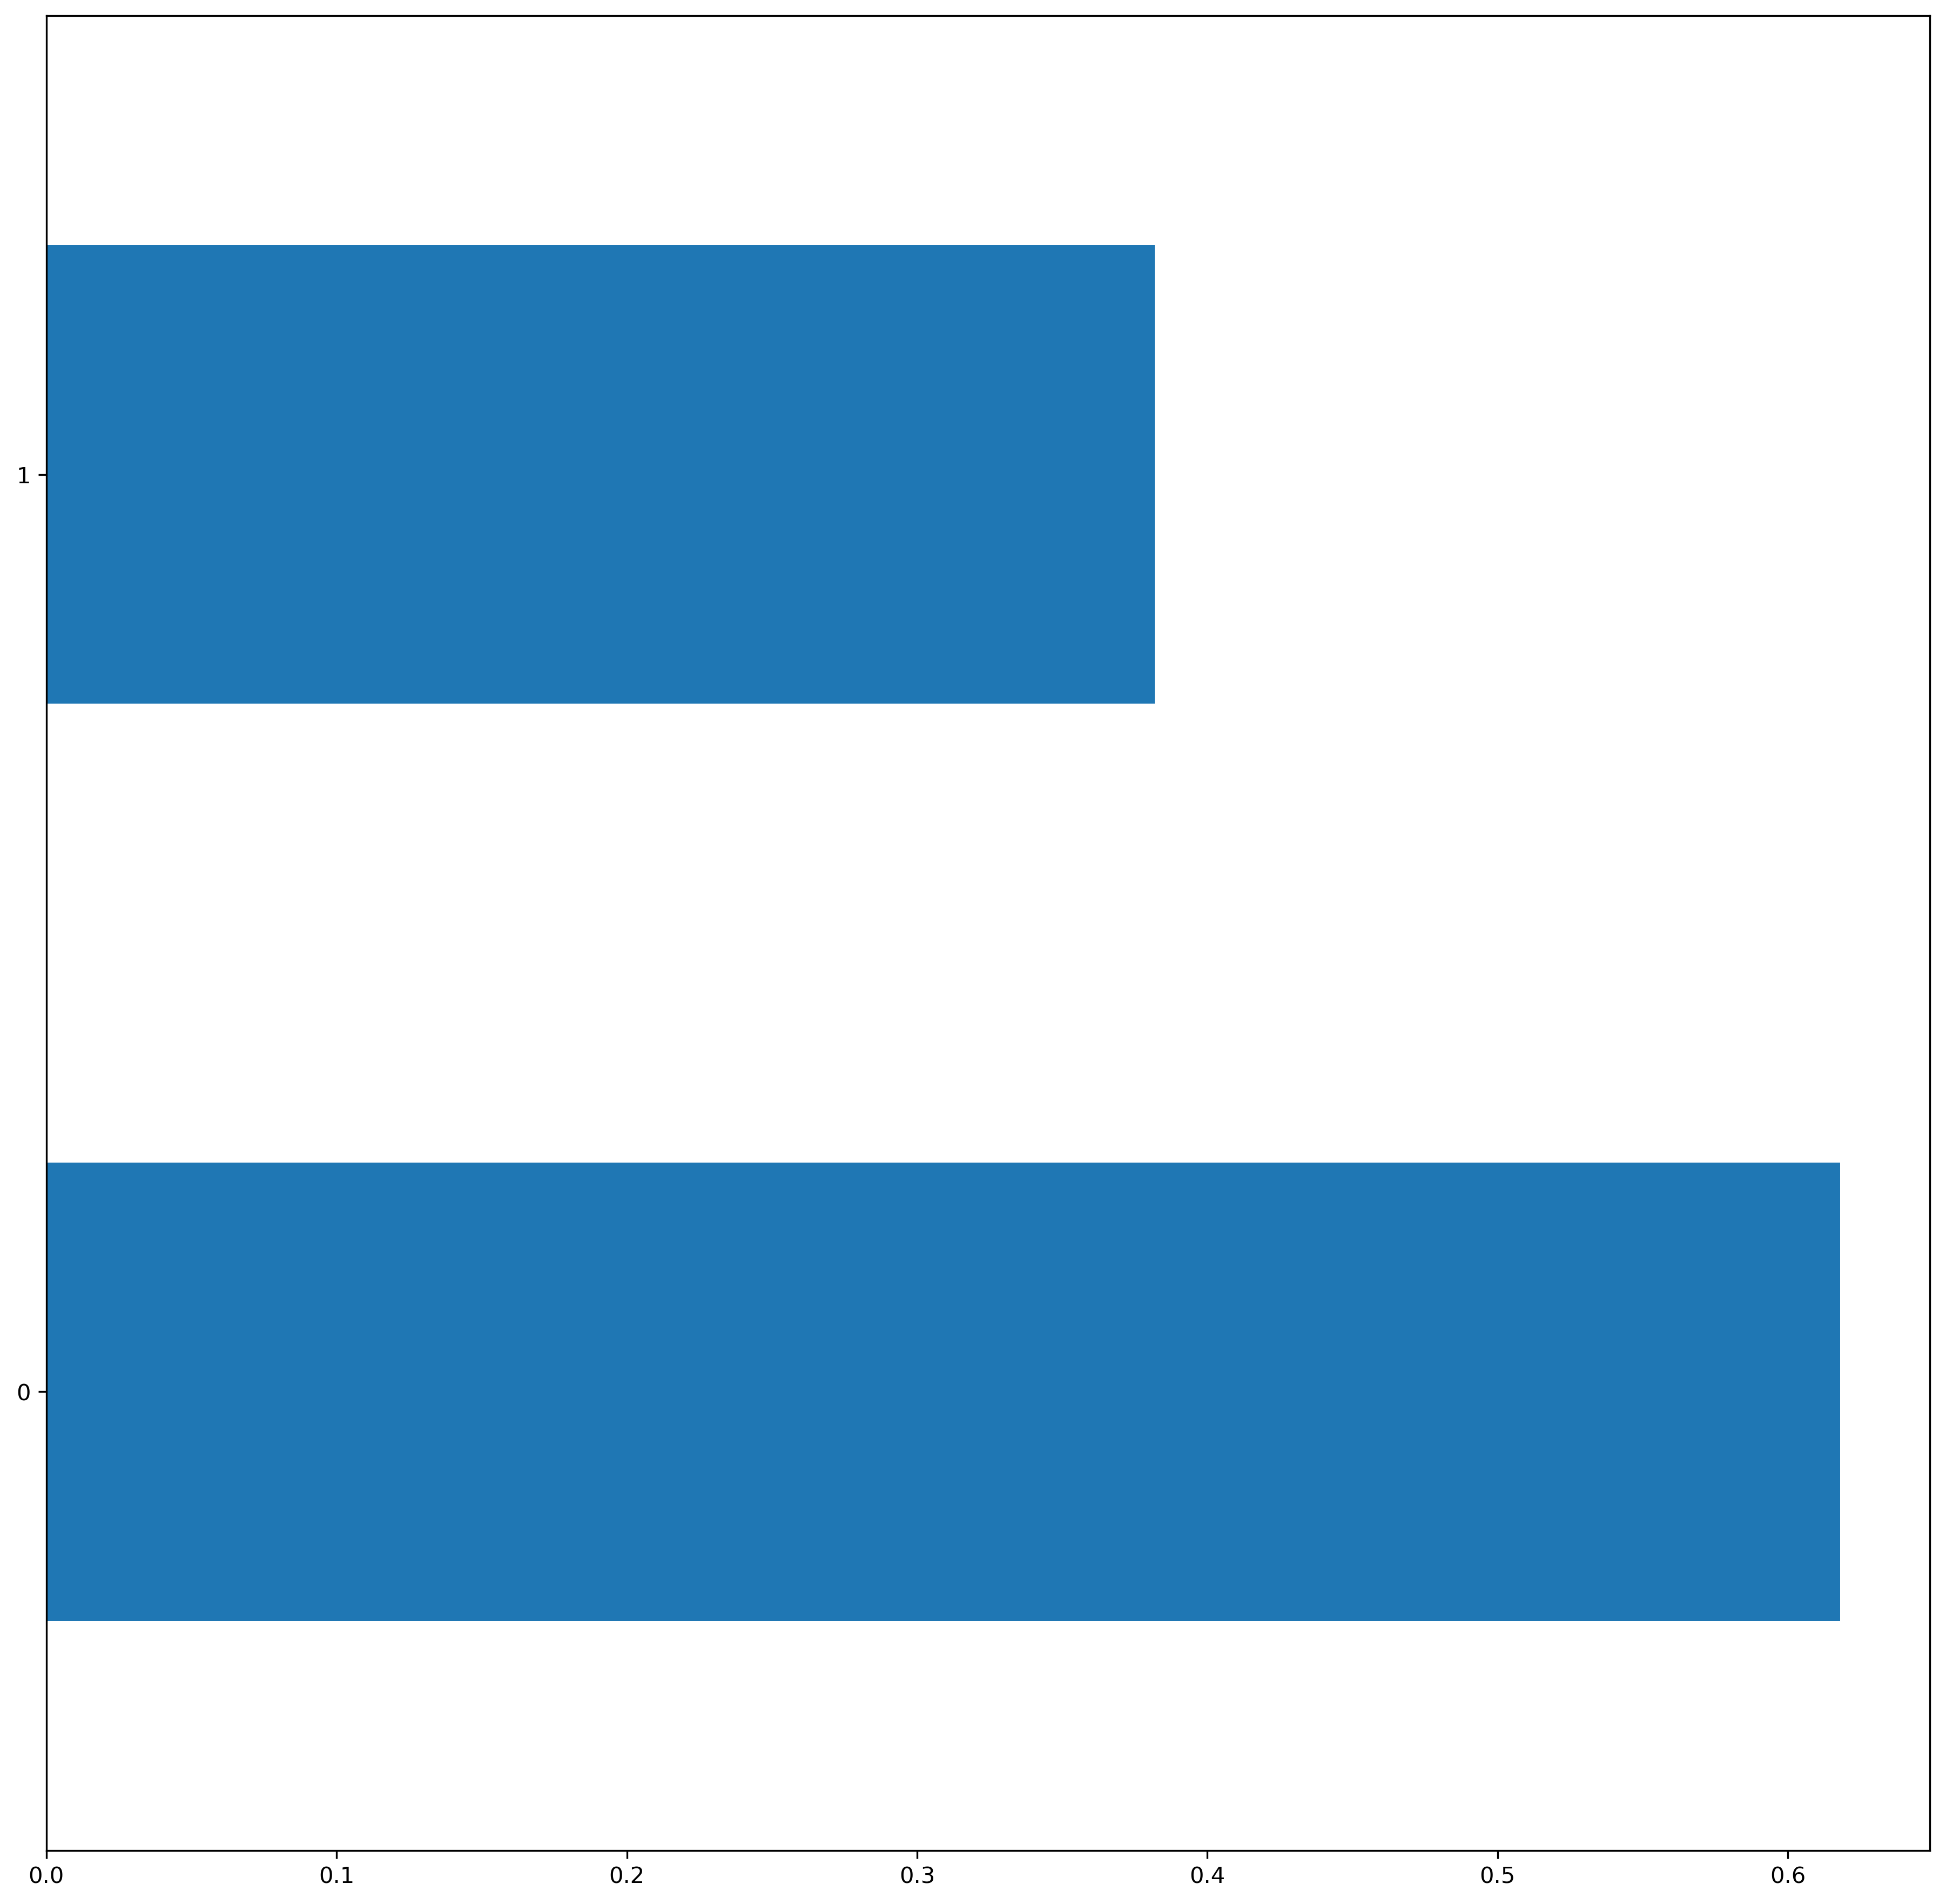

In [8]:
df.survived.value_counts(normalize=True).plot.barh();

Around 62% of passengers died.
Ideally, to have a balanced model, we would like to have a 50%/50% split, but this not too imbalanced either.

In [9]:
df.survived.isnull().sum()

0

There are no missing values

#### * pclass: Passenger class (ordinal 1 = 1st; 2 = 2nd; 3 = 3rd)

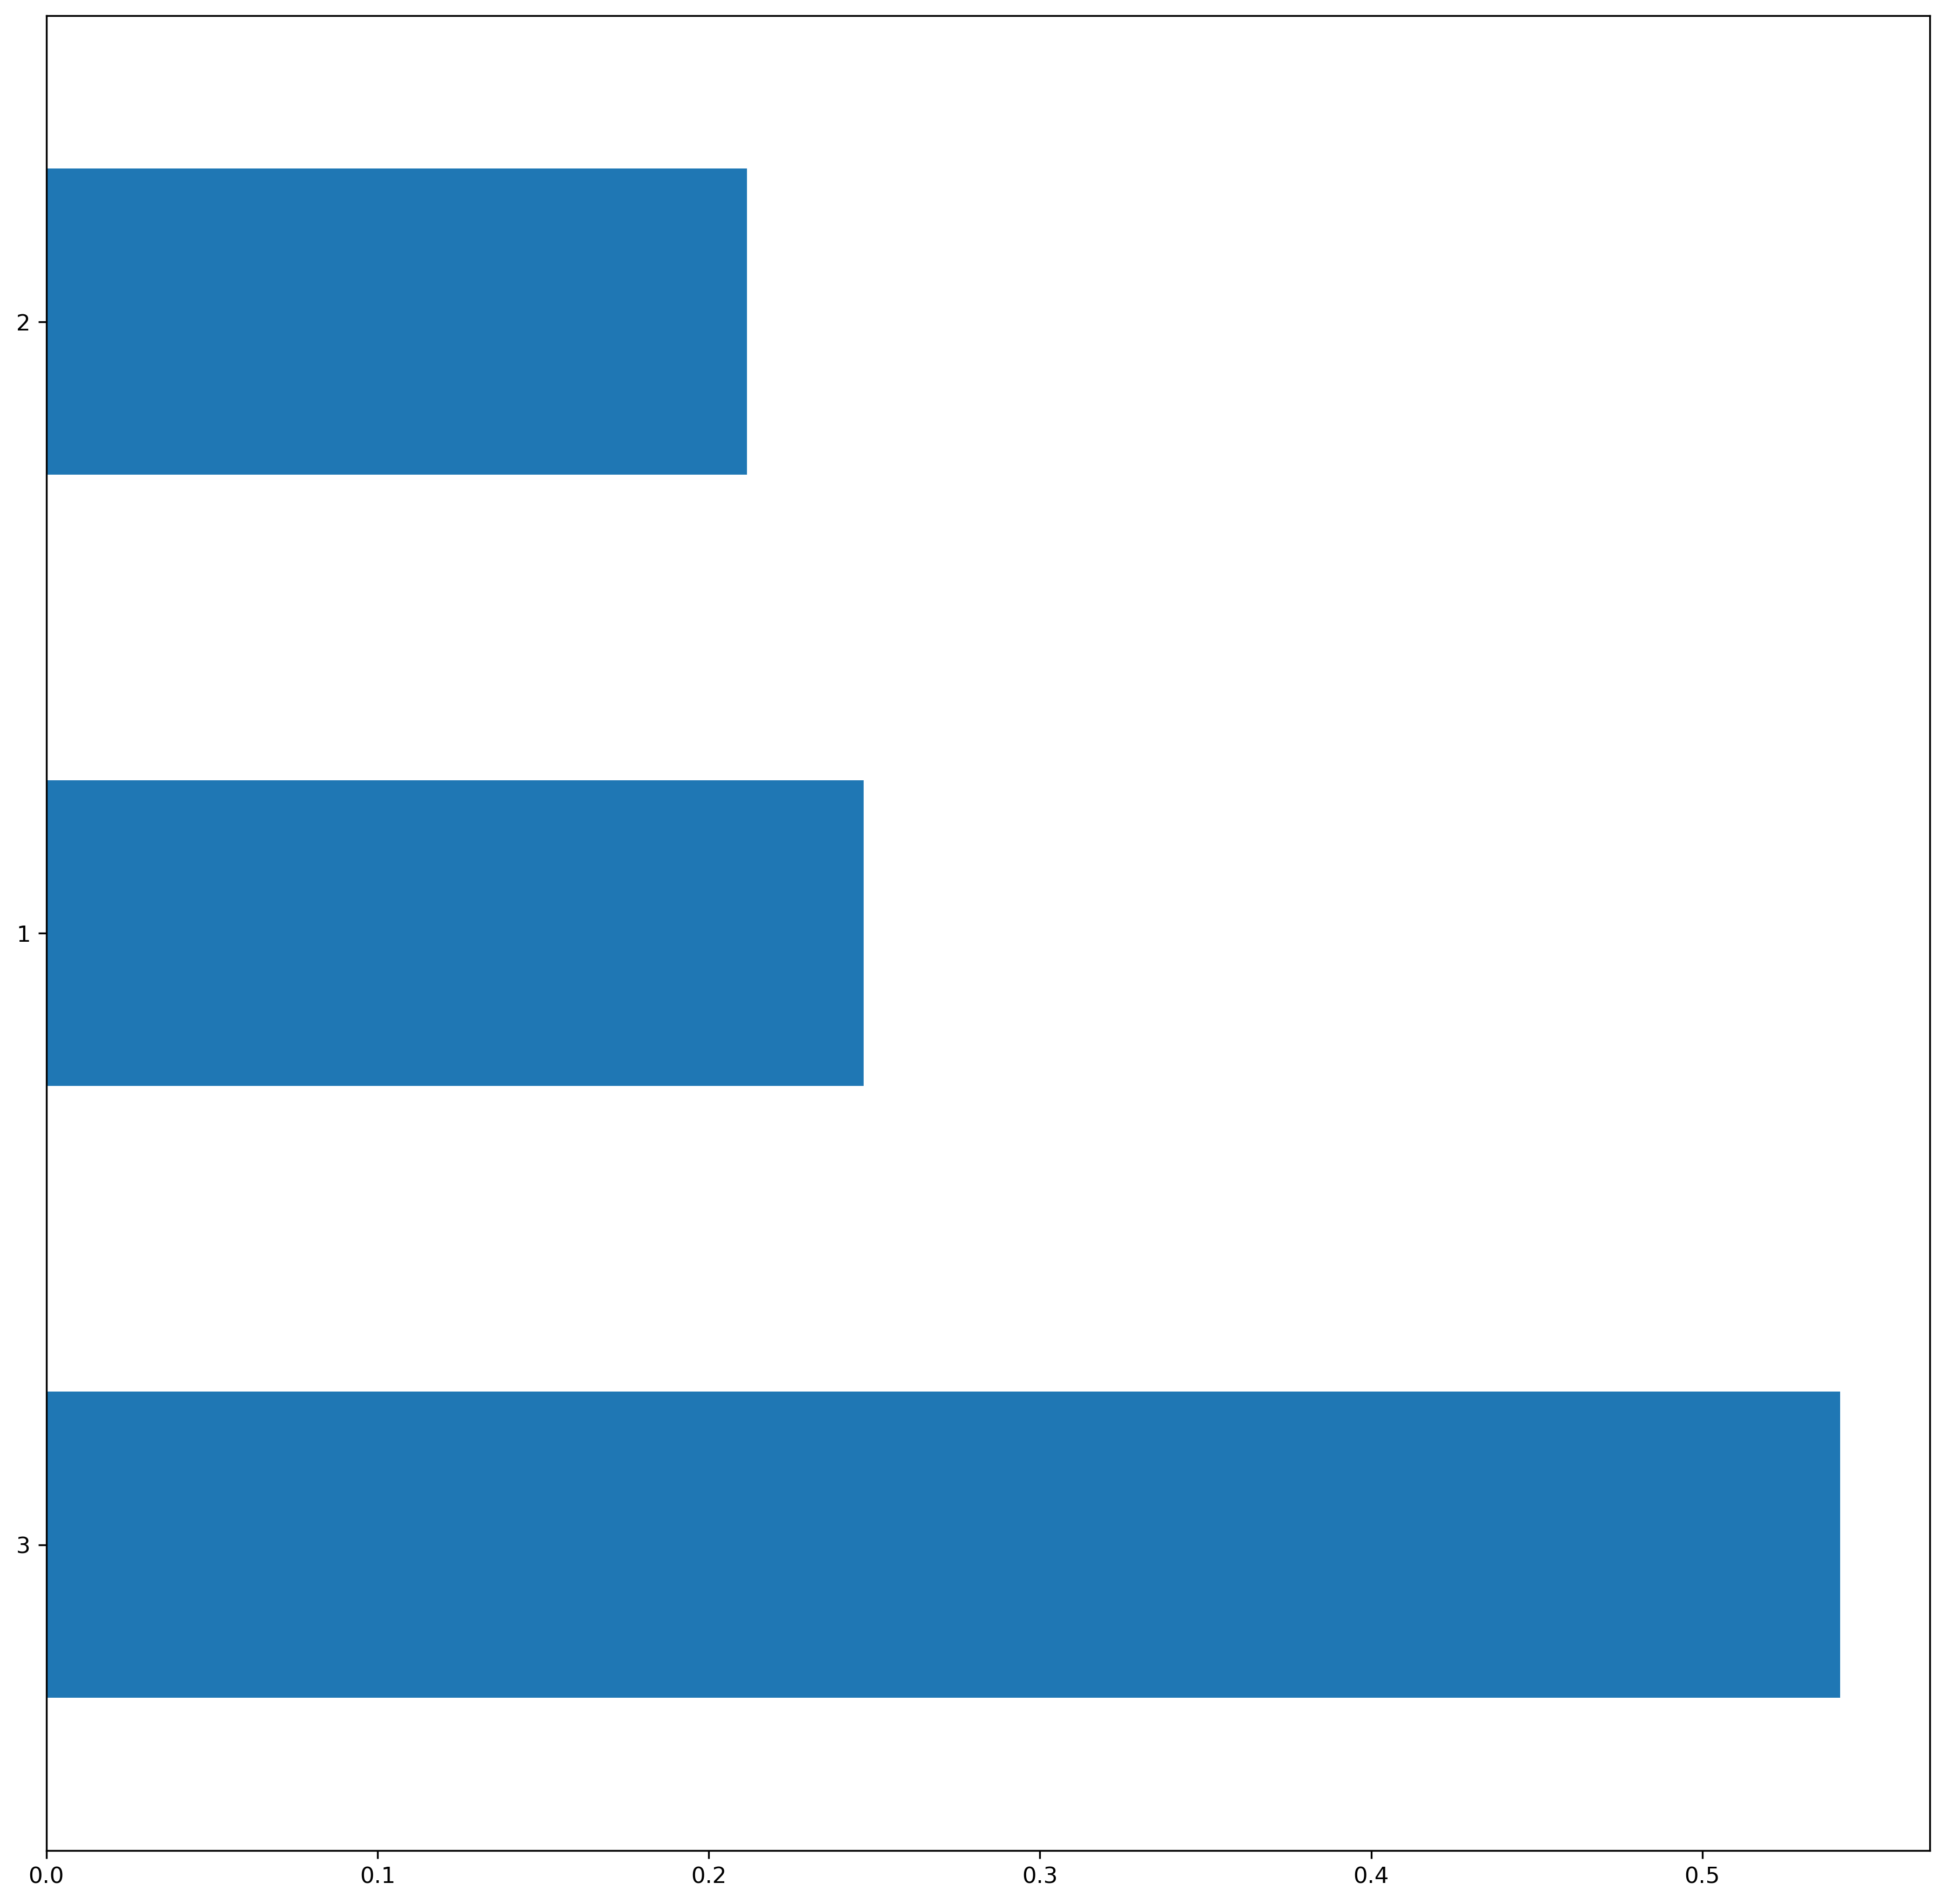

In [10]:
df.pclass.value_counts(normalize=True).plot.barh();

In [11]:
df.pclass.value_counts(normalize=True)

3    0.541635
1    0.246753
2    0.211612
Name: pclass, dtype: float64

The 3rd class clearly dominates with a presence of more that 54%.
Classes 1 and 2 are roughly evenly spread among the remaining passengers.

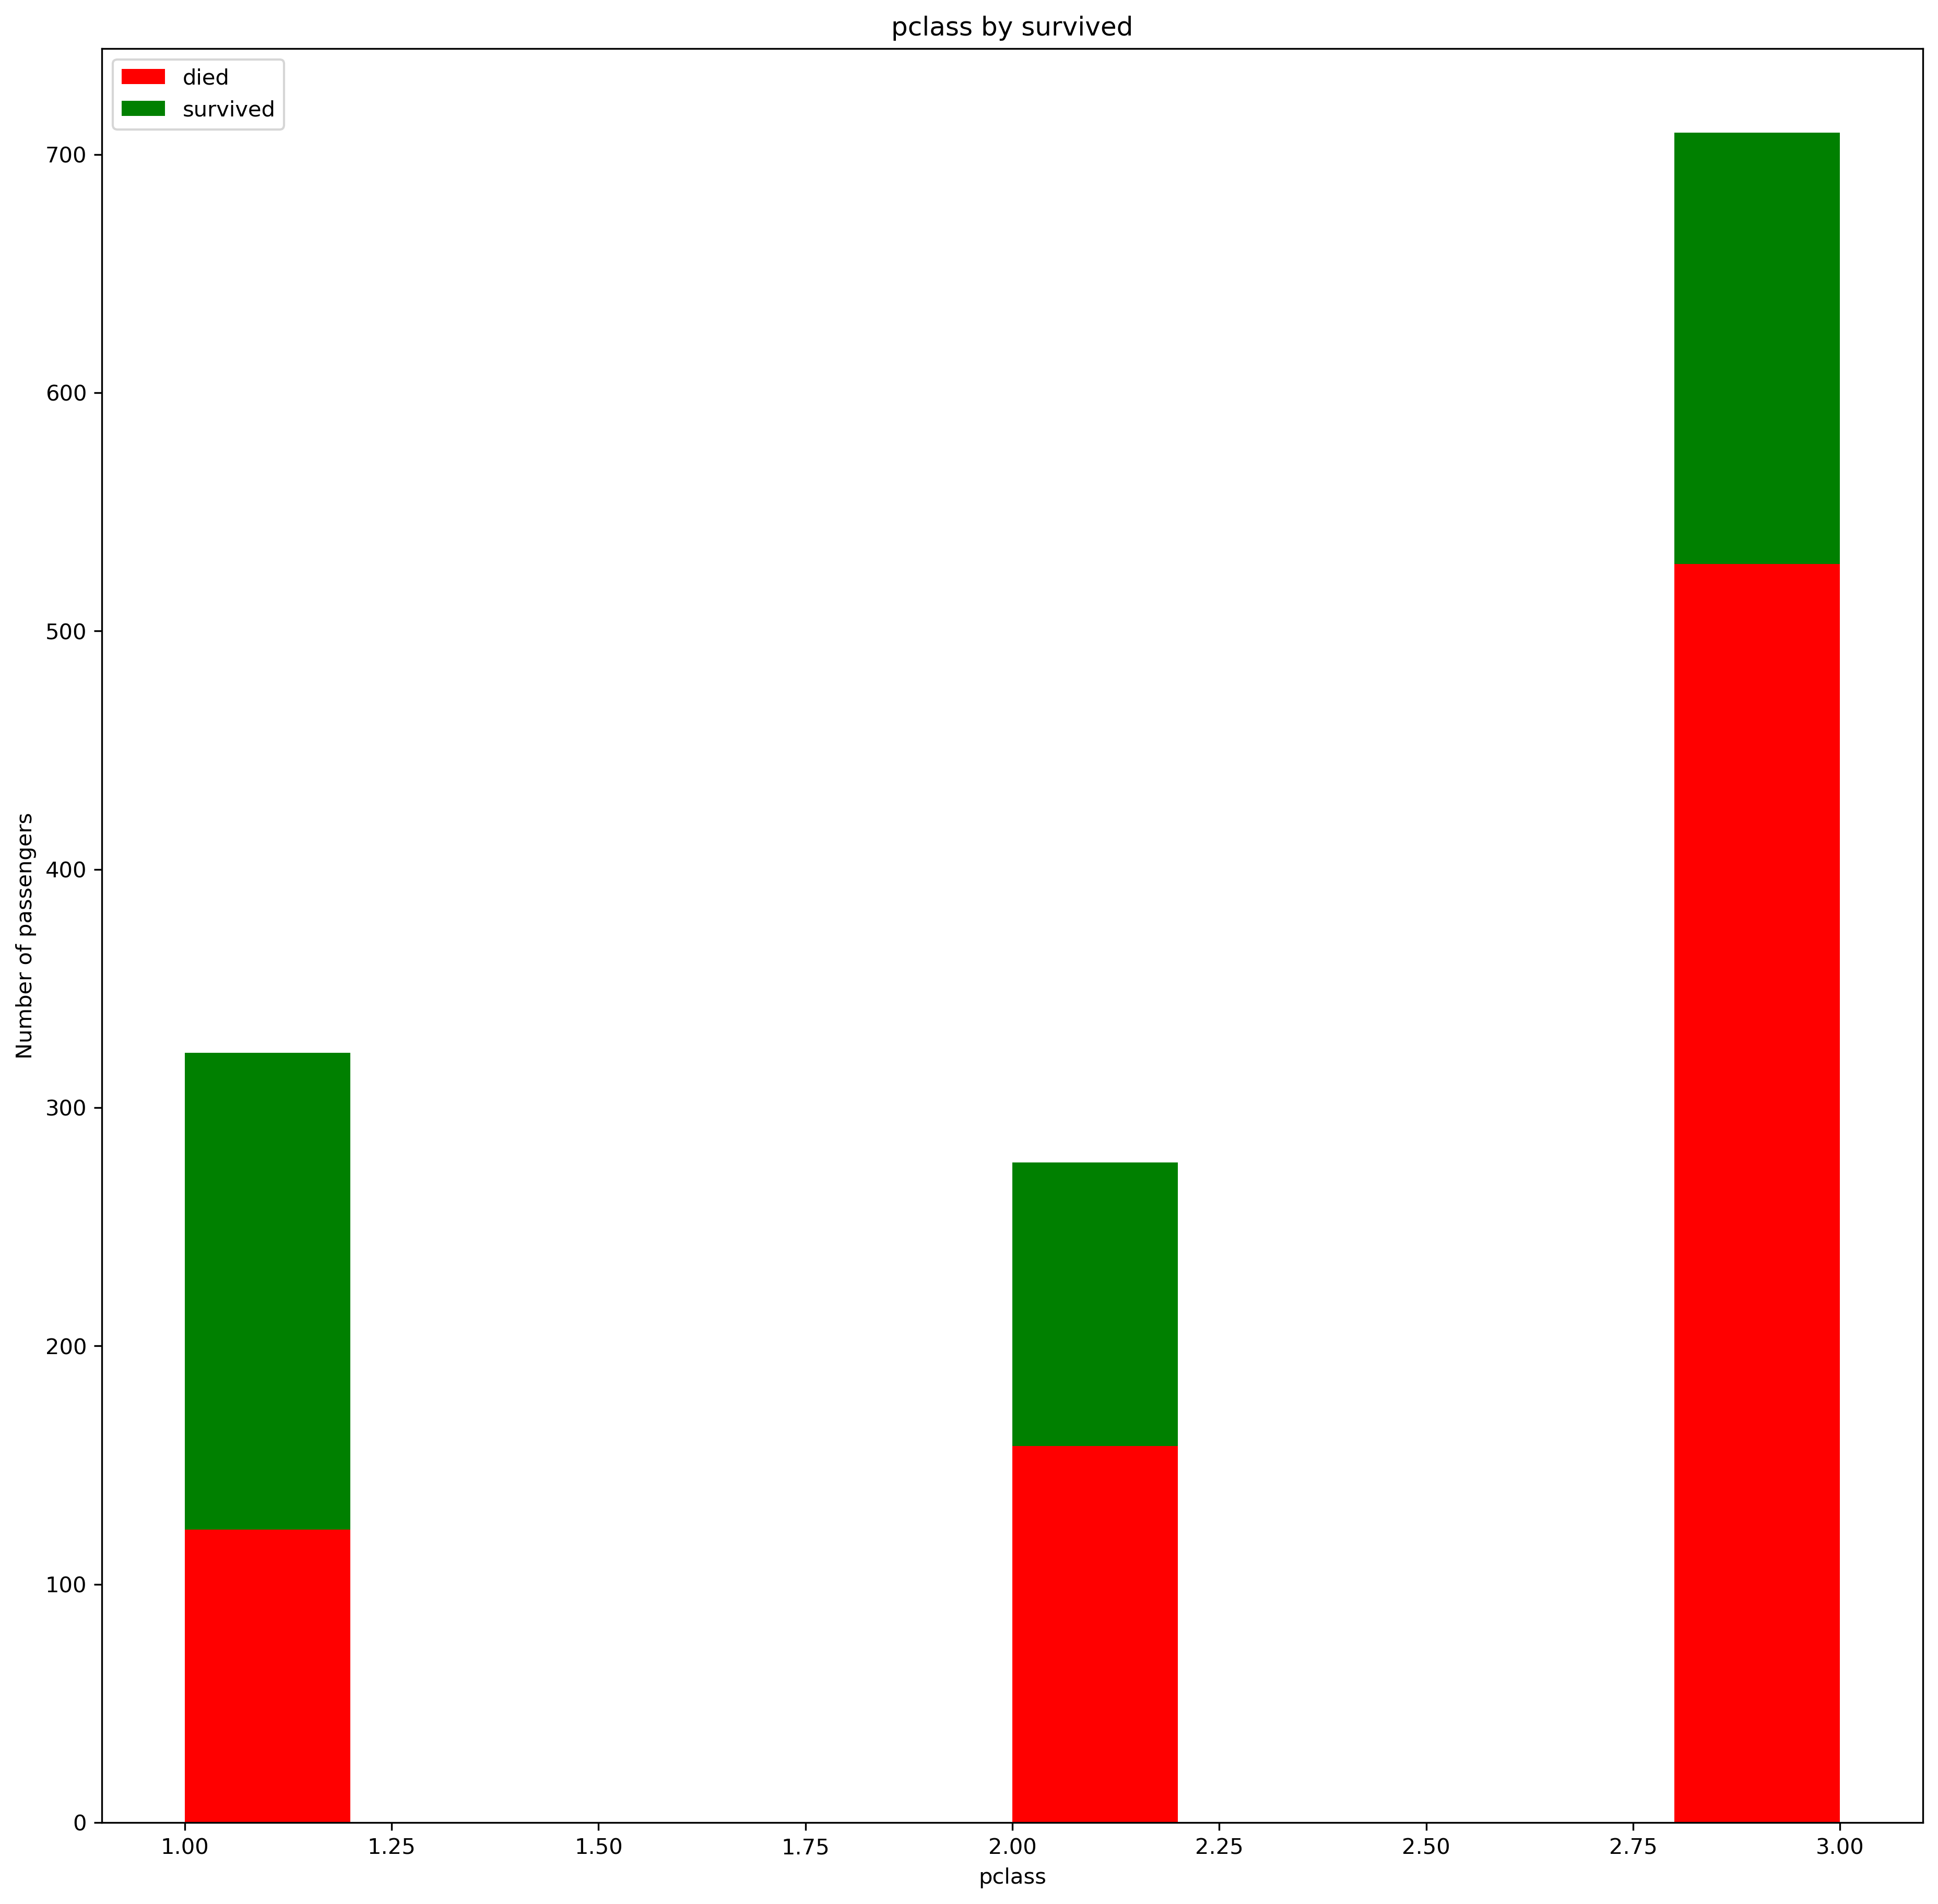

In [12]:
plot_distribution_by_target(feature="pclass", stack=True)

In [13]:
df.groupby("pclass").mean()["survived"]

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

The better the class, the better the probability of survival.

There is a 36% survival rate difference between the best and the worst class!

In [14]:
df.pclass.isnull().sum()

0

There are no missing values.

#### * name

In [15]:
df.name.isnull().sum()

0

There are no missing values.

This feature could be used to create new features.
We could imagine extracting titles from the name to capture new information about a passenger.

In [16]:
list(df.name.head())

['Allen, Miss. Elisabeth Walton',
 'Allison, Master. Hudson Trevor',
 'Allison, Miss. Helen Loraine',
 'Allison, Mr. Hudson Joshua Creighton',
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)']

#### *sex 

In [17]:
df.sex.describe()

count     1309
unique       2
top       male
freq       843
Name: sex, dtype: object

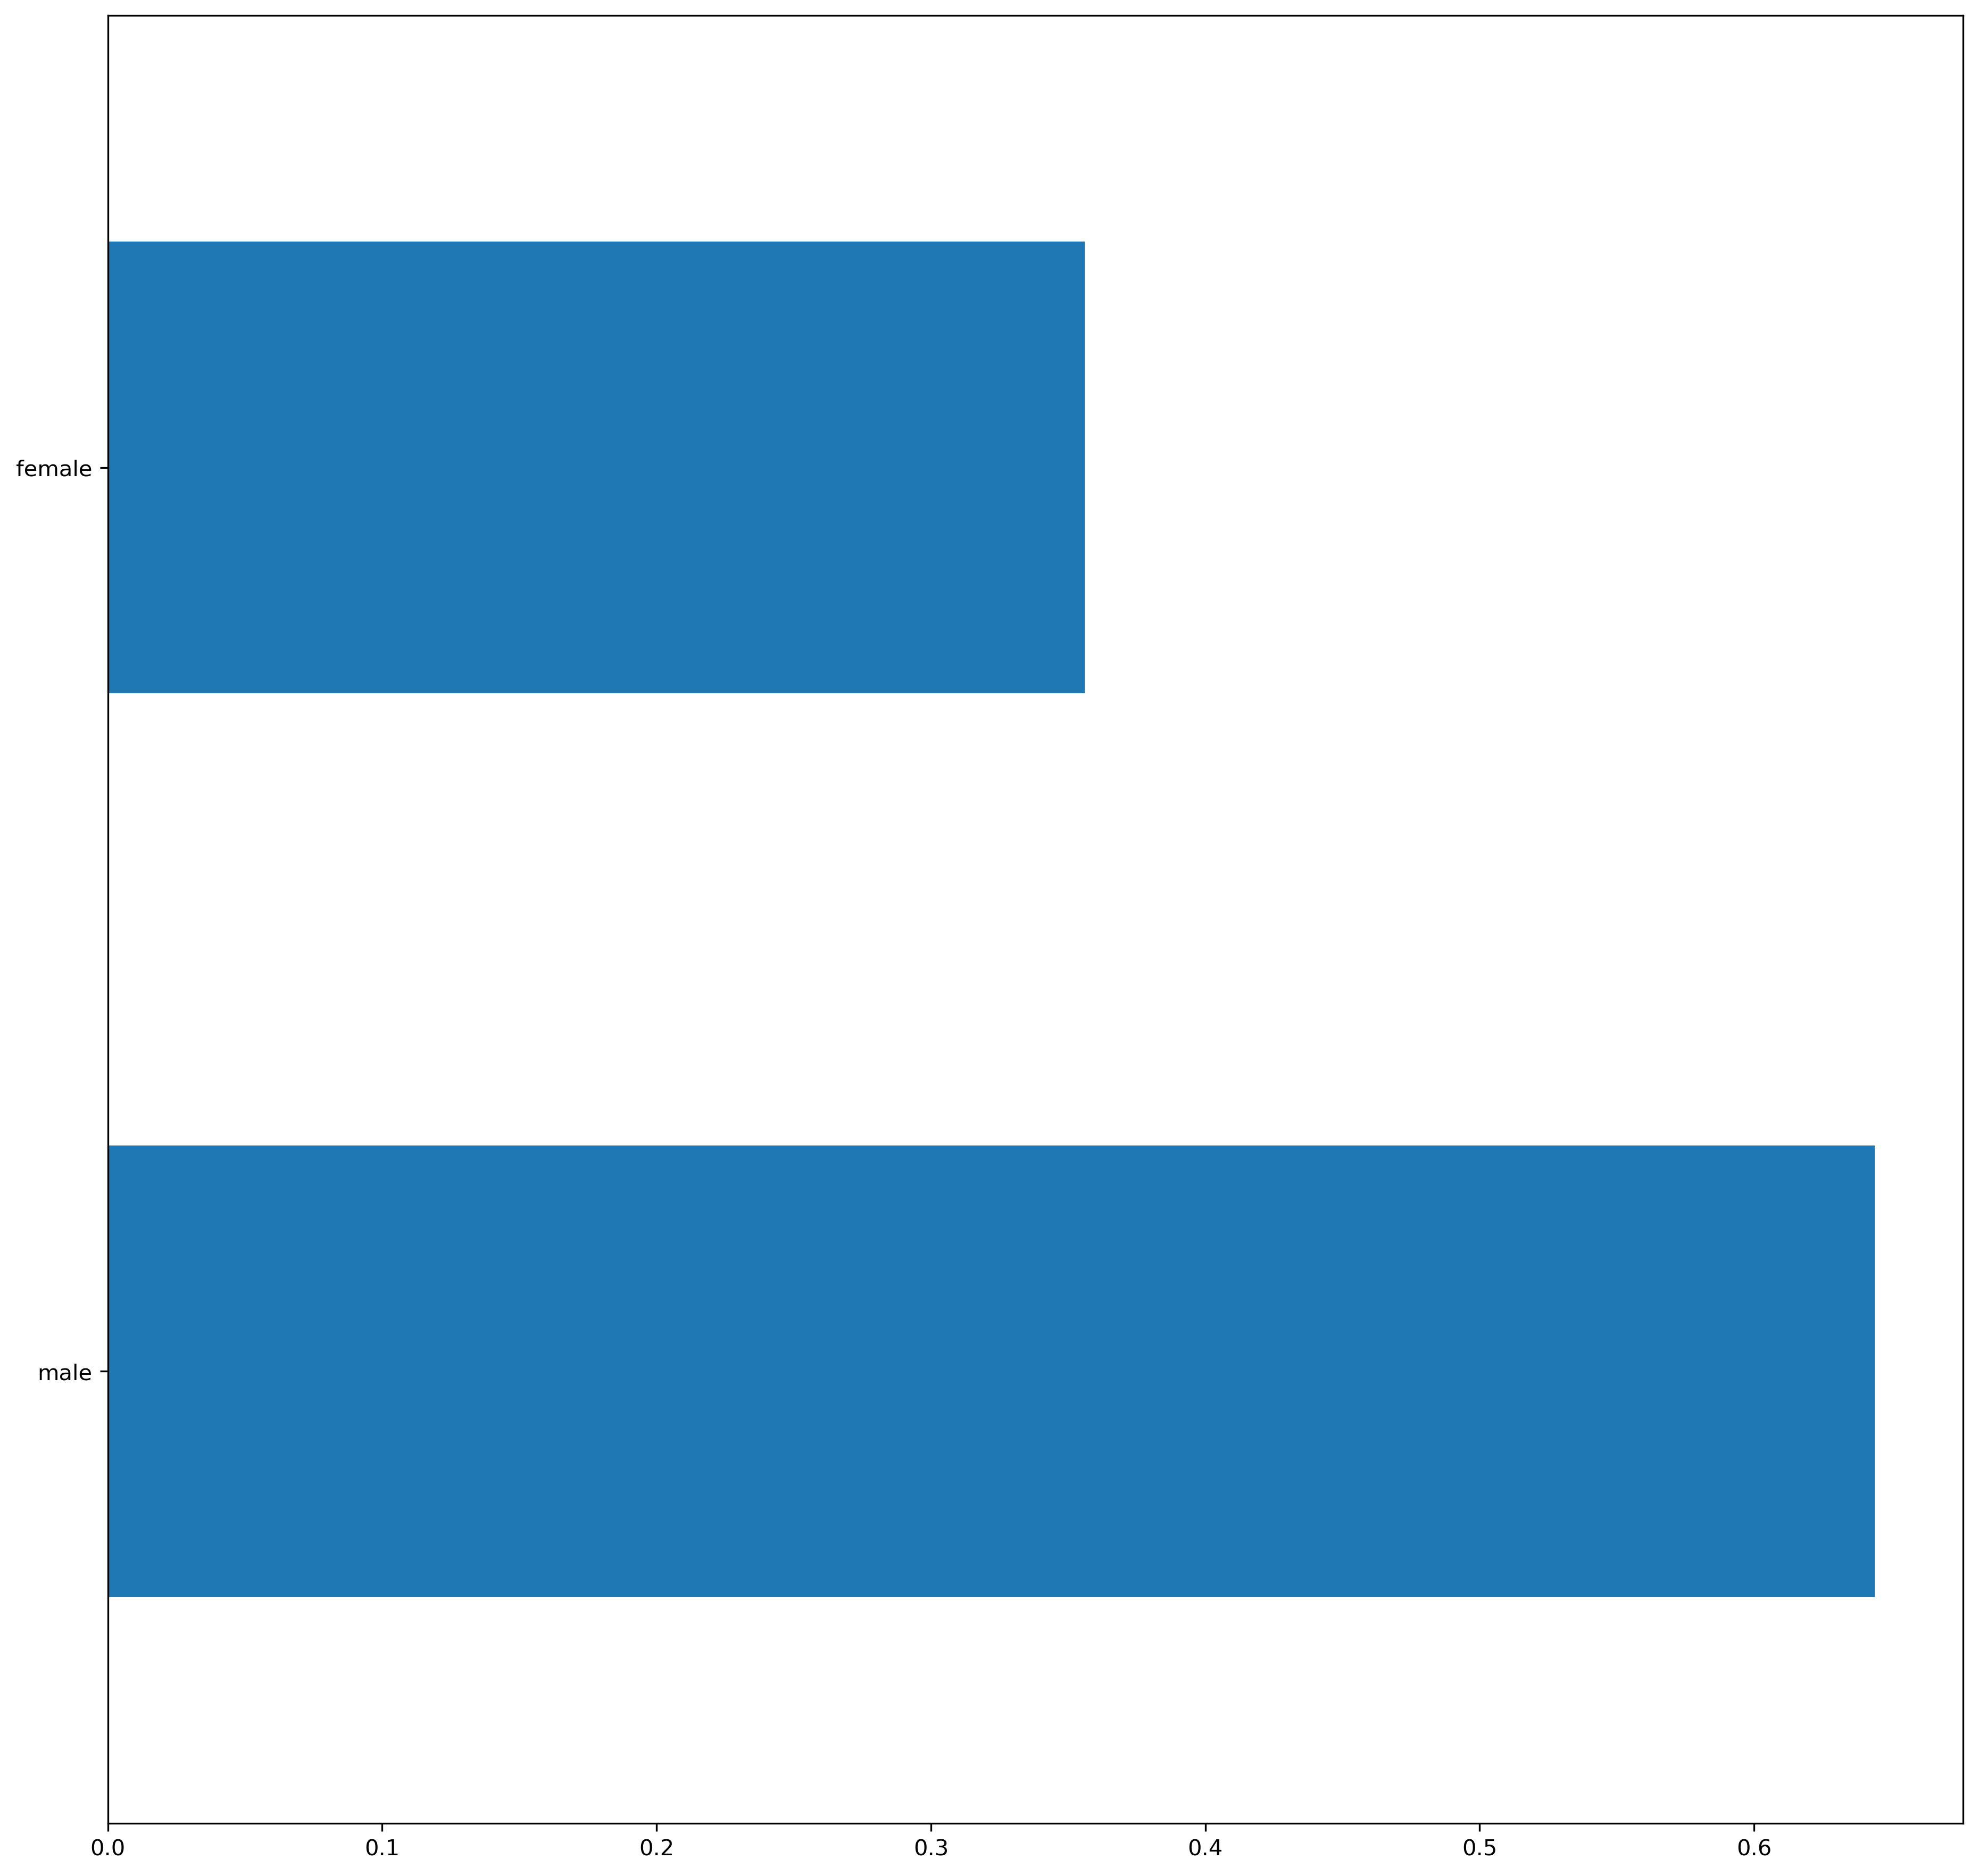

In [18]:
df.sex.value_counts(normalize=True).plot.barh();

We note a clear dominance of males over females with around 65% males.

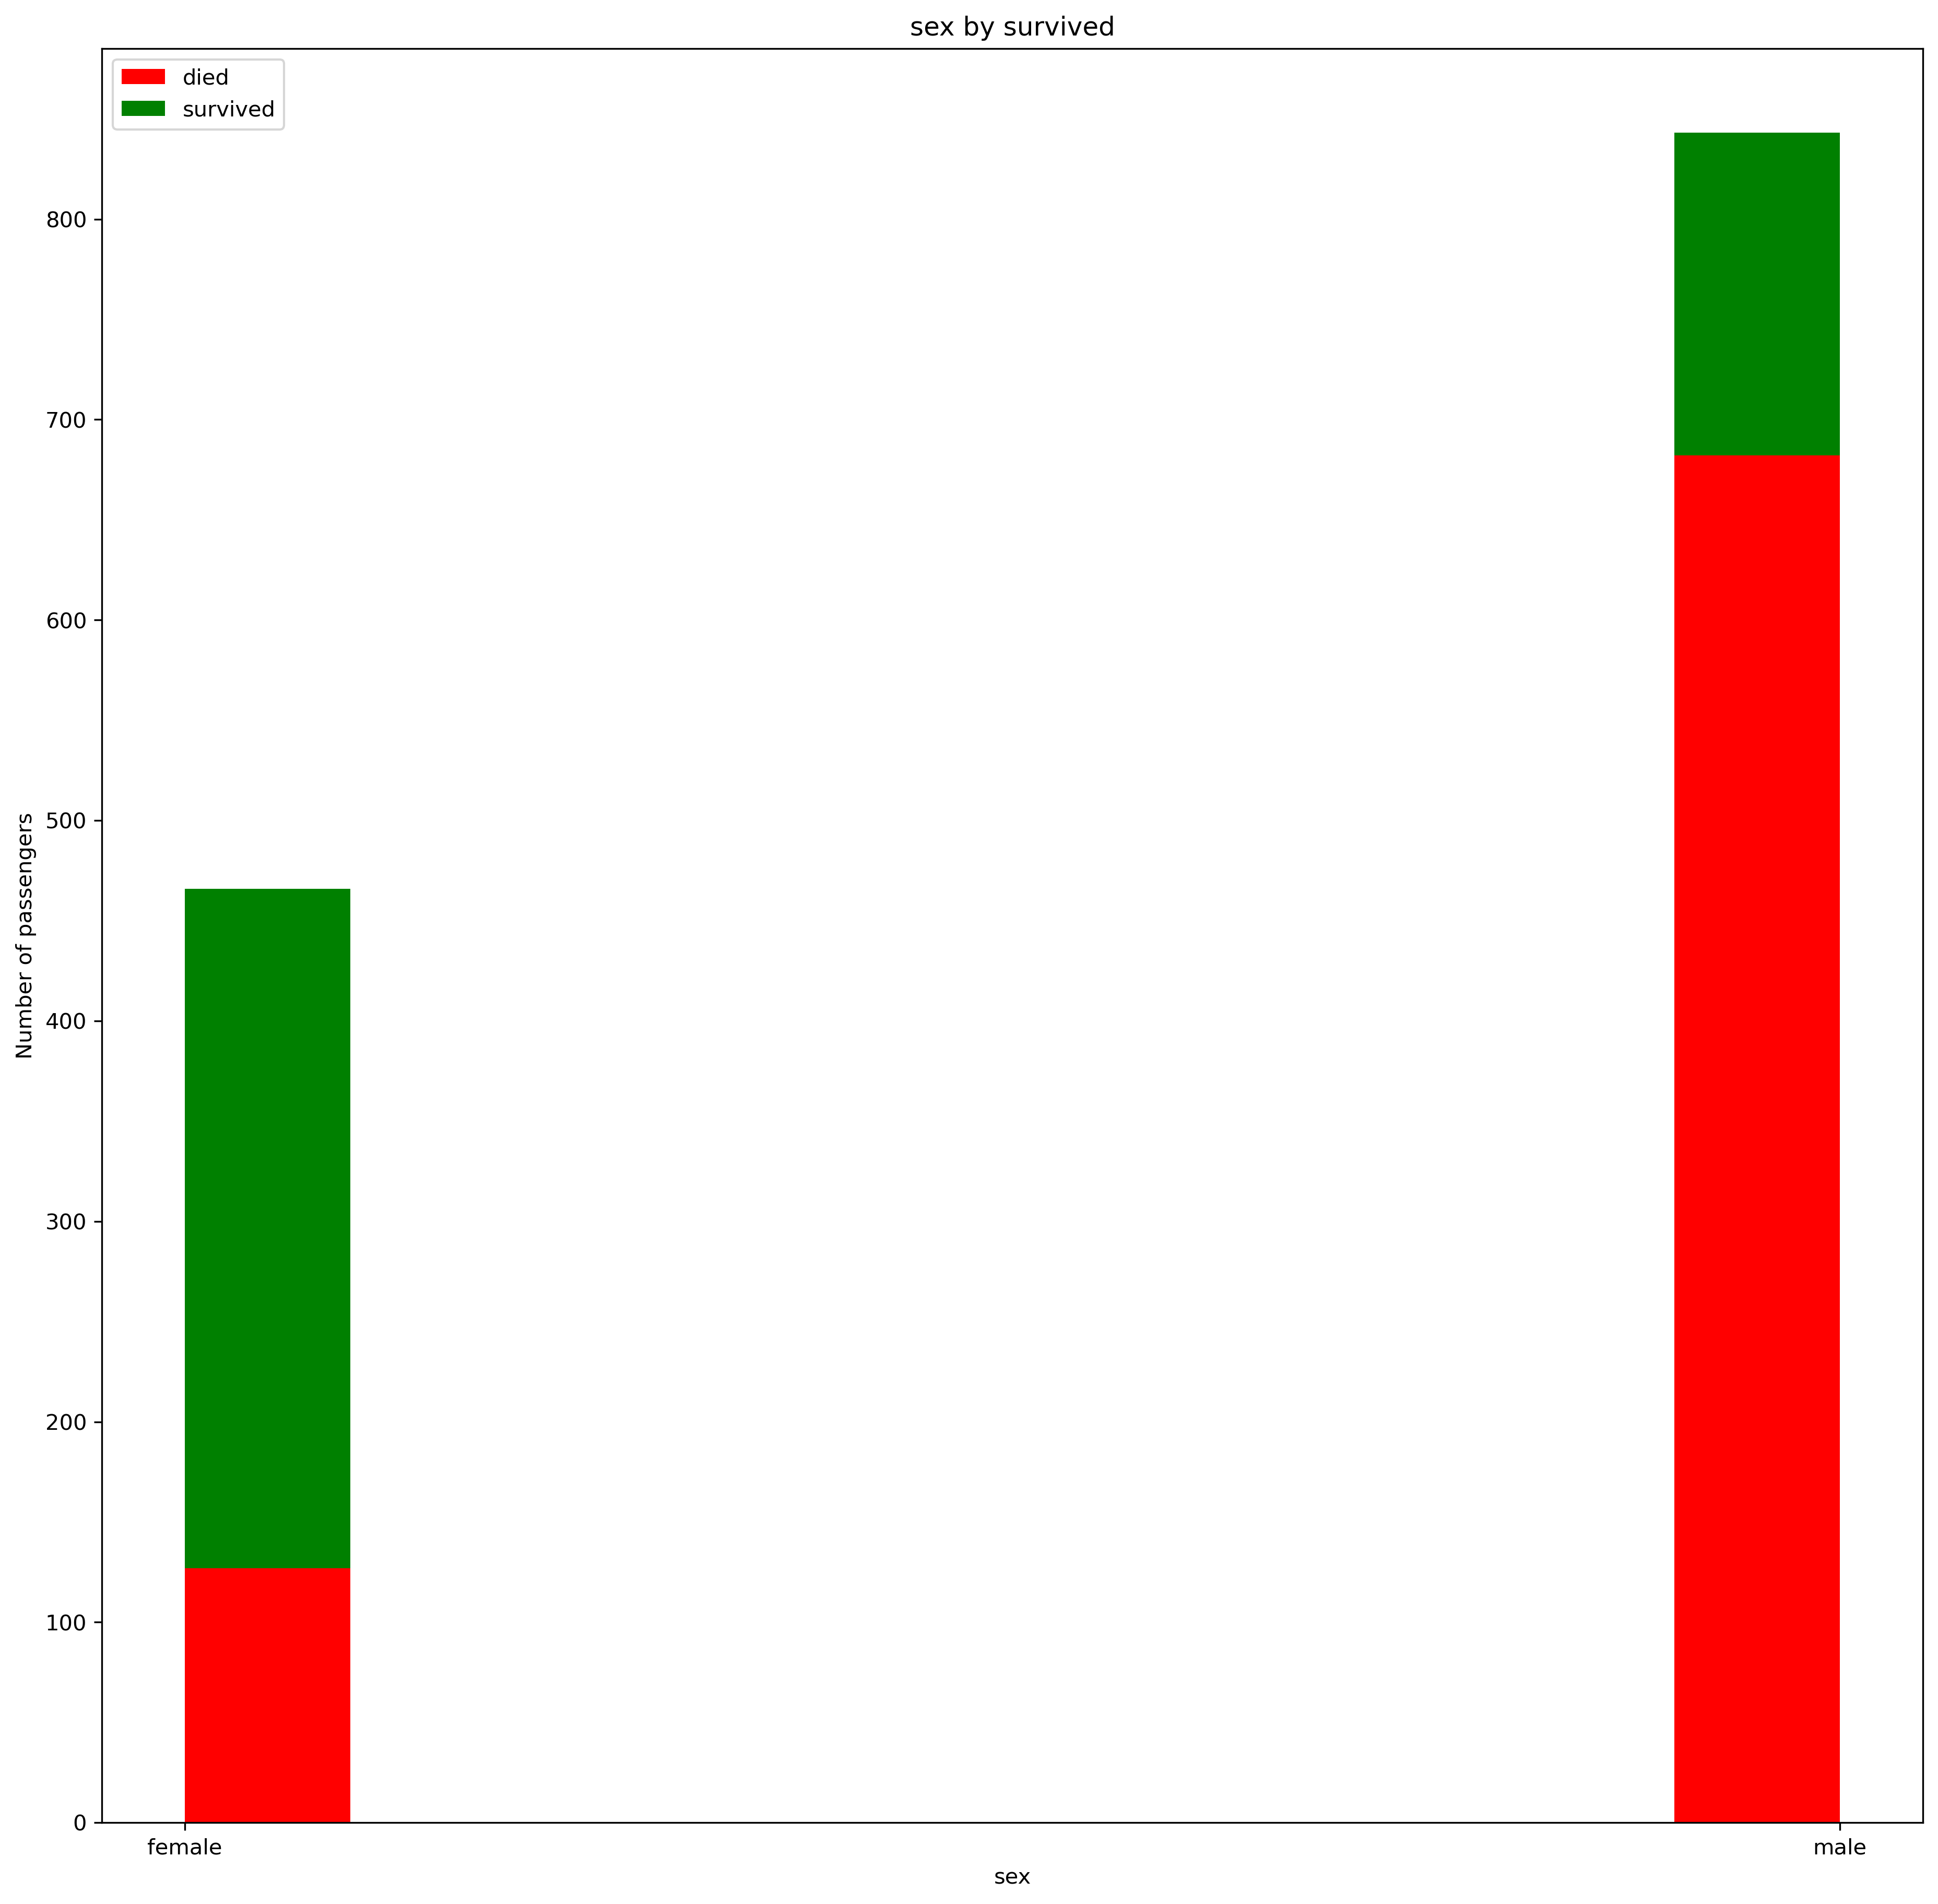

In [19]:
plot_distribution_by_target(feature="sex", stack=True)

In [20]:
df.groupby("sex").mean()["survived"]

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

We note a drastic survival rate advantage for females: a female is about 54% more likely to survive than a male is!

In [21]:
df.sex.isnull().sum()

0

There are no missing values.

#### * age

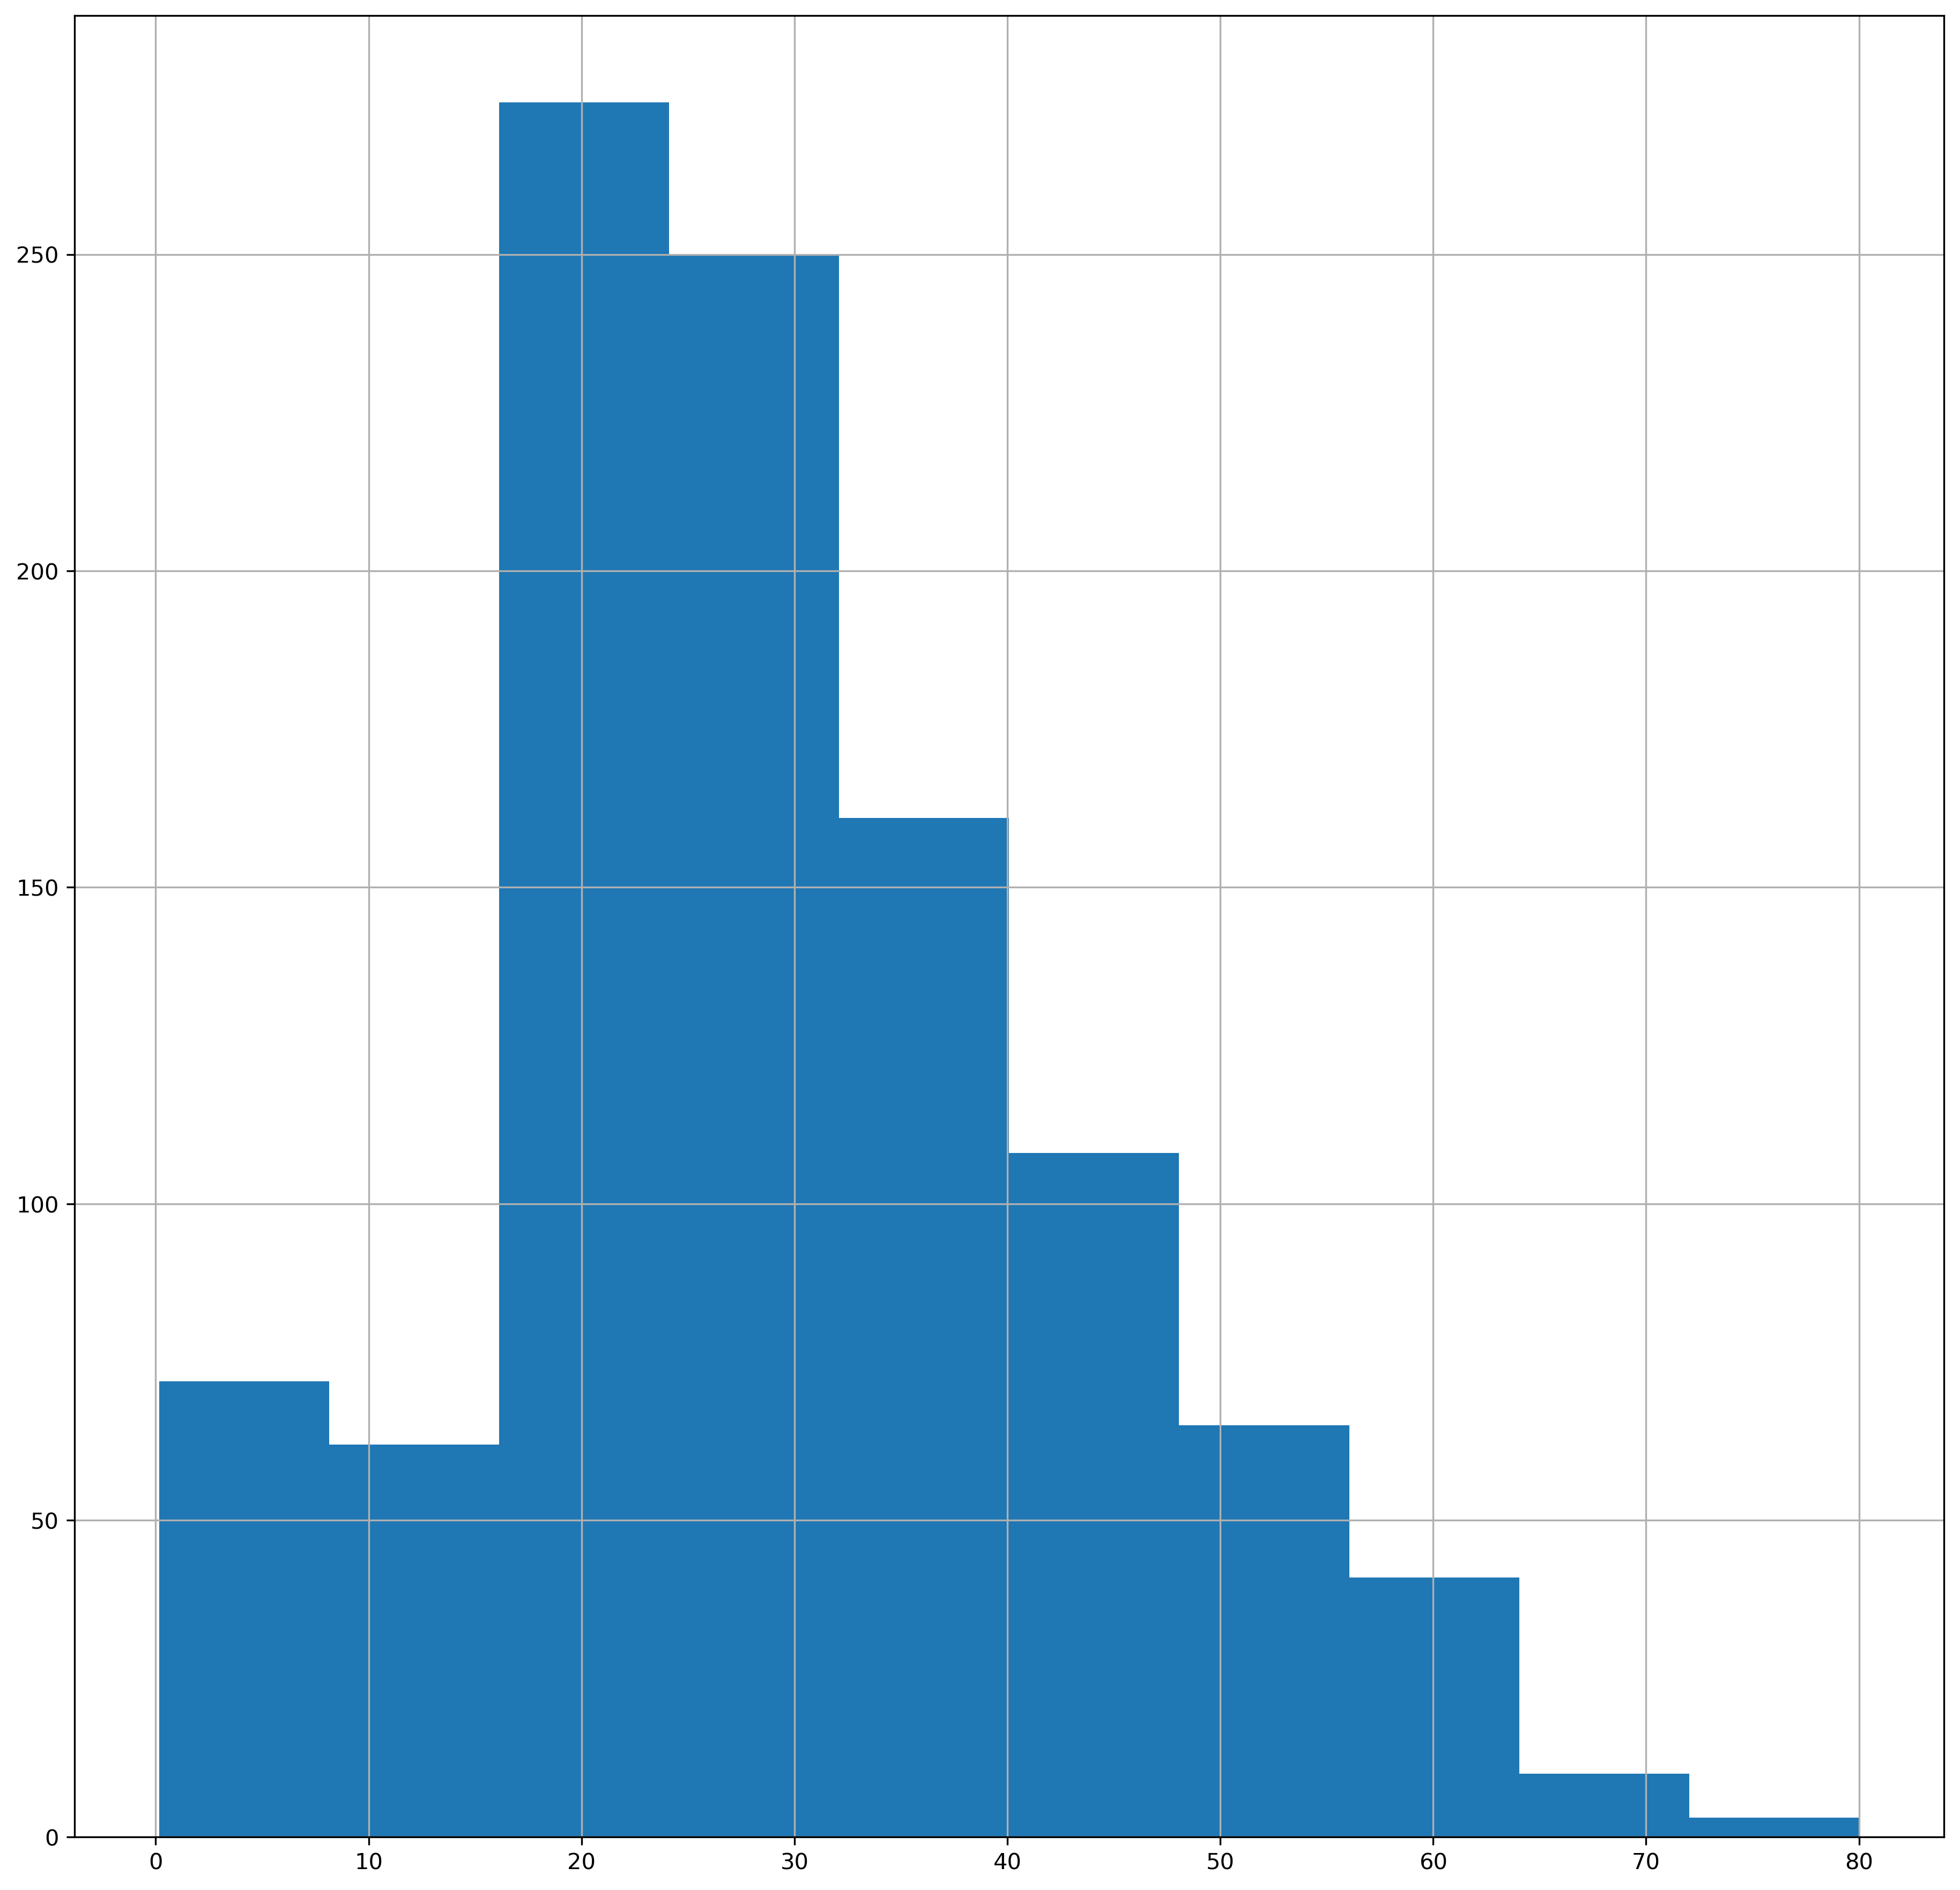

In [22]:
df.age.hist();

The most common ages refer to infants or young adults.

C:\Users\BASTIONMaxime\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\BASTIONMaxime\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


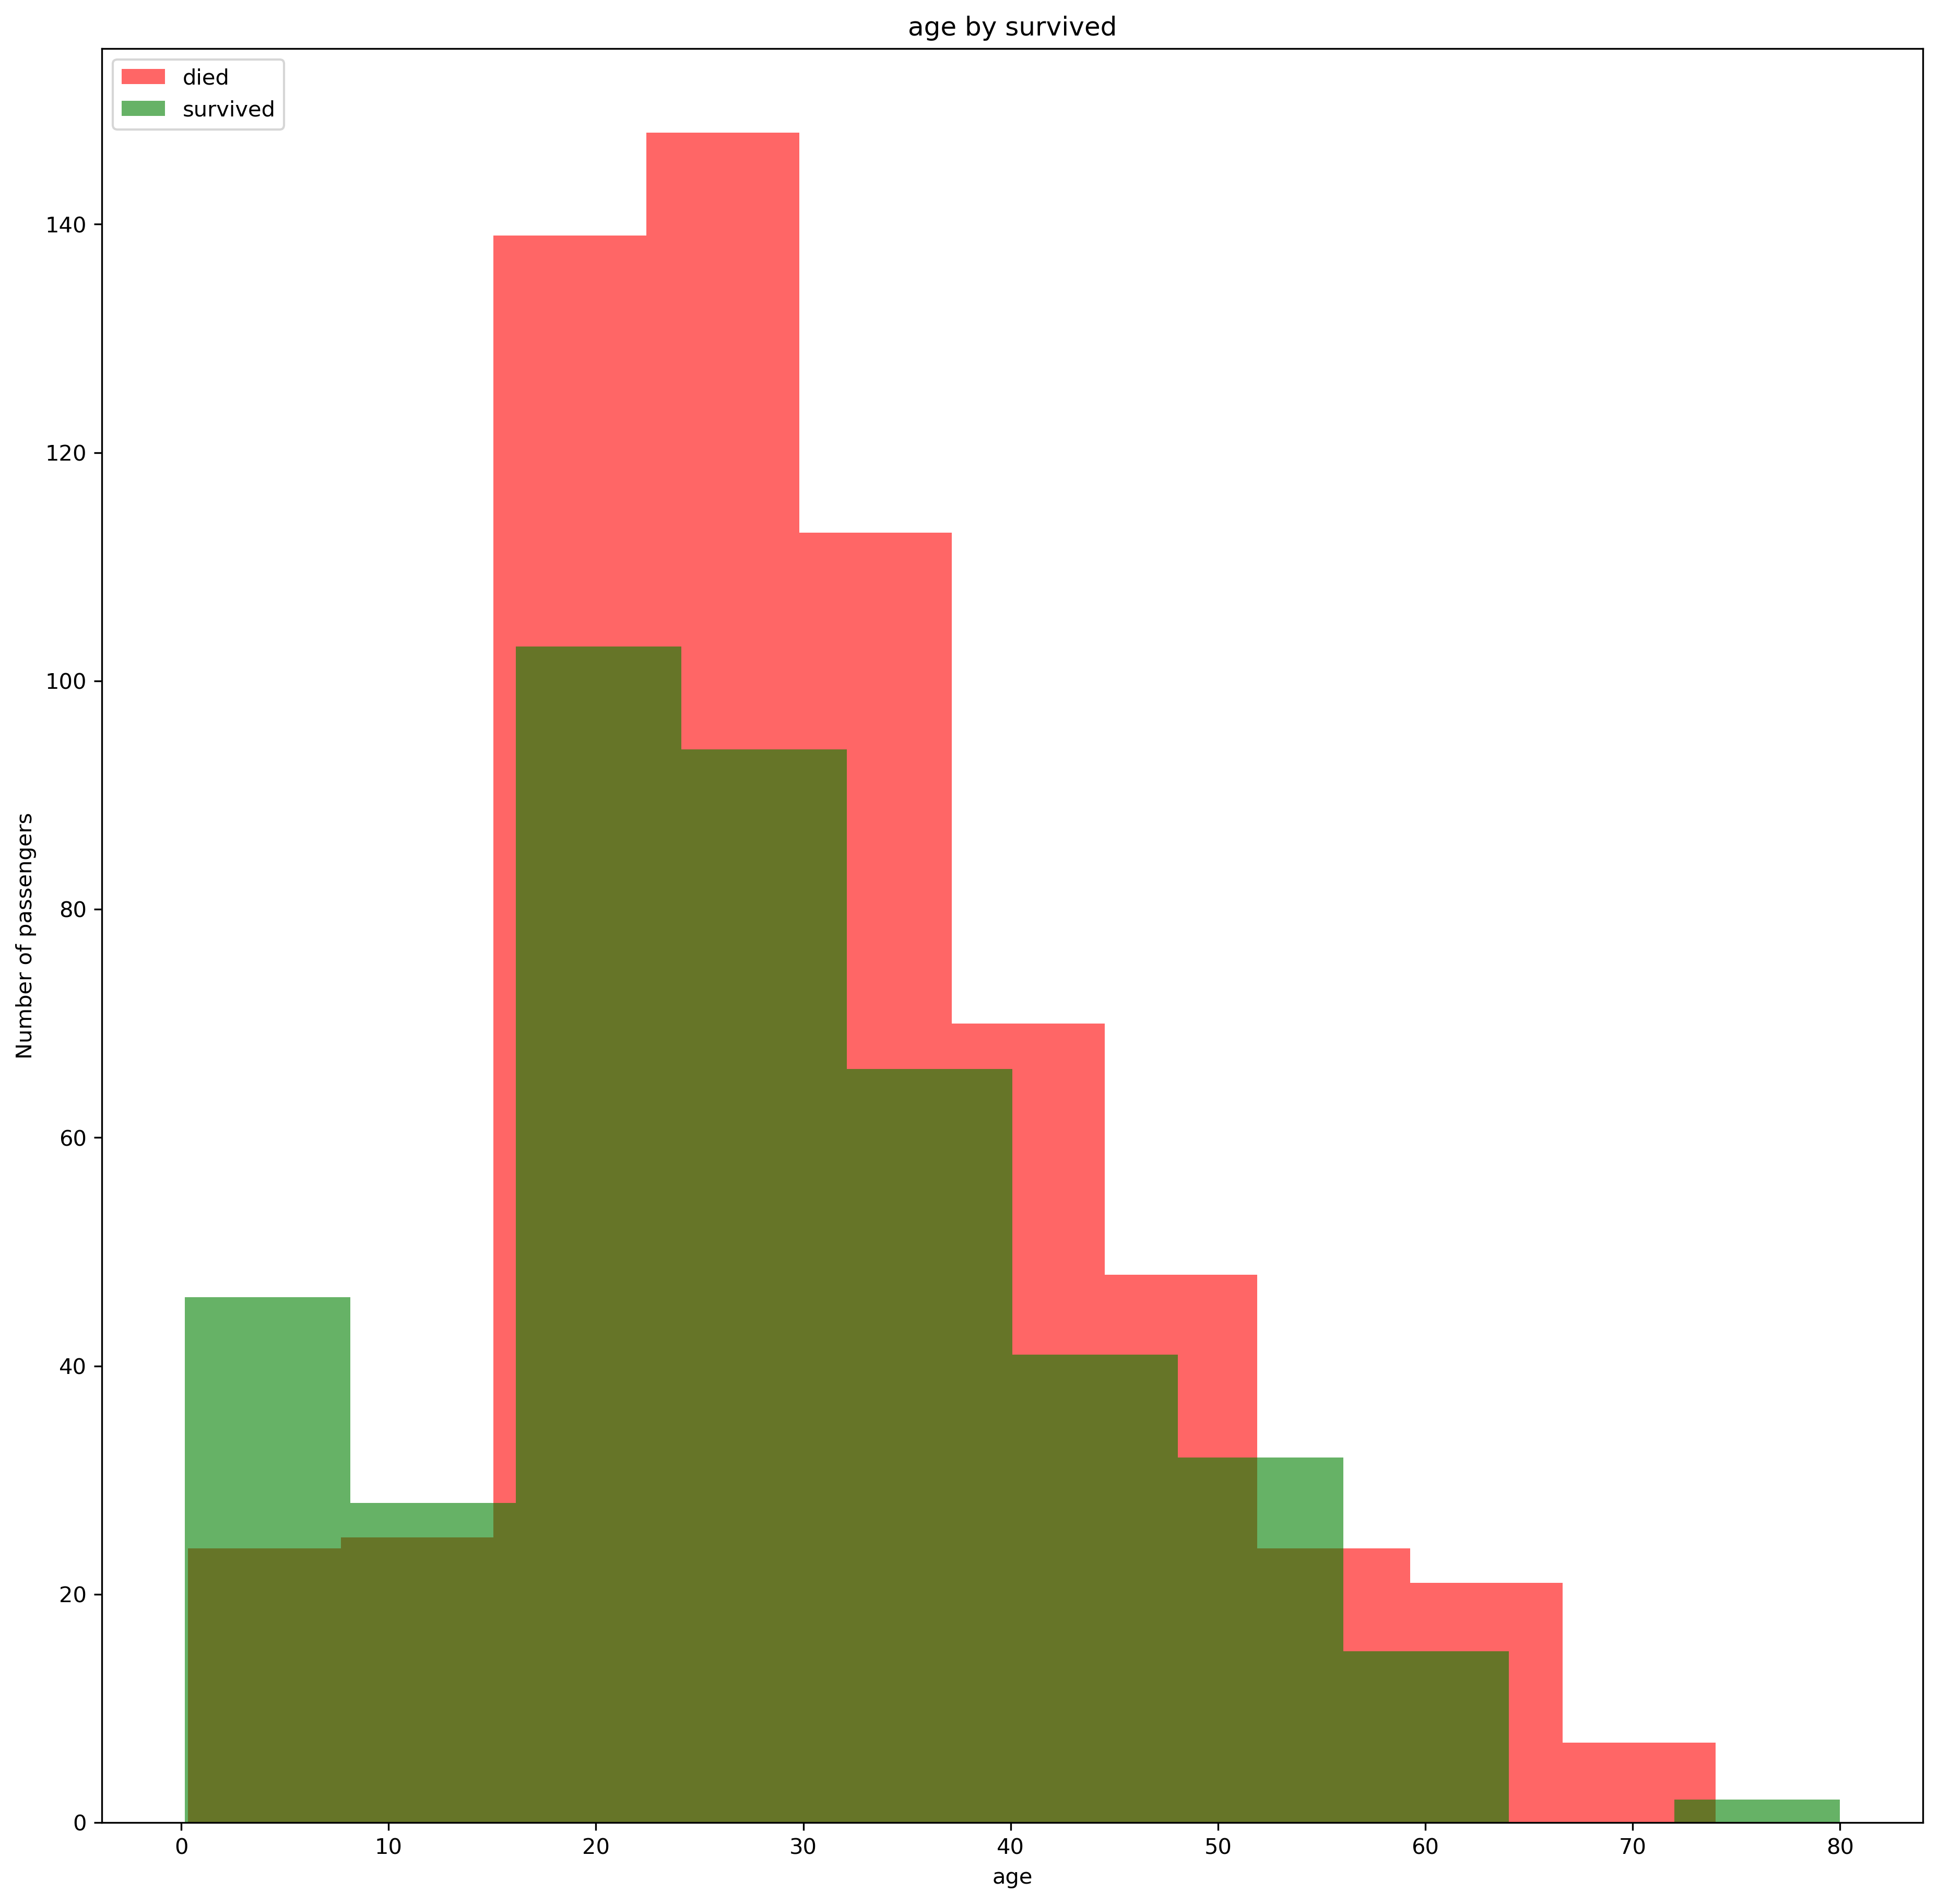

In [23]:
plot_distribution_by_target(feature="age")

The distribution of pclass for survivors is not drastically different from the distribution for those who died.

We do note that there are way more infants who survived than died. Let's explore this closer:

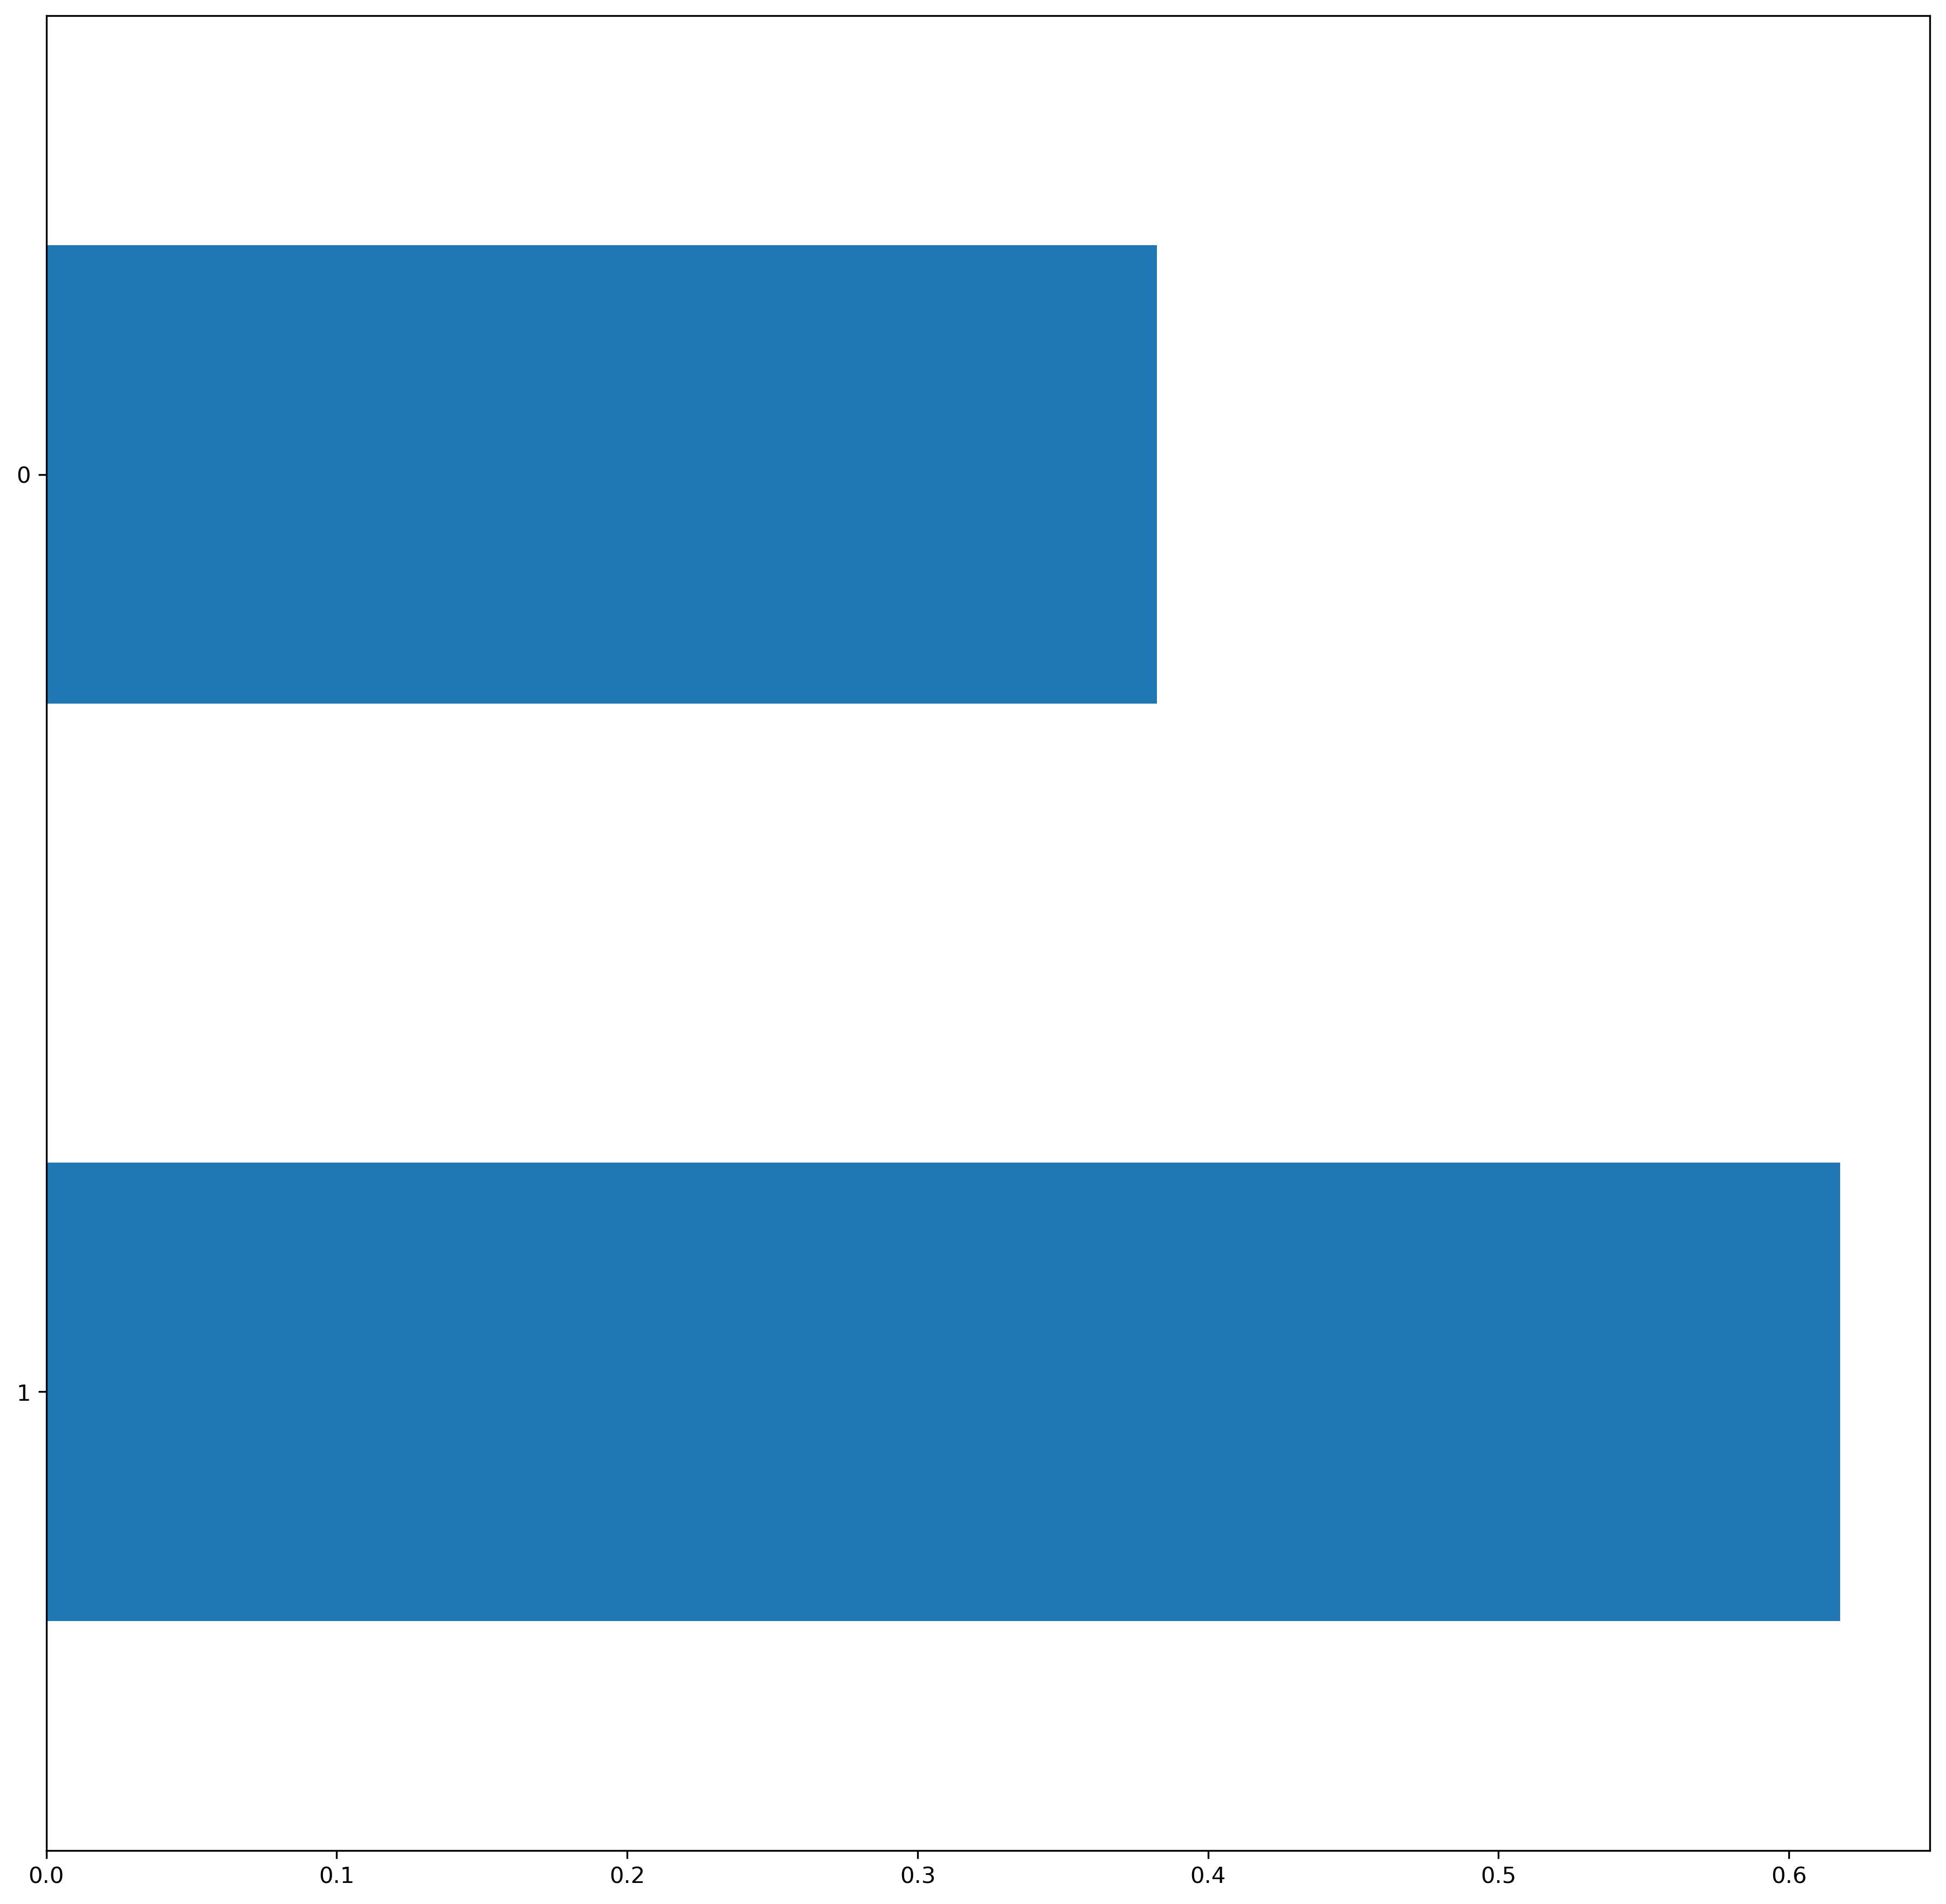

In [24]:
infants = df[df.age <= 2]
infants.survived.value_counts(normalize=True).plot.barh();

An infant has indeed a 62% change to survive.

In [25]:
n_nulls = df.age.isnull().sum()
n_nulls
n_nulls / len(df) * 100

263

20.091673032849503

There are 263 (20%) passengers for which we do not have an age value.
We will take a decision after the completion of the exploratory analysis.

#### * sibsp (Number of Siblings/Spouses Aboard)

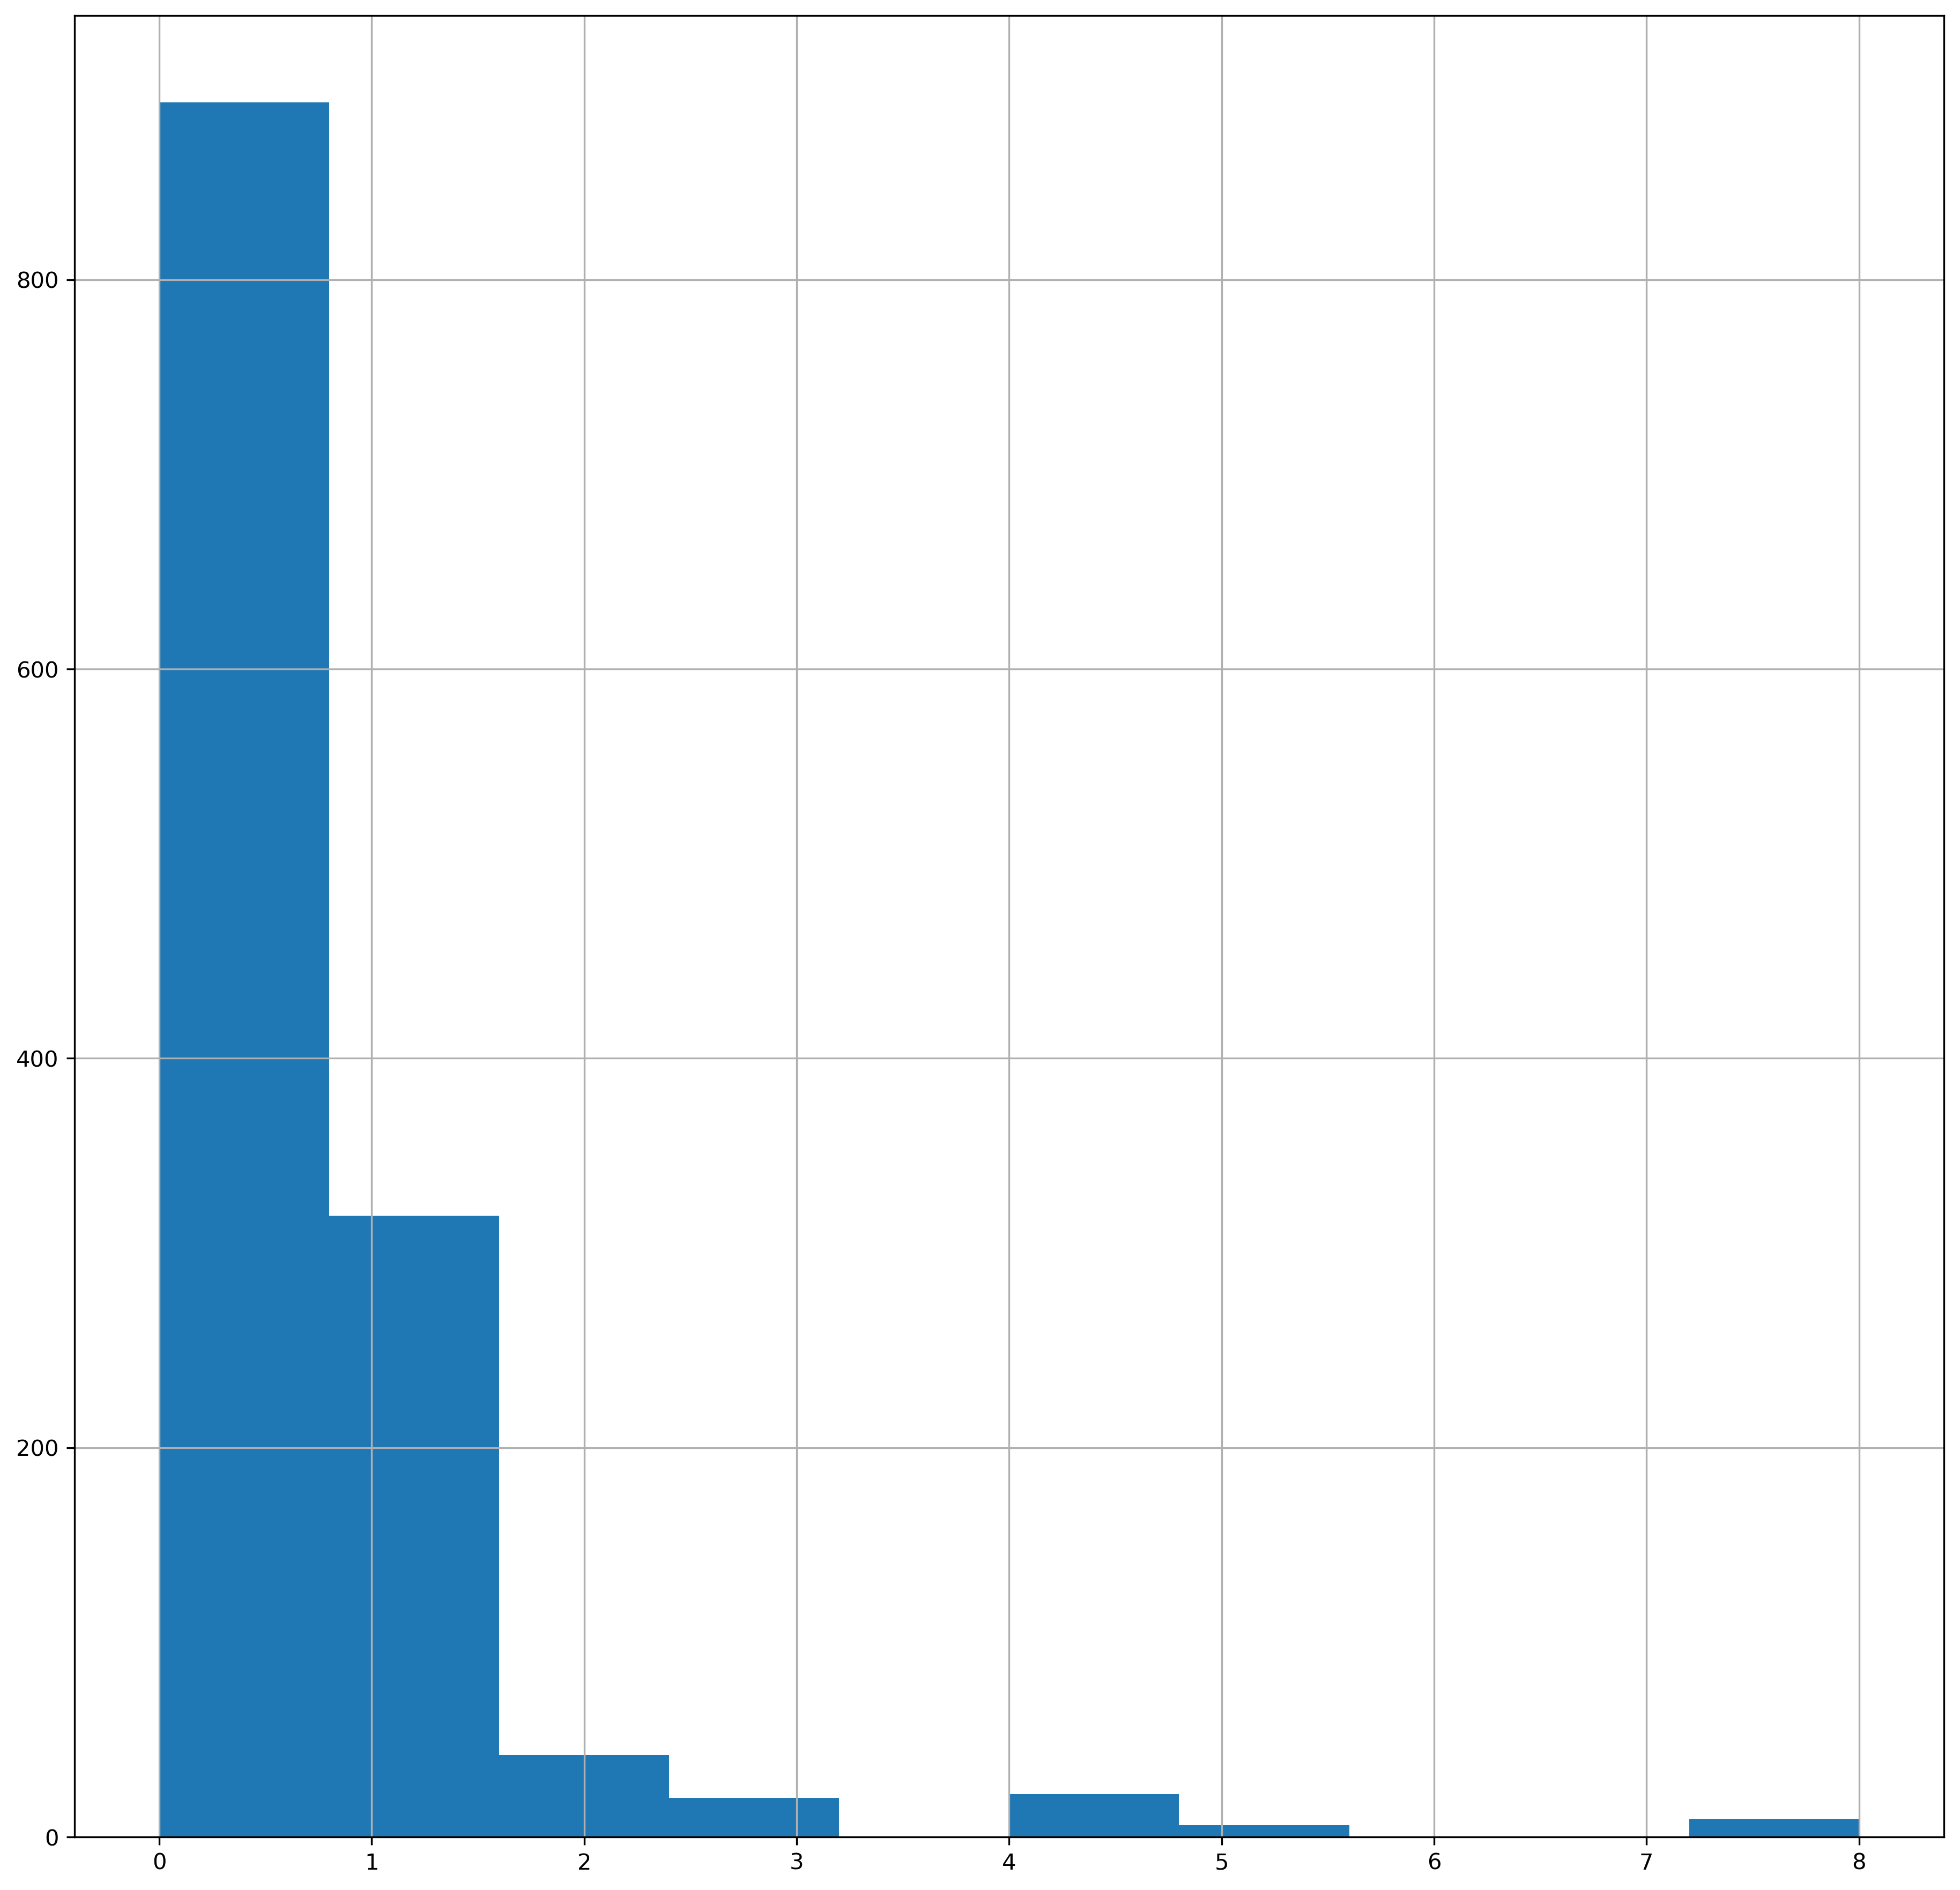

In [26]:
df.sibsp.hist();

Most passengers had no siblings or spouses aboard.

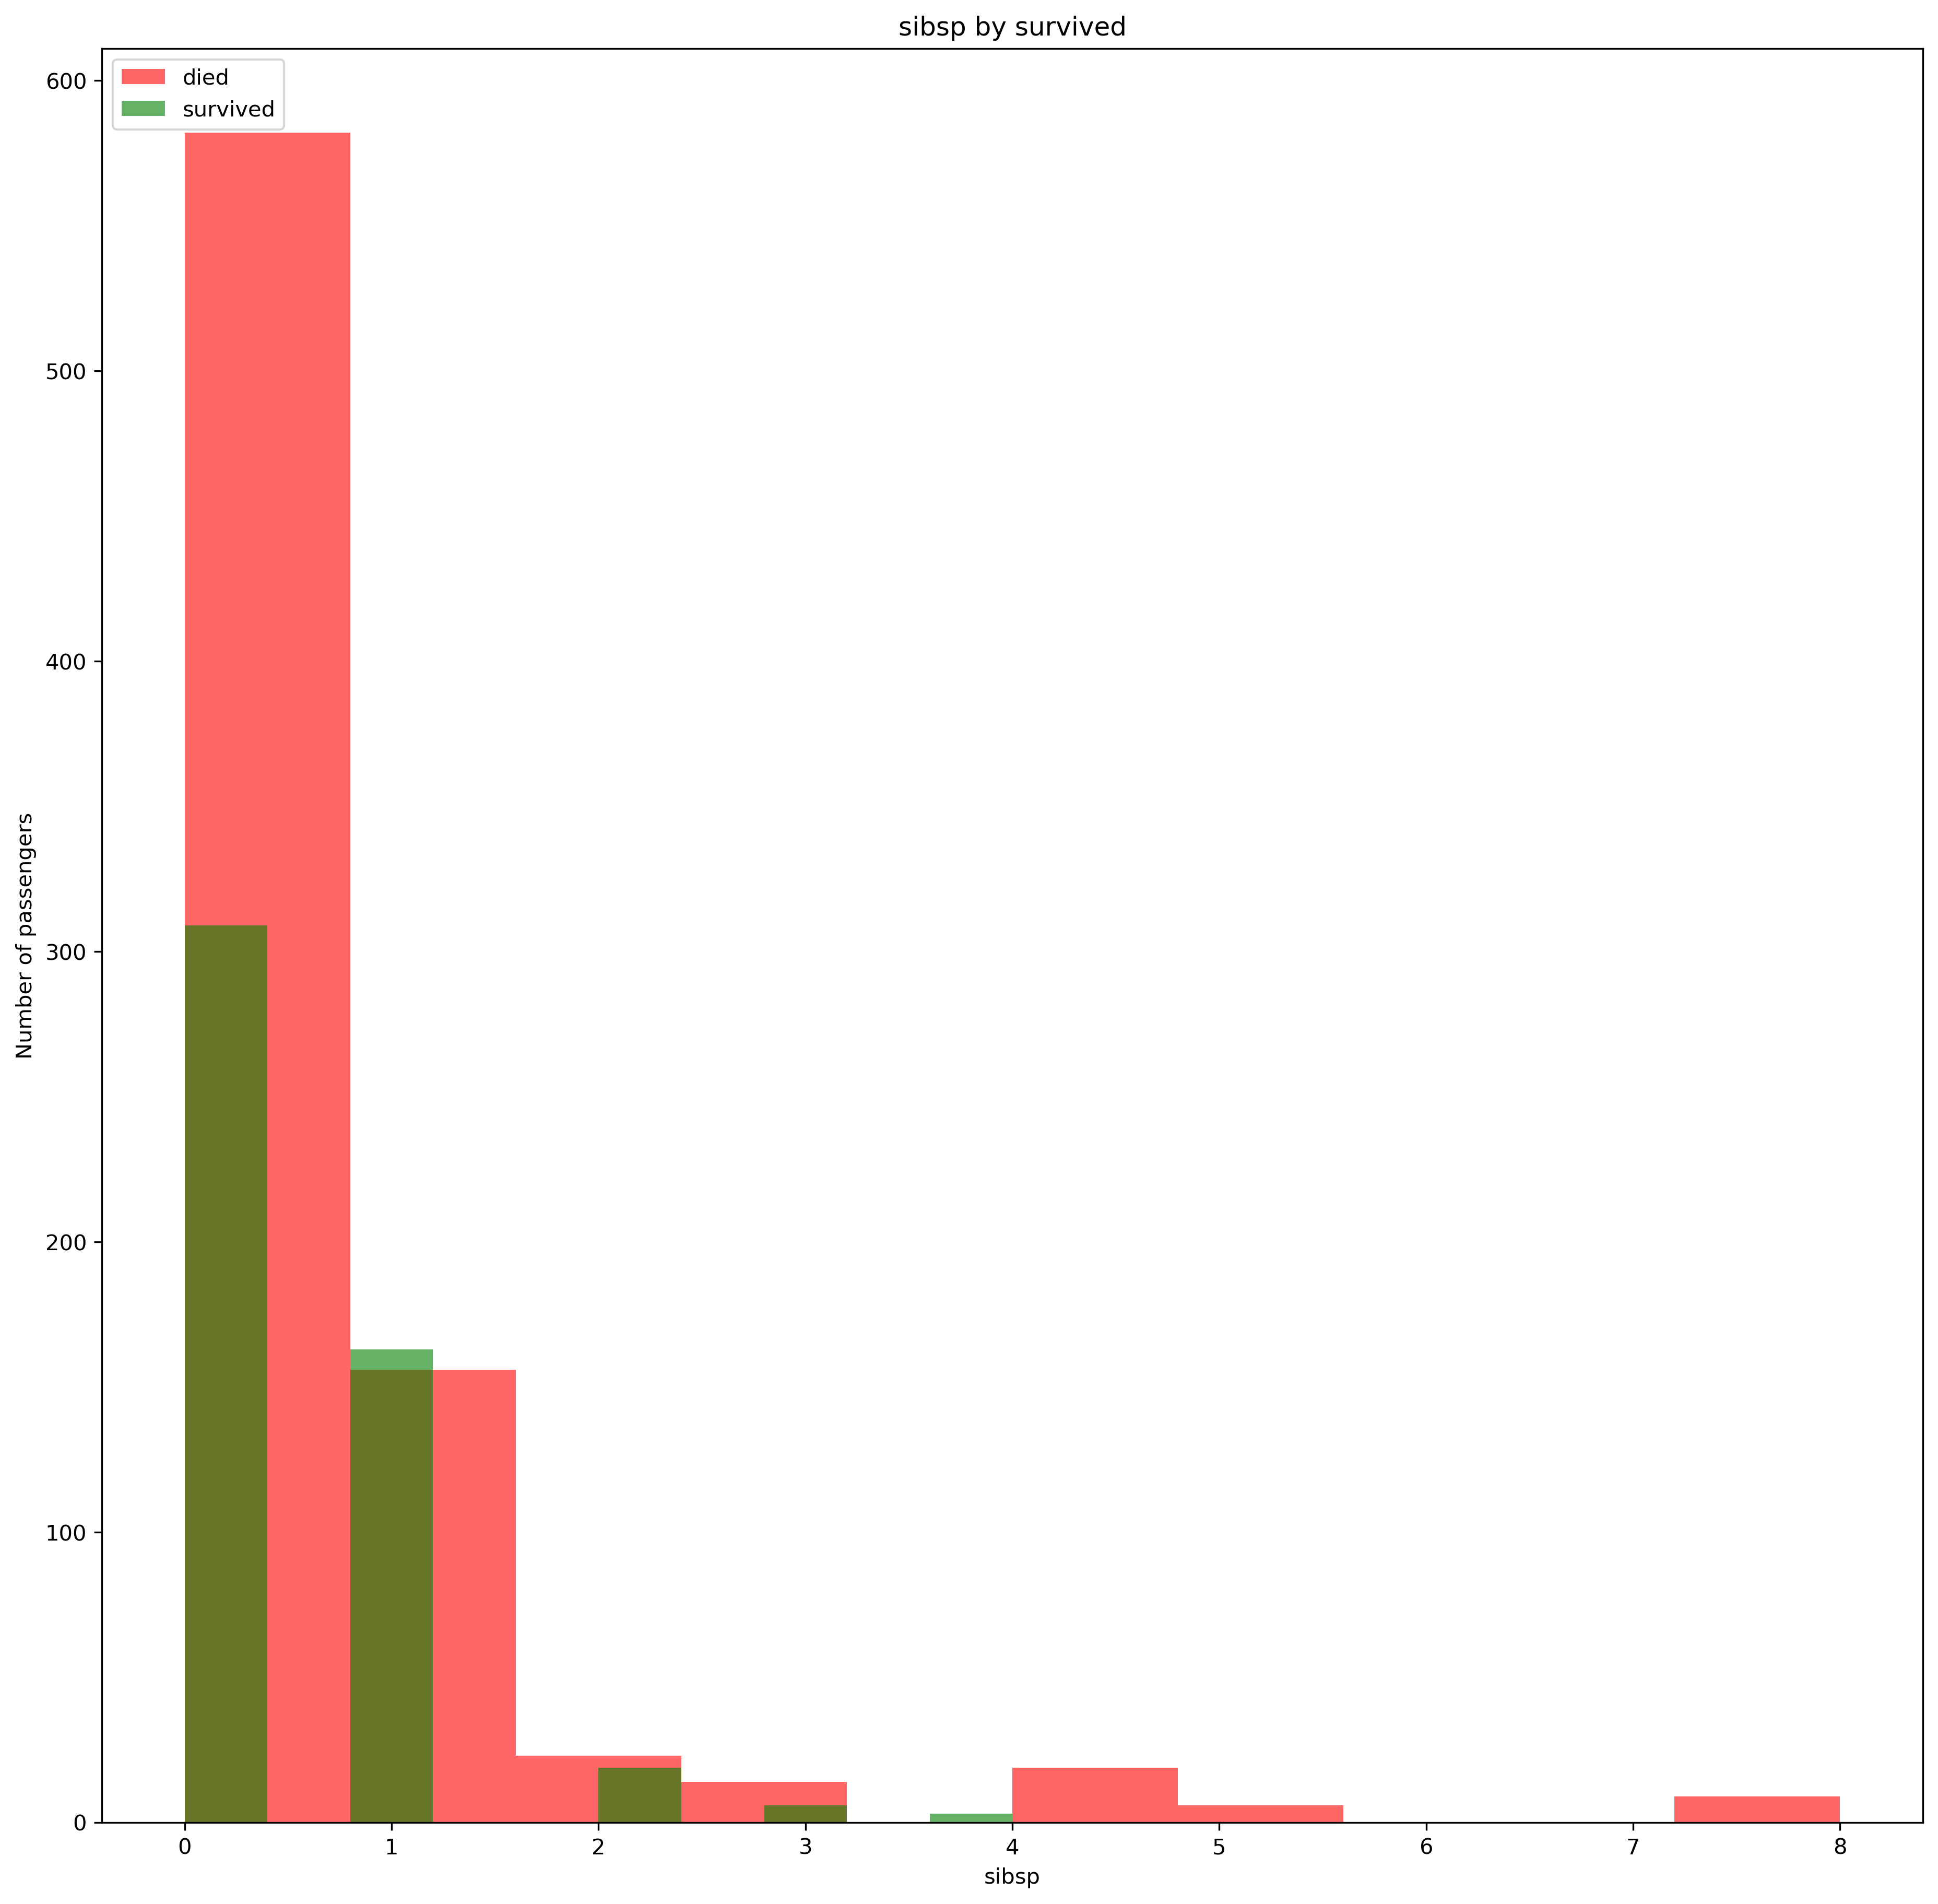

In [27]:
plot_distribution_by_target(feature="sibsp", stack=False)

It appears that passengers having siblings/spouses survived more.

In [28]:
df[df.sibsp > 0]["survived"].value_counts(normalize=True)
df[df.sibsp == 0]["survived"].value_counts(normalize=True)

0    0.543062
1    0.456938
Name: survived, dtype: float64

0    0.653199
1    0.346801
Name: survived, dtype: float64

Passengers with at least one sibling/spouse survived about 10% more.

In [29]:
df.sibsp.isnull().sum()

0

There are no missing values.

#### * parch (Number of Parents/Children Aboard)

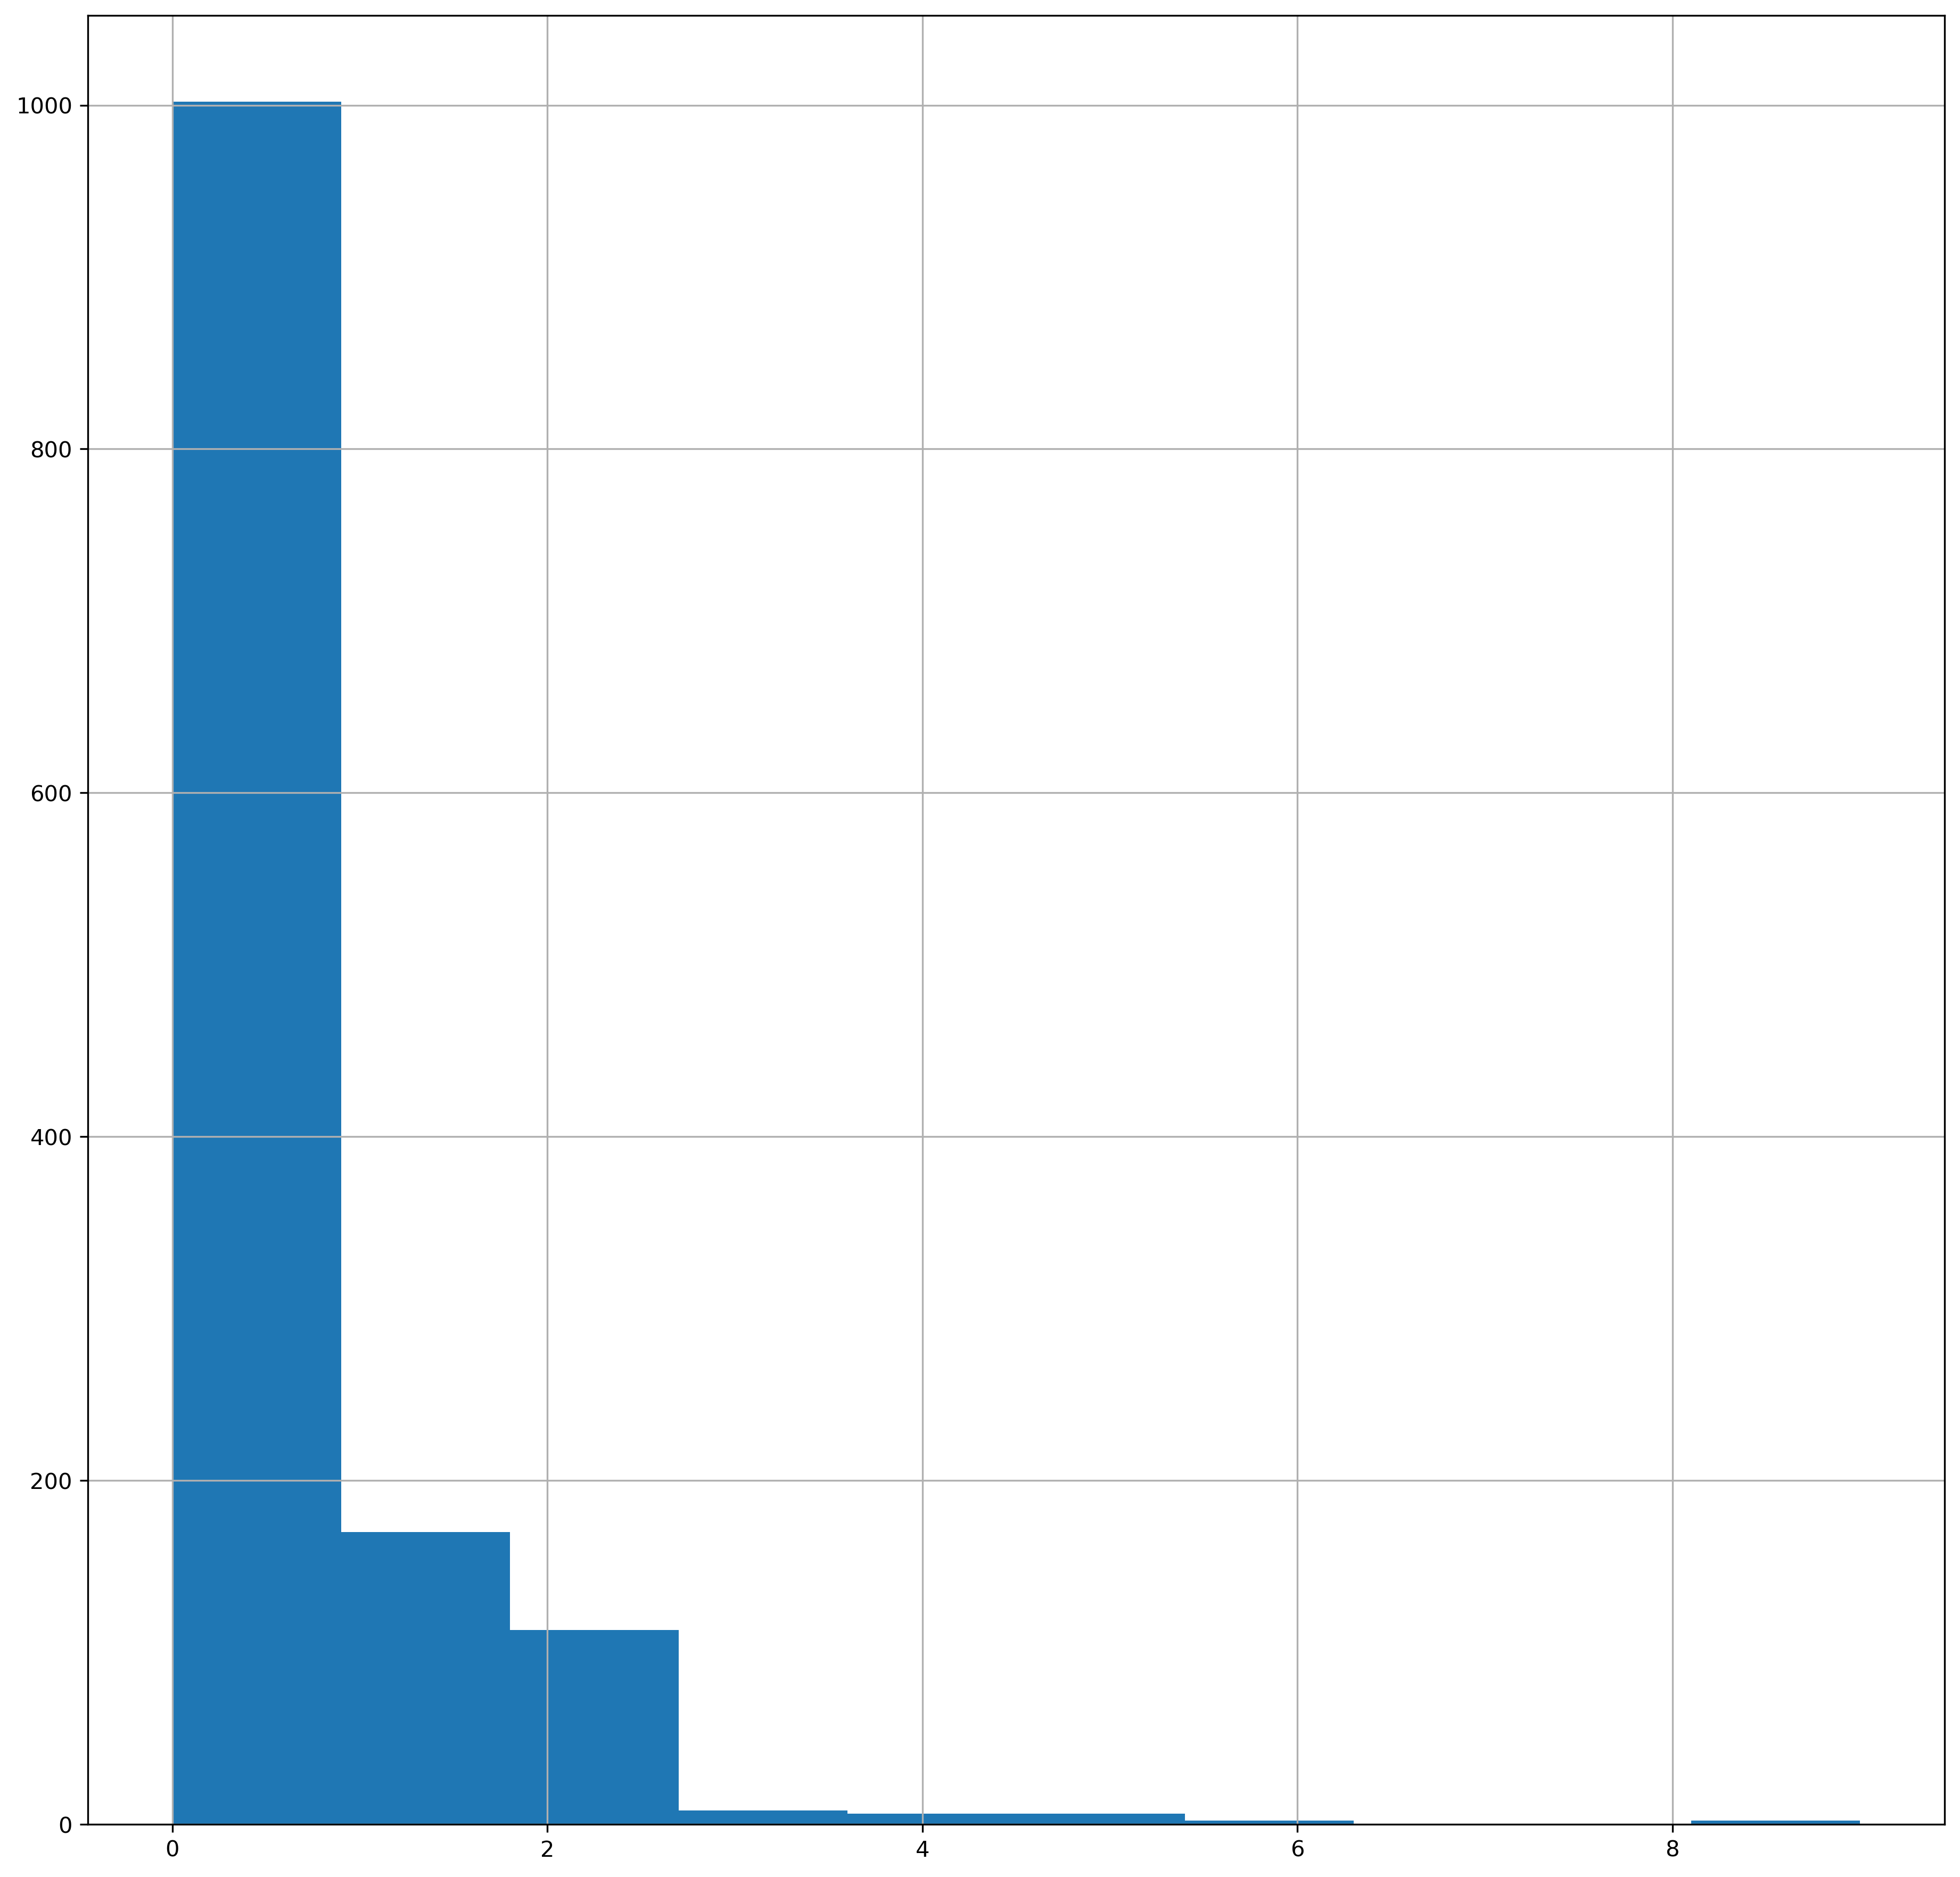

In [30]:
df.parch.hist();

Very right-skewed distribution: most passengers had 0 parents/children aboard.

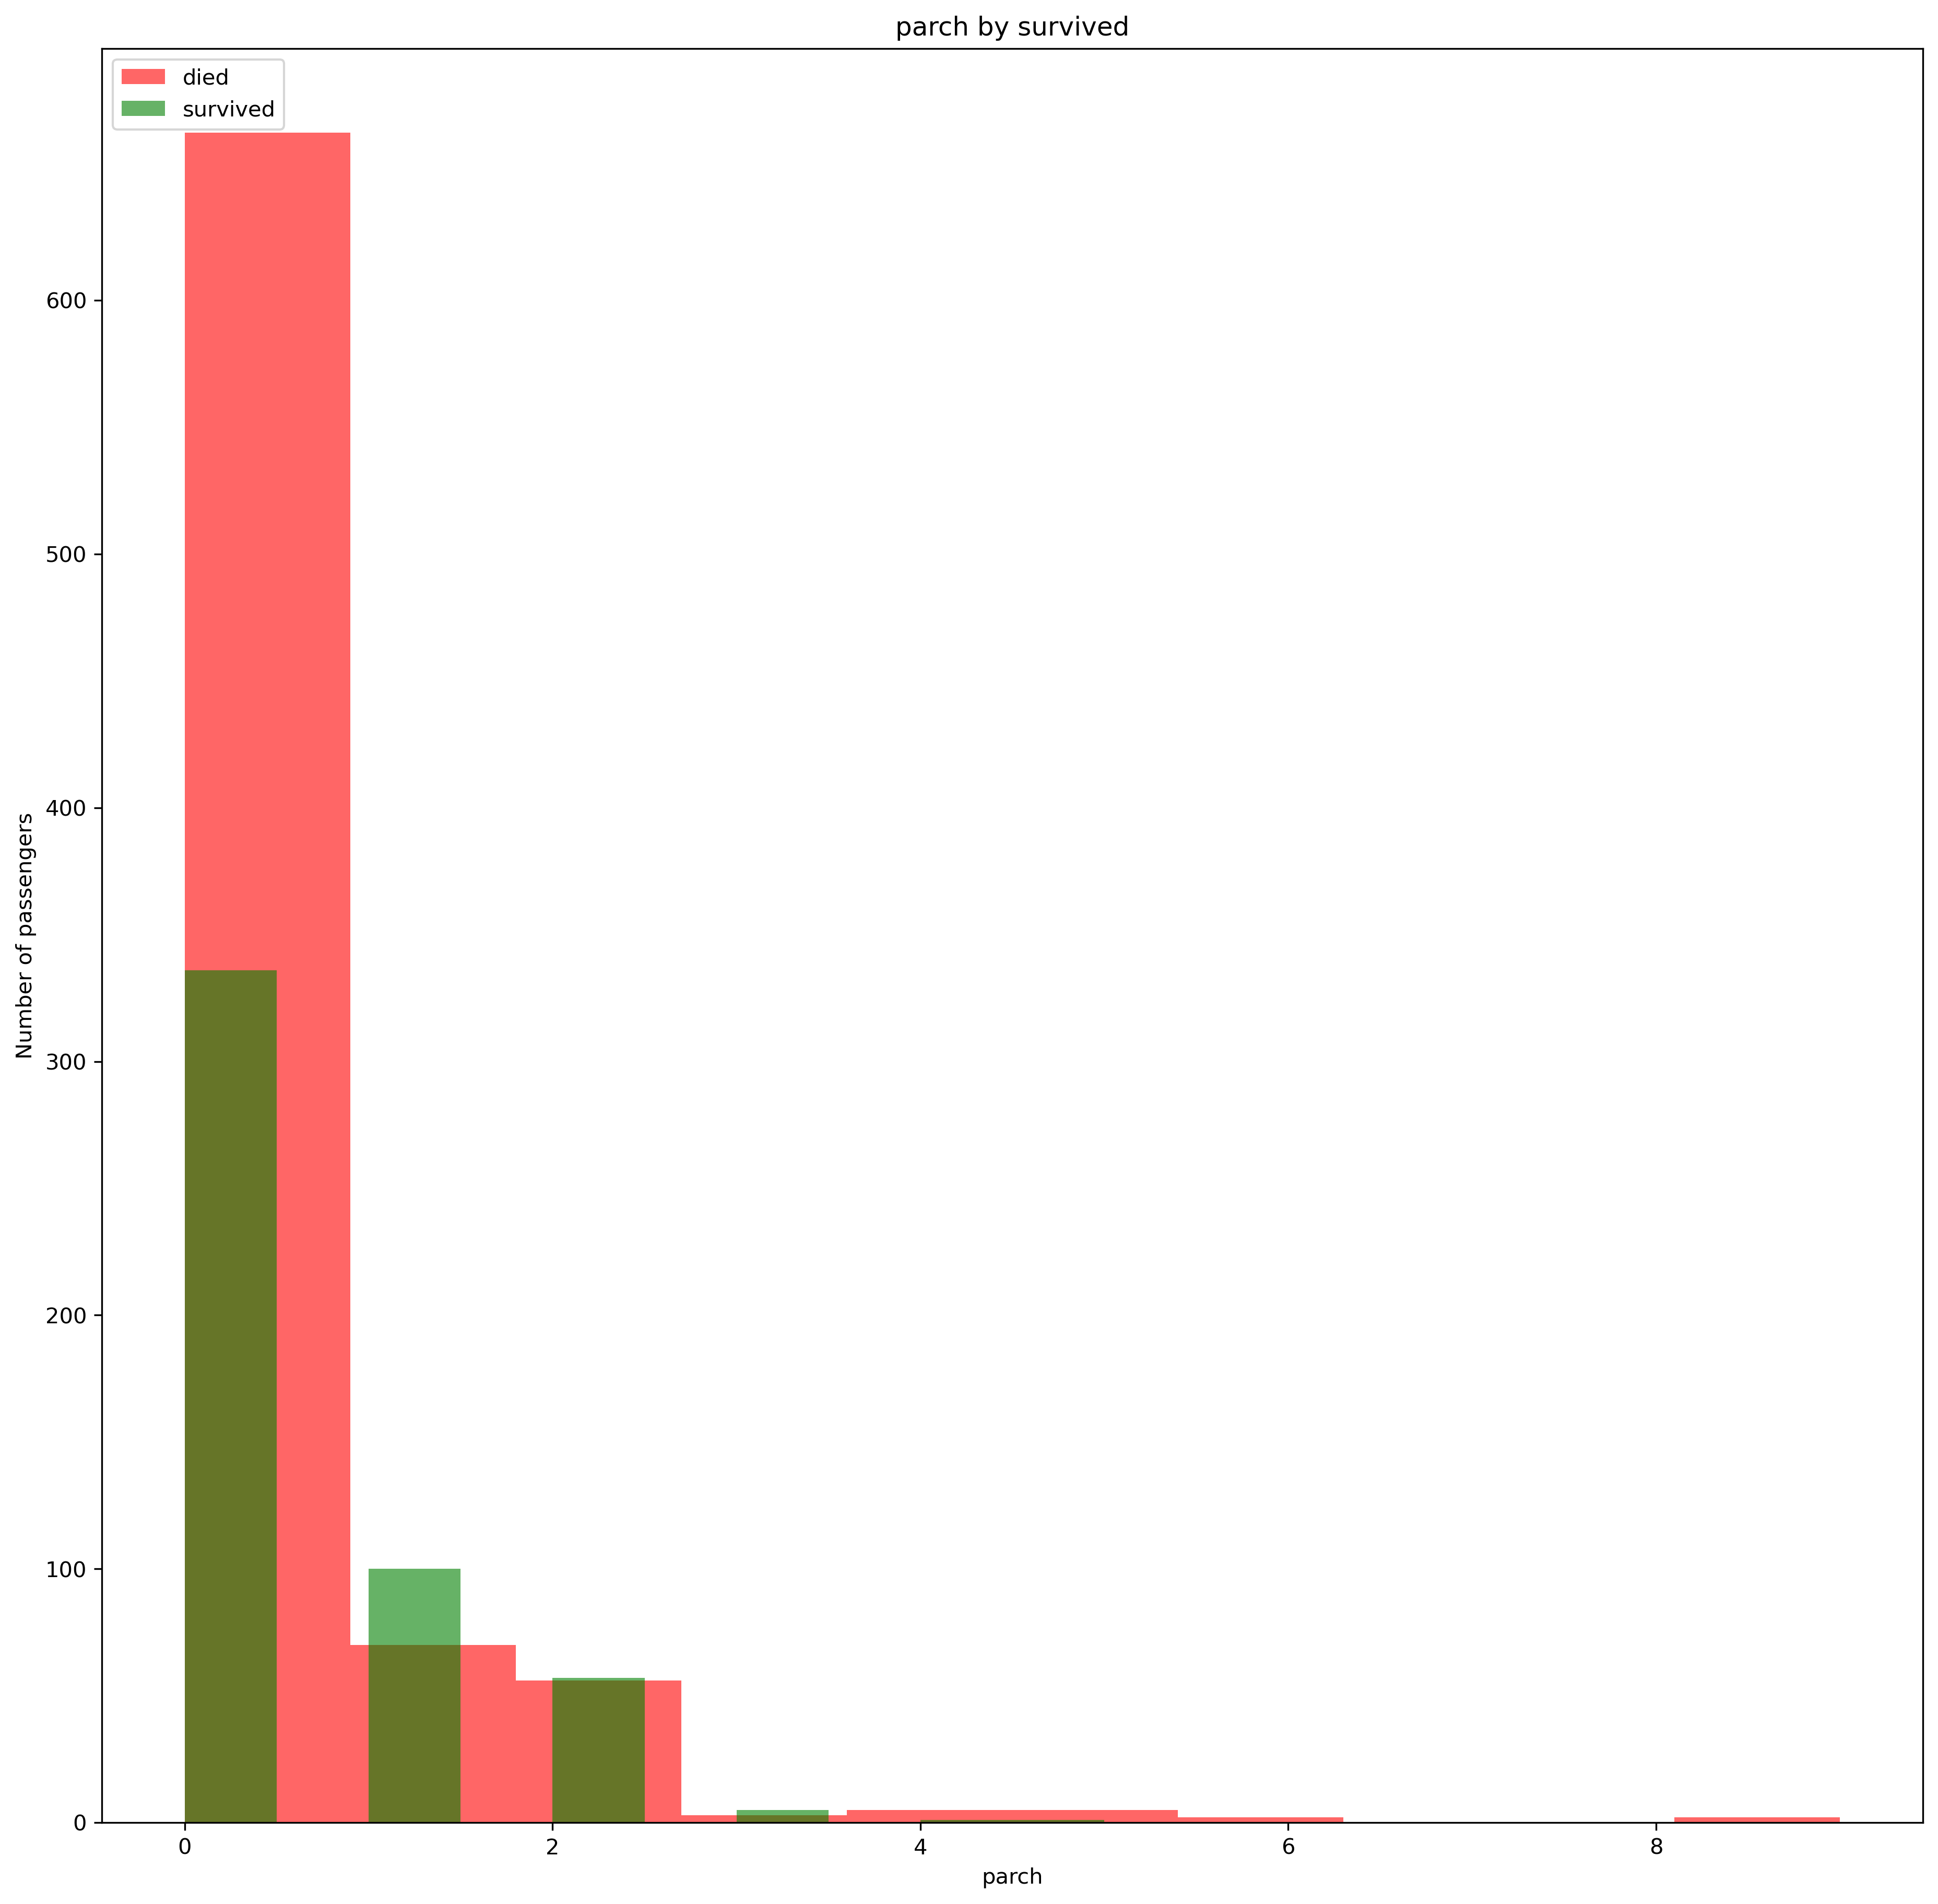

In [31]:
plot_distribution_by_target(feature="parch")

It appears that passengers having parents/children survived more.

In [32]:
df[df.parch > 0]["survived"].value_counts(normalize=True)
df[df.parch == 0]["survived"].value_counts(normalize=True)

1    0.534202
0    0.465798
Name: survived, dtype: float64

0    0.664671
1    0.335329
Name: survived, dtype: float64

Passengers having at least 1 parent/child survived 13% more.

In [33]:
df.parch.isnull().sum()

0

There are no missing values.

#### * ticket (Ticker number)

In [34]:
df.ticket.head(10)

0       24160
1      113781
2      113781
3      113781
4      113781
5       19952
6       13502
7      112050
8       11769
9    PC 17609
Name: ticket, dtype: object

In [35]:
df.ticket.describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

It is very like that the ticket number does not contain any meaningful information for our purpose.

In [36]:
df.ticket.isnull().sum()

0

There are no missing values.

#### * fare (Pre-1970 British Pounds (£))

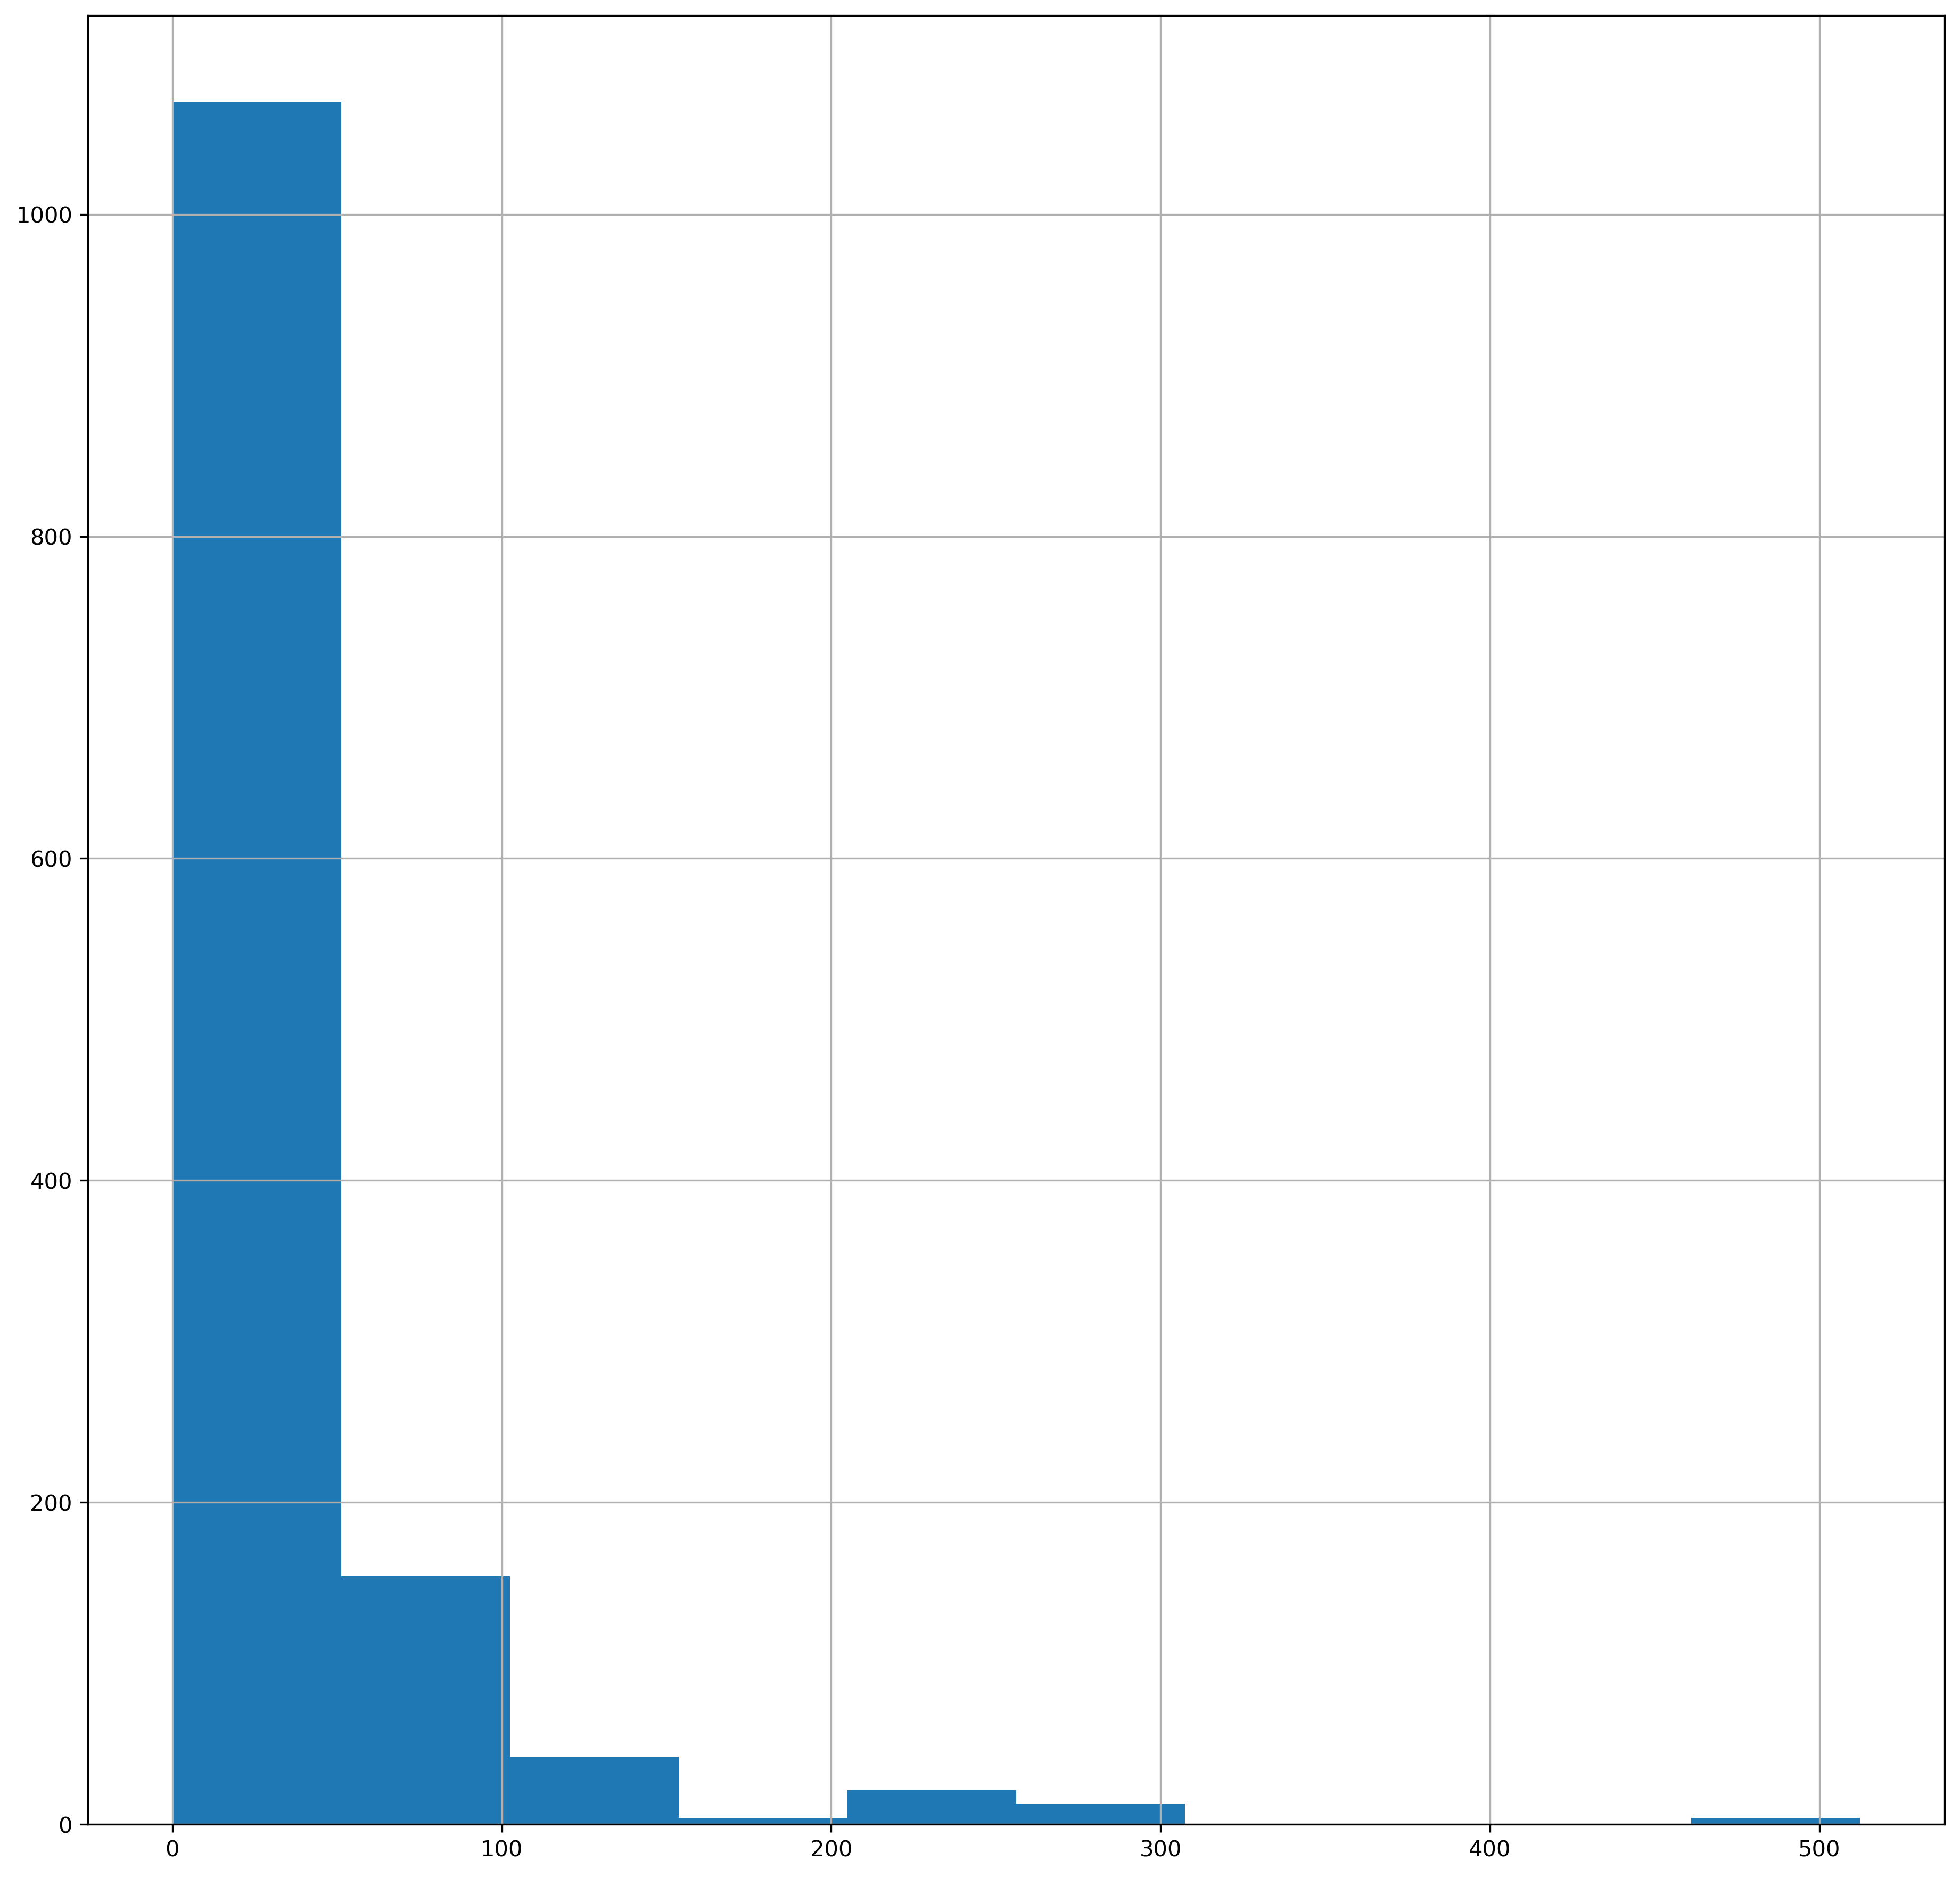

In [37]:
df.fare.hist();

Most passengers paid less than 100£.

A few passengers (outliers?) paid 5 times that amount.

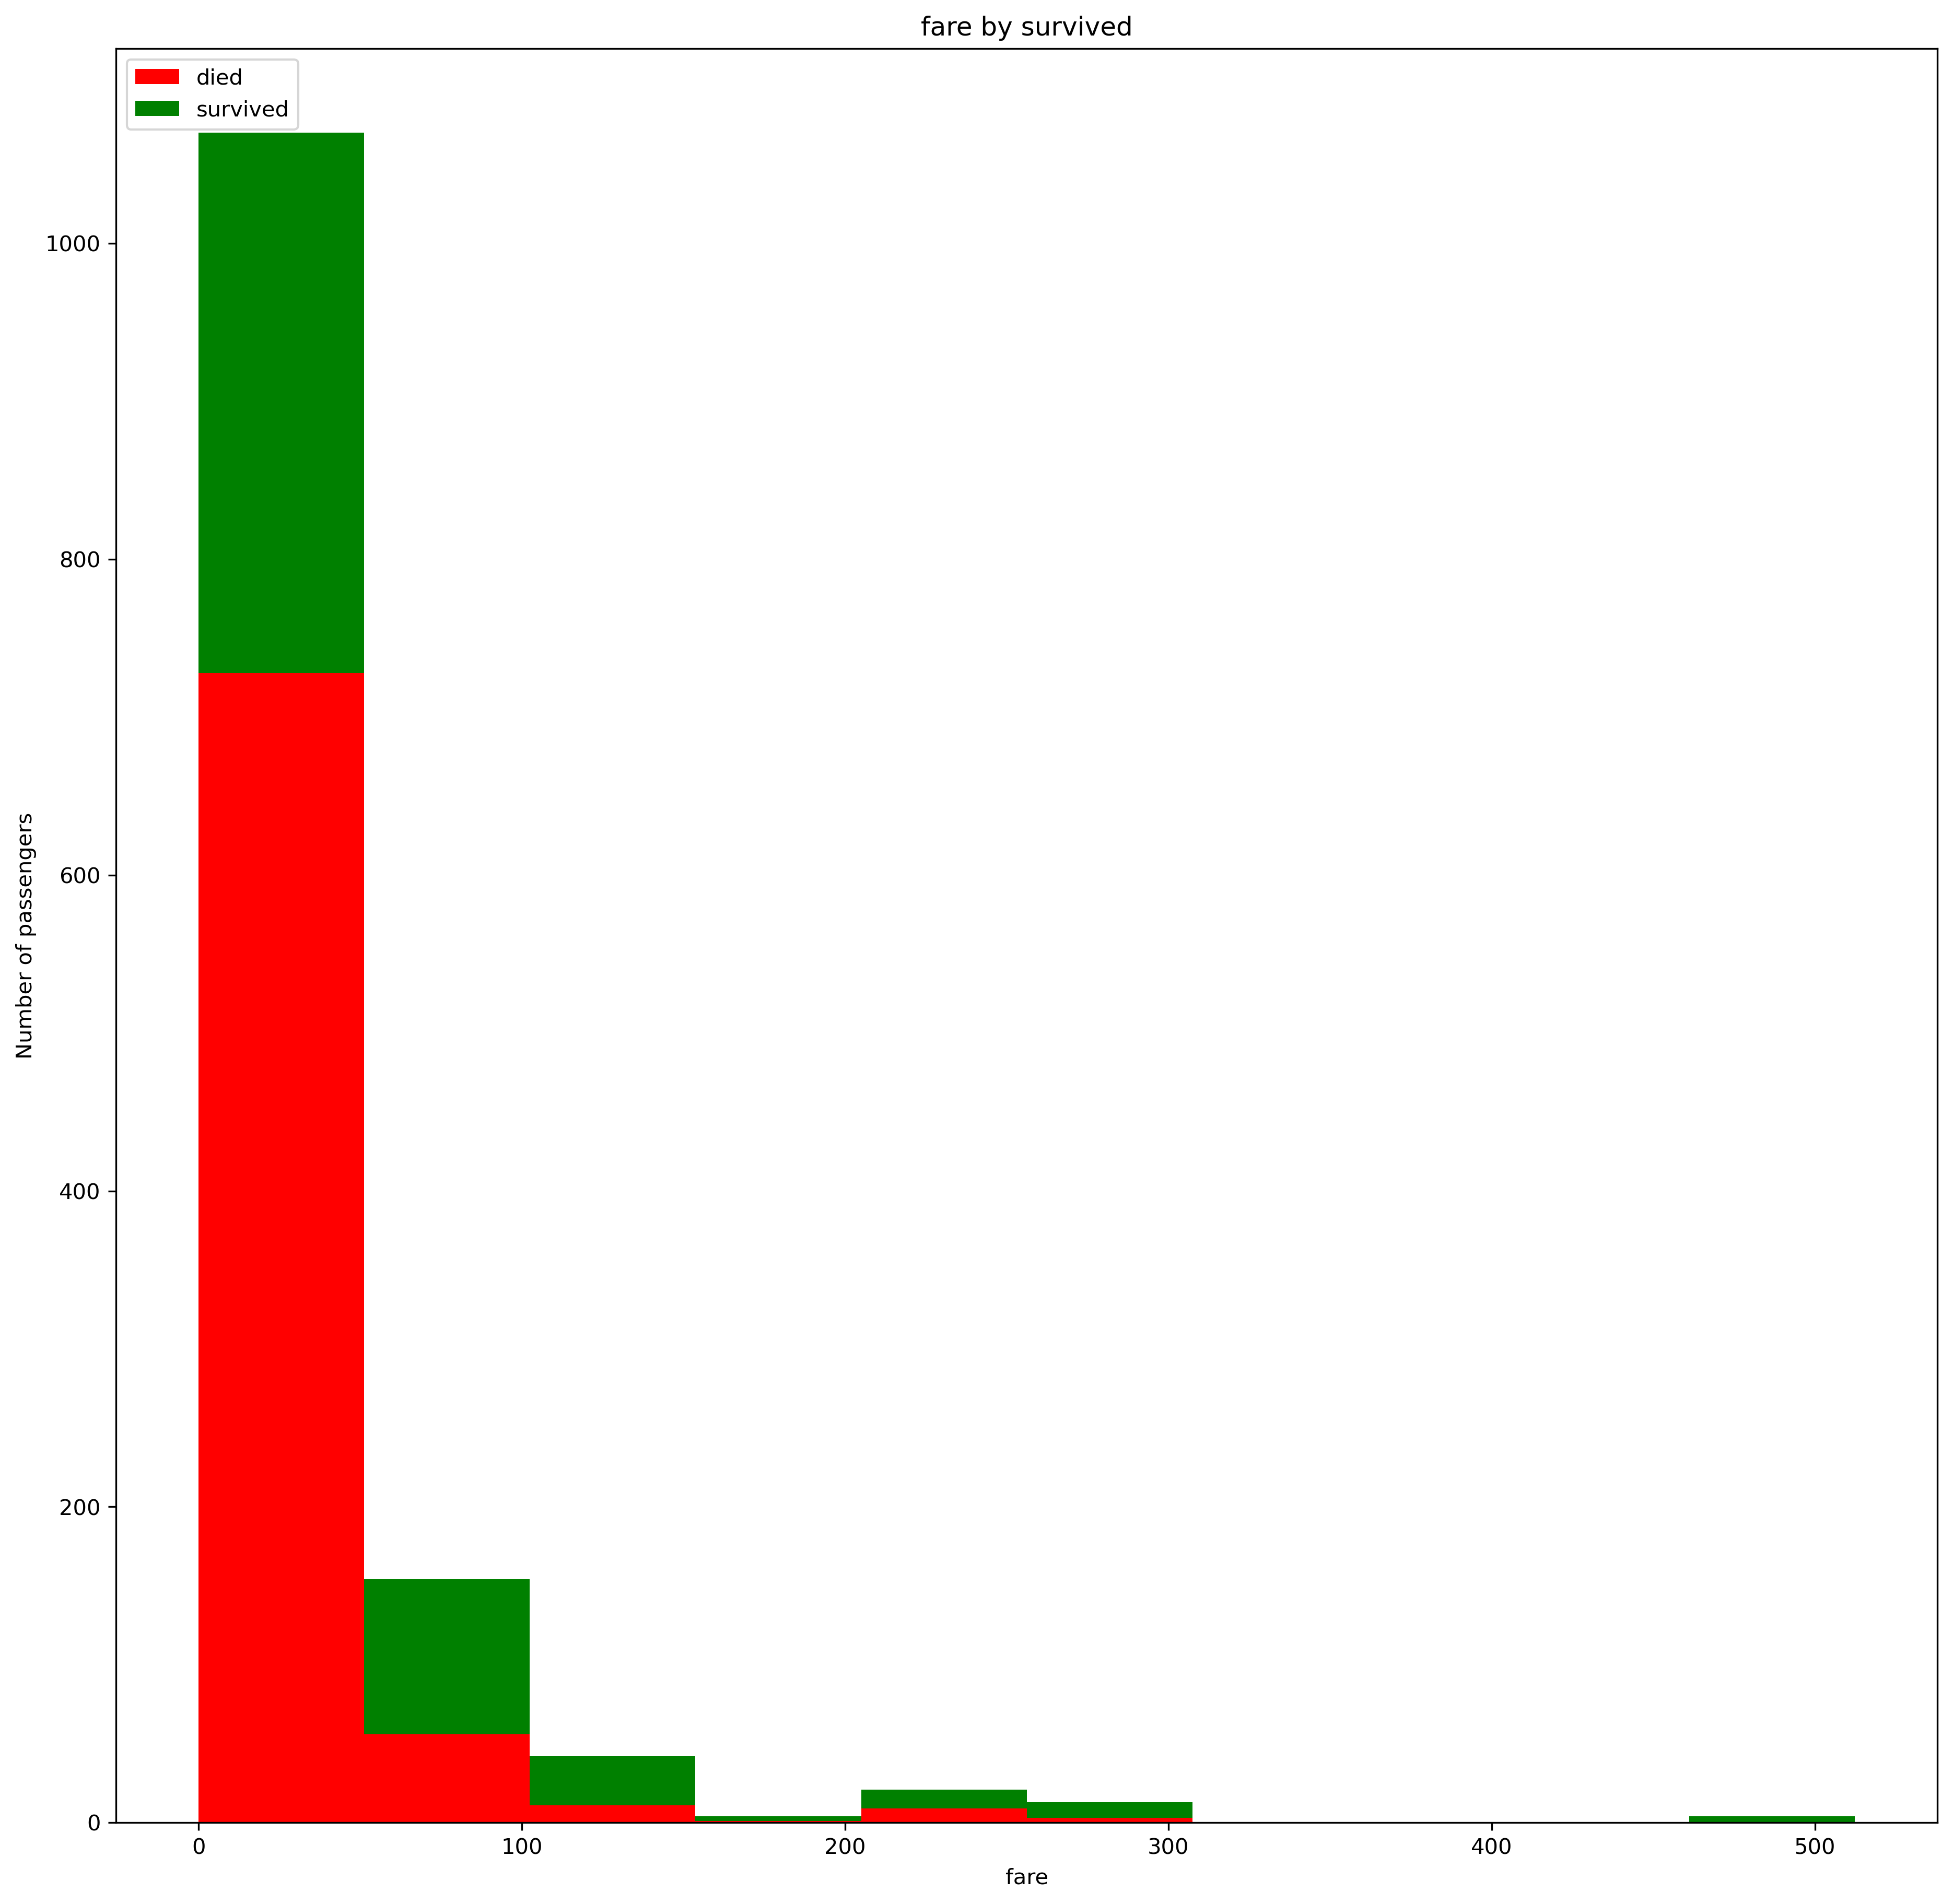

In [38]:
plot_distribution_by_target(feature="fare", stack=True)

It seems that passengers who paid 50£ or less have a lower survival rate than others.

In [39]:
df[df.fare <= 50]["survived"].value_counts(normalize=True)
df[df.fare > 50]["survived"].value_counts(normalize=True)

0    0.679775
1    0.320225
Name: survived, dtype: float64

1    0.658333
0    0.341667
Name: survived, dtype: float64

There does not seem to be any meaningful difference.

In [40]:
df.fare.isnull().sum()

1

There is one missing value, we could drop it without taking risks.

#### * cabin

In [41]:
df.cabin.head(10)

0         B5
1    C22 C26
2    C22 C26
3    C22 C26
4    C22 C26
5        E12
6         D7
7        A36
8       C101
9        NaN
Name: cabin, dtype: object

In [42]:
df.cabin.describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: cabin, dtype: object

In [43]:
n_nulls = df.cabin.isnull().sum()
n_nulls
n_nulls / len(df) * 100

1014

77.46371275783041

It is unlikely that we can extract meaningful information without a lot of effort, and most of the values are missing, so we will ignore this variable.

#### * embarked (Port of Embarkation C = Cherbourg; Q = Queenstown; S = Southampton)

In [44]:
df.embarked.head()

0    S
1    S
2    S
3    S
4    S
Name: embarked, dtype: object

In [45]:
df.embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

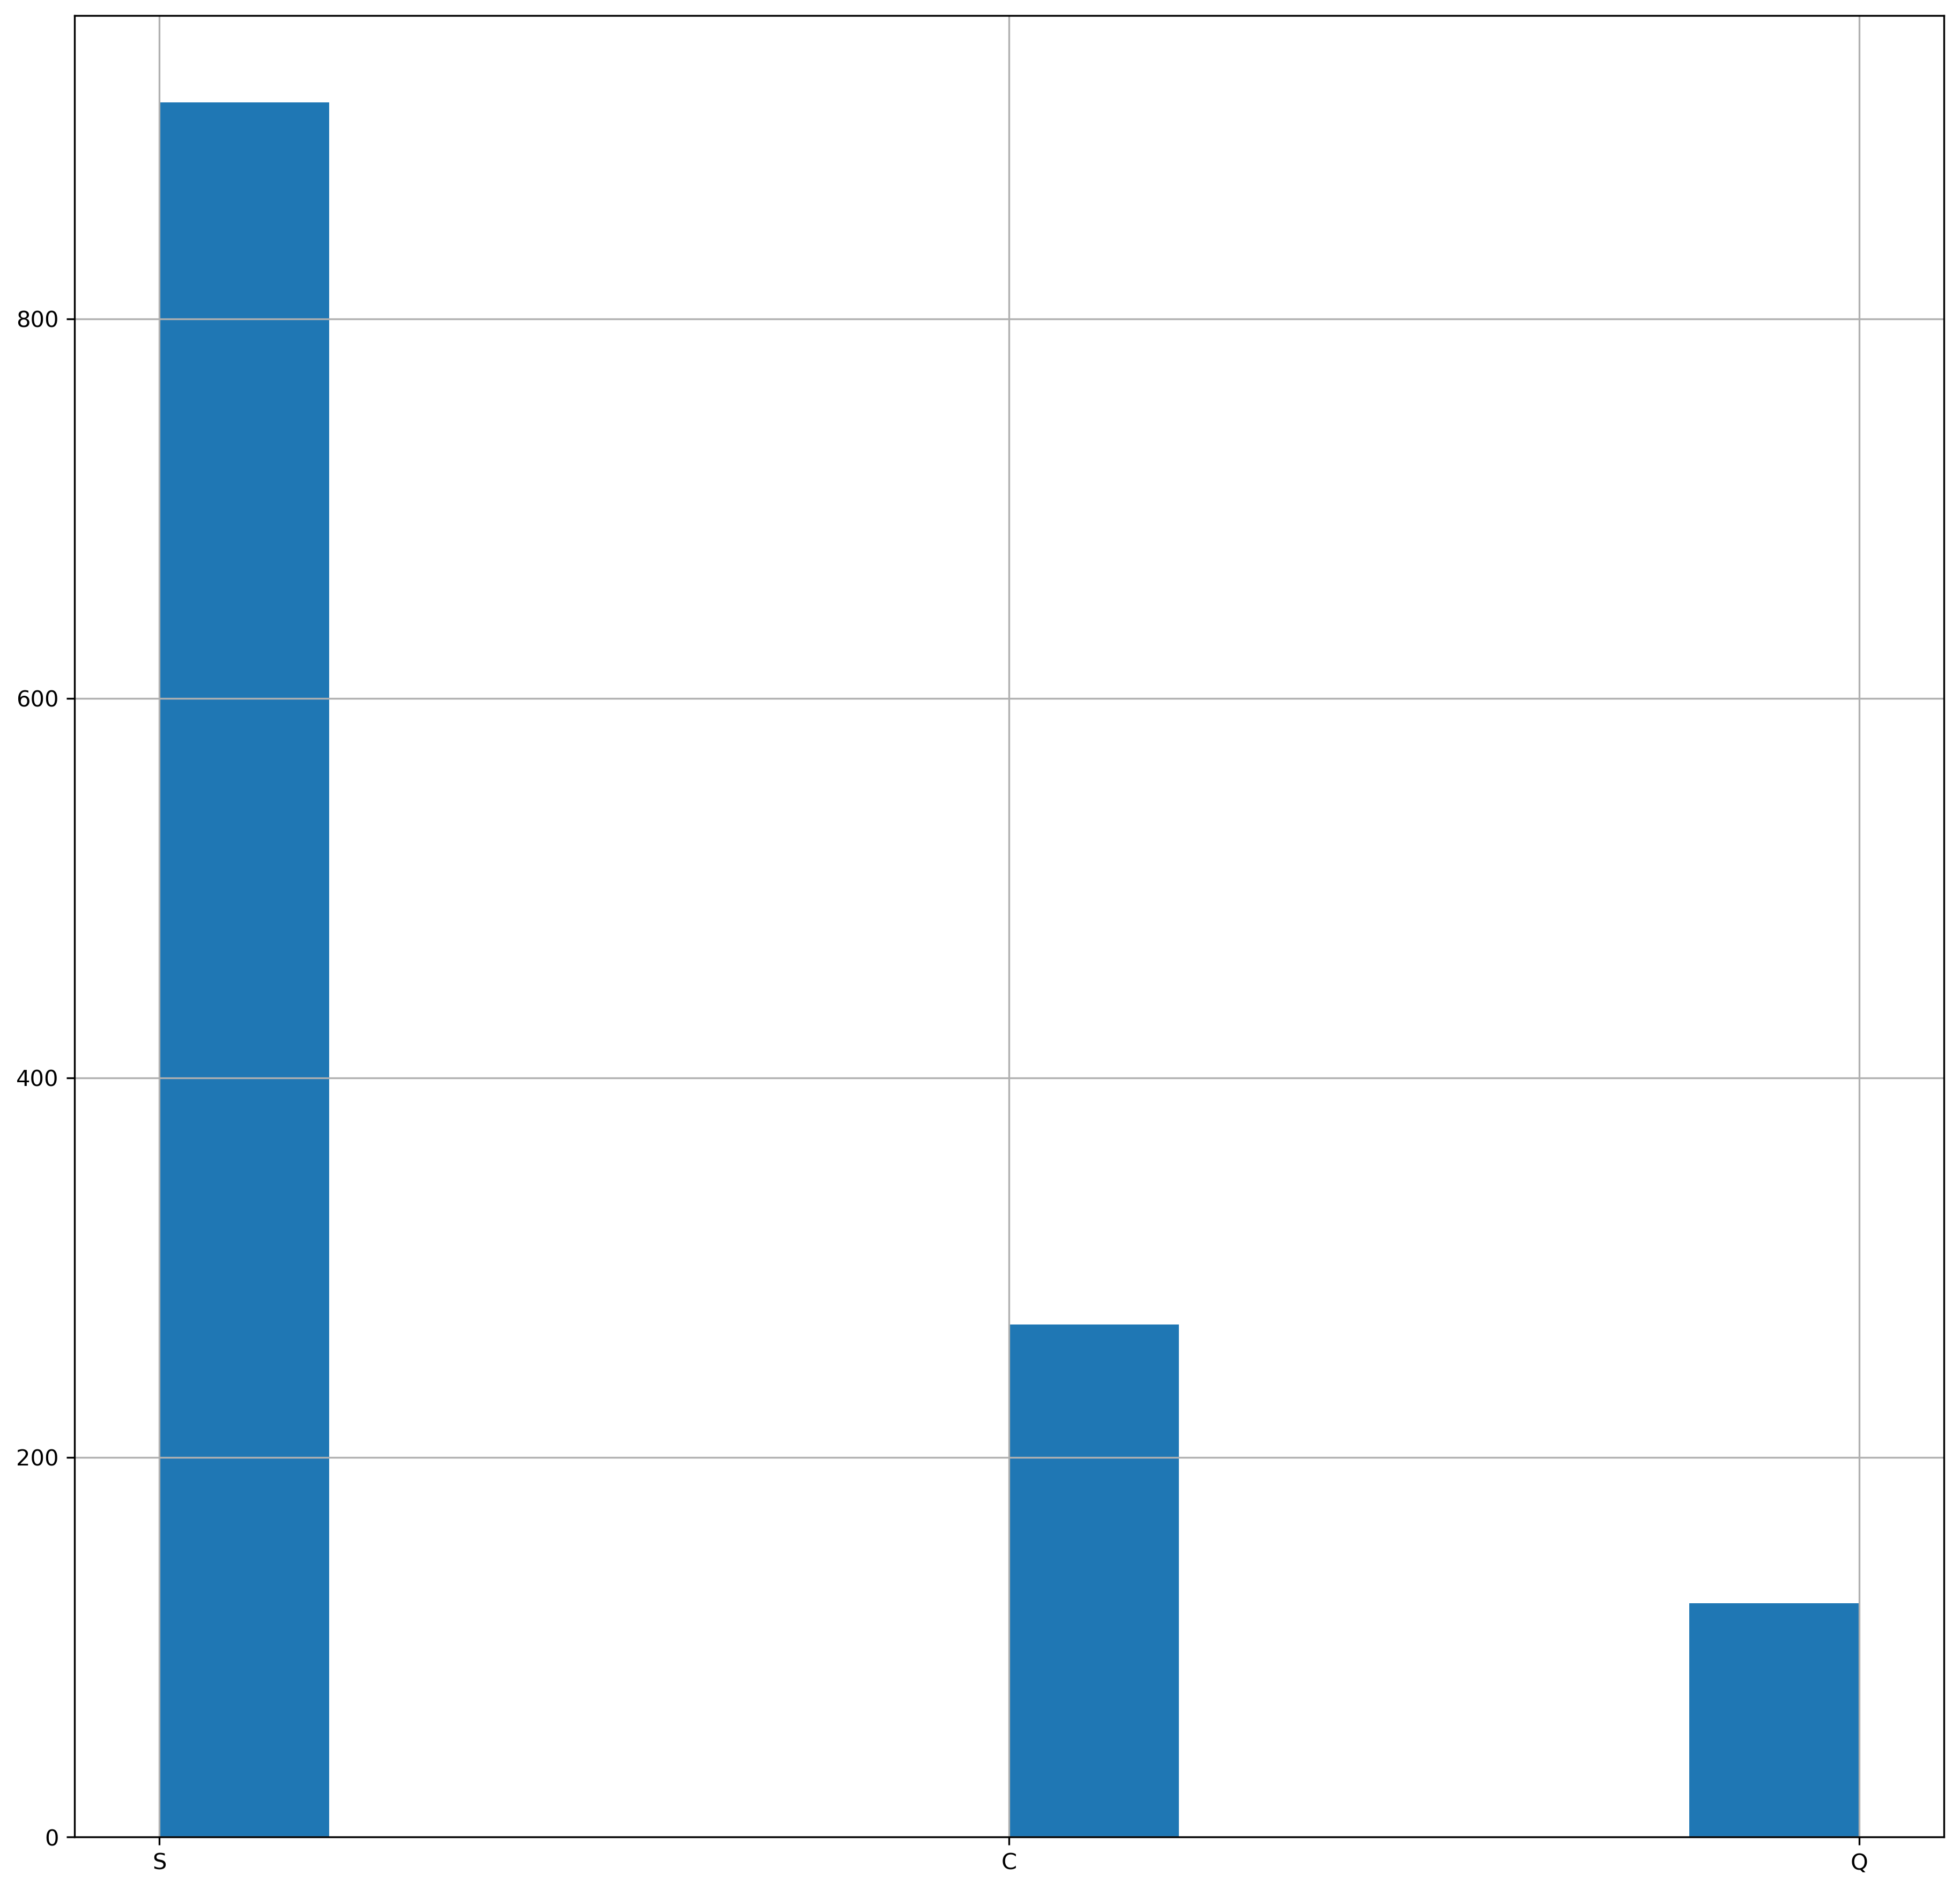

In [46]:
df.embarked.hist();

In [47]:
df.embarked.value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: embarked, dtype: float64

Most passengers embarked at Southampton, and twice as many passengers embarked at Cherbourg than Queenstown.

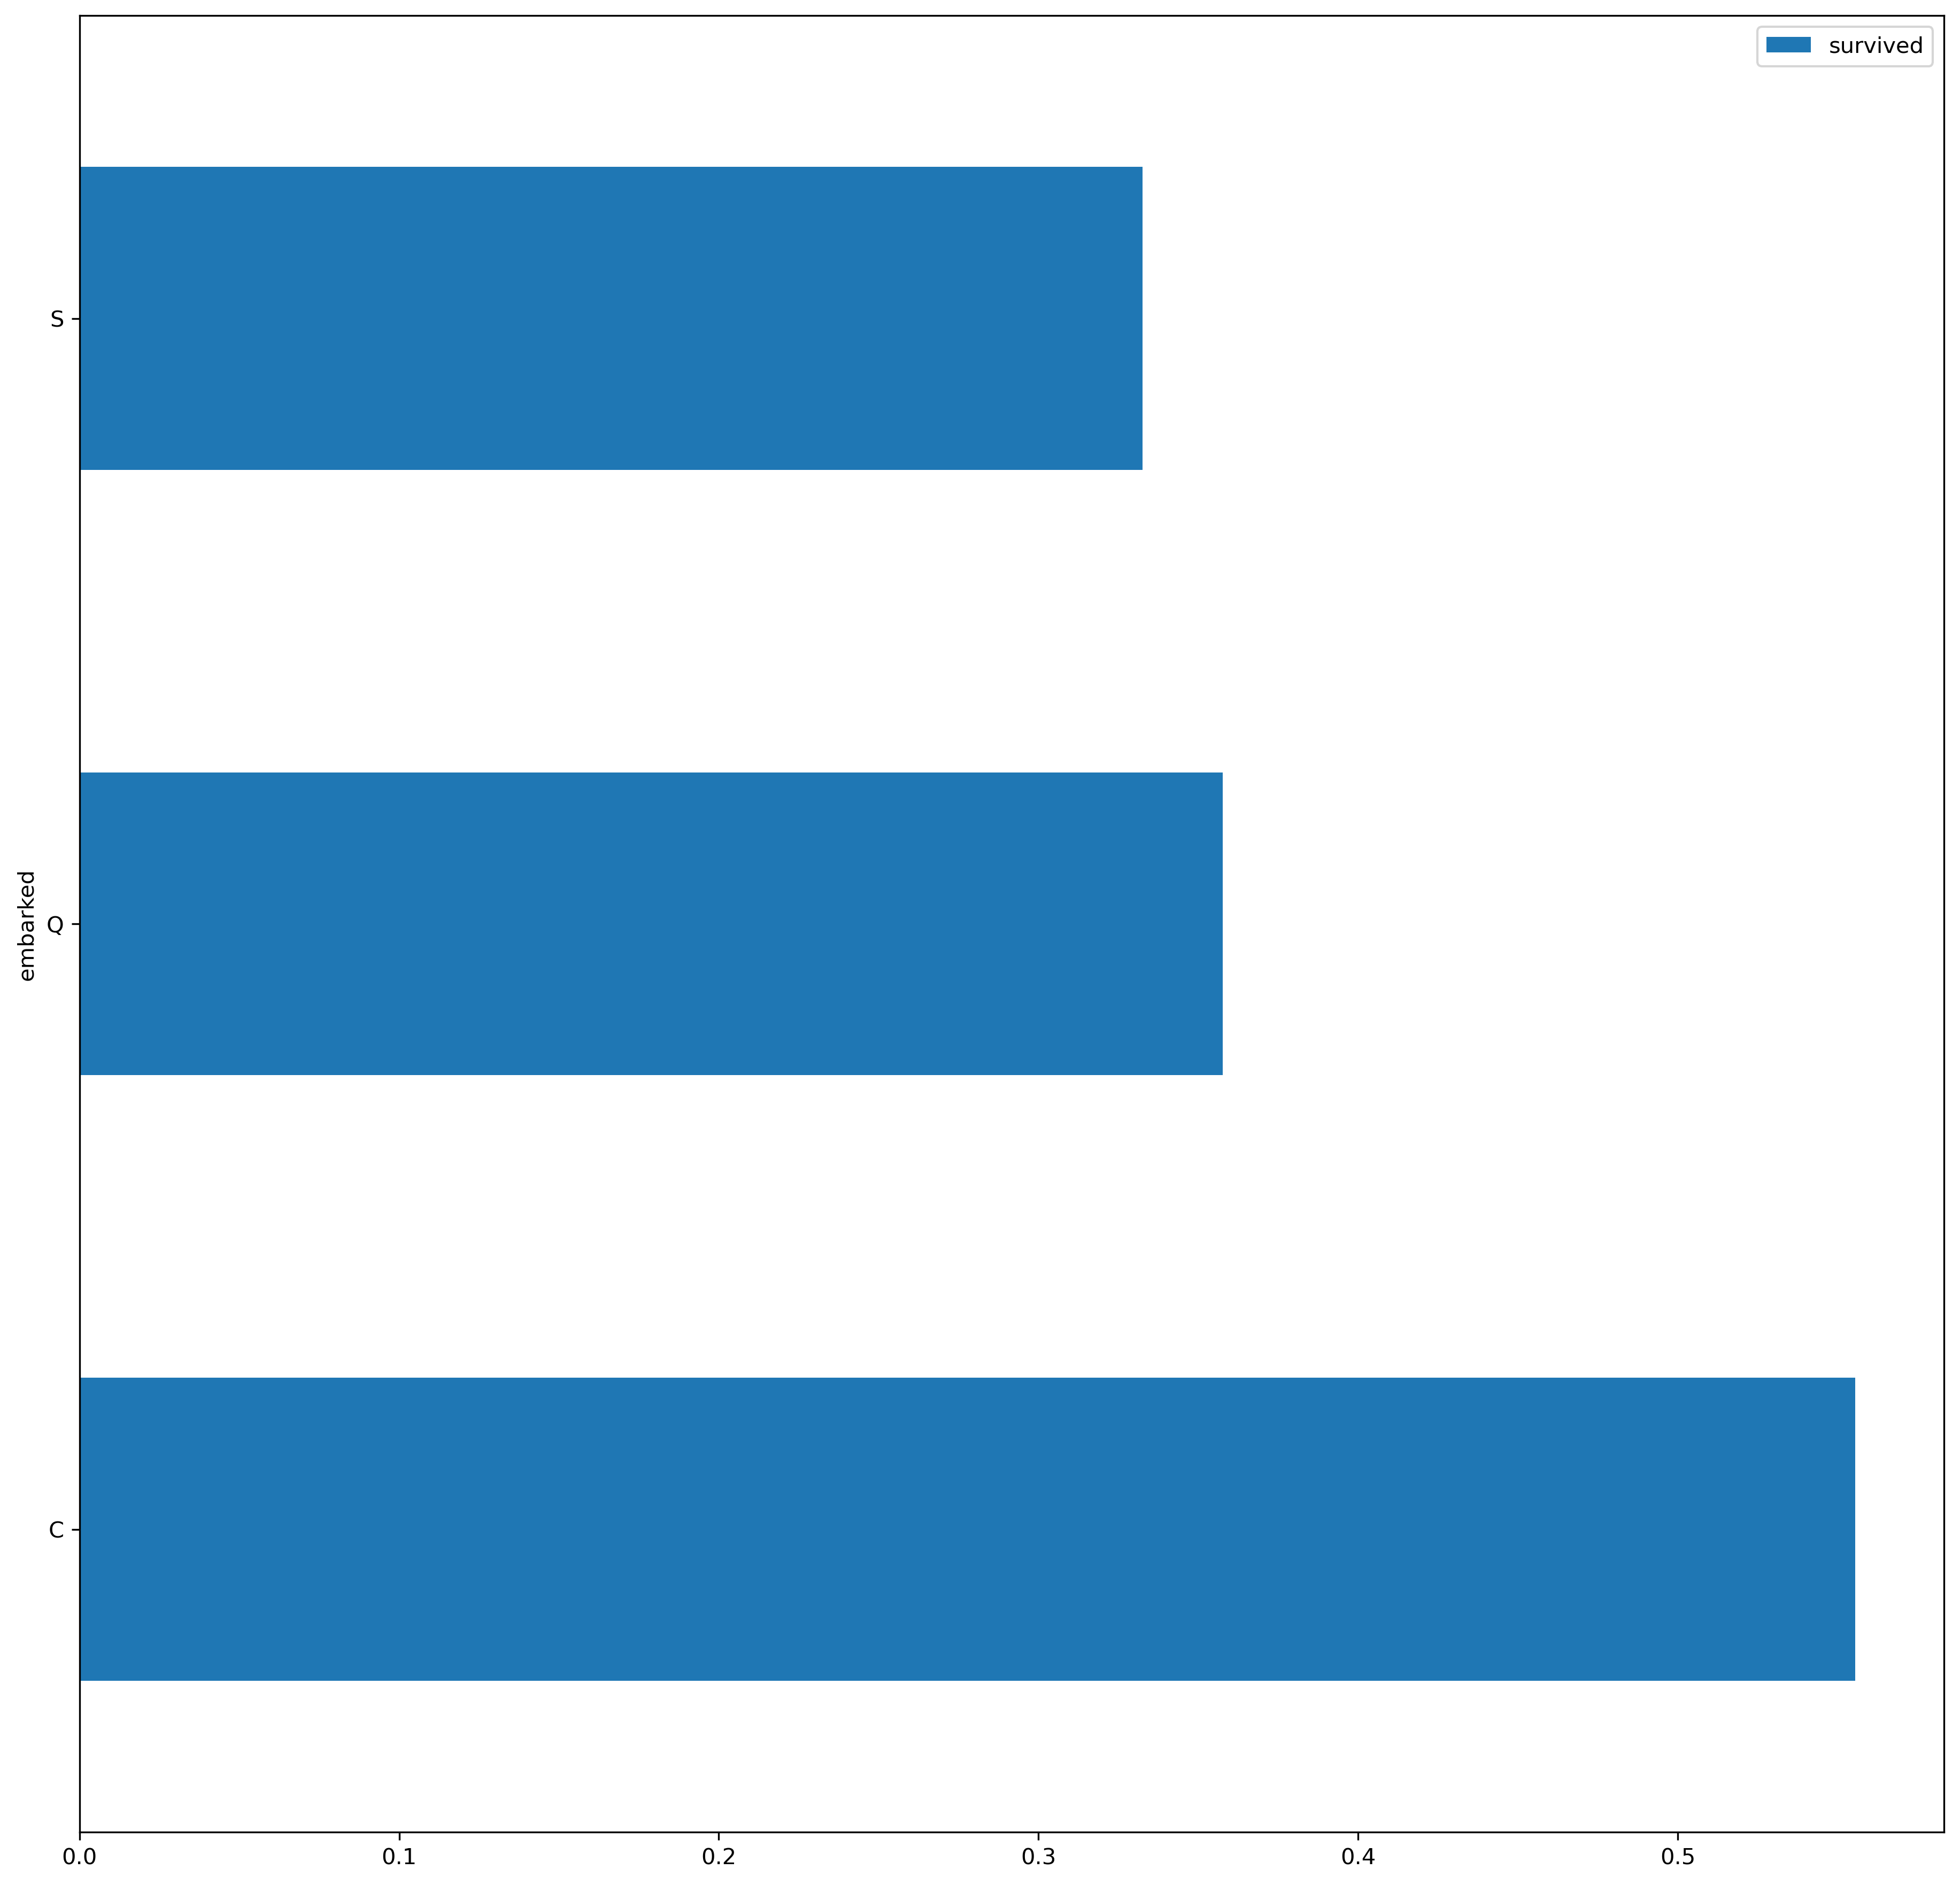

In [48]:
df[["embarked", "survived"]].groupby("embarked").mean().plot.barh()

In [49]:
df[["embarked", "survived"]].groupby("embarked").mean()

,survived
embarked,
C,0.555556
Q,0.357724
S,0.332604


Passengers who embarked at Cherbourg survived about 20% more than others.

In [50]:
df.embarked.isnull().sum()

2

Only 2 values are missing, we could drop these passengers without taking risks.

* #### home.dest (Home/Destination)

In [51]:
df["home.dest"].head()

0                       St Louis, MO
1    Montreal, PQ / Chesterville, ON
2    Montreal, PQ / Chesterville, ON
3    Montreal, PQ / Chesterville, ON
4    Montreal, PQ / Chesterville, ON
Name: home.dest, dtype: object

In [52]:
df["home.dest"].describe()

count              745
unique             369
top       New York, NY
freq                64
Name: home.dest, dtype: object

In [53]:
df["home.dest"].value_counts()

New York, NY                         64
London                               14
Montreal, PQ                         10
Cornwall / Akron, OH                  9
Paris, France                         9
                                     ..
Tranvik, Finland New York             1
Broomfield, Chelmsford, England       1
West Kensington, London               1
Ascot, Berkshire / Rochester, NY      1
Upper Burma, India Pittsburgh, PA     1
Name: home.dest, Length: 369, dtype: int64

We do not have enough observations per destination to make this variable useful. We will drop it.

### What we learned
After completing the data exploration, we note that:
* We should drop home.dest and cabin
* We should drop name but explore creating features with it
* sibsp and parch have a similar pattern: not being alone is good for your survival. We could group these variables into a new feature 'is_alone'

<a id="dataCleaning"><a/>

## Data Cleaning

In [54]:
df = df.drop(columns=["boat", "body", "ticket", "home.dest", "cabin"])

<a id="featureEngineering"><a/>

### Feature Engineering
We can create new features for existing ones.

* #### is_alone

In [55]:
df["is_alone"] = df.apply(lambda row: 1 if row["sibsp"] + row["parch"] == 0 else 0, axis=1)

In [56]:
df.groupby("is_alone").mean()["survived"]

is_alone
0    0.502890
1    0.302532
Name: survived, dtype: float64

In [57]:
df[["is_alone", "survived"]].corr()

,is_alone,survived
is_alone,1.000000,-0.201719
survived,-0.201719,1.000000


There is a weak correlation between not being alone and surviving.

We will try this feature.

In [58]:
df = df.drop(columns=["sibsp", "parch"])

* #### title

In [59]:
df["title"] = df.name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [60]:
df.title.value_counts().sort_values(ascending=False)

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Major         2
Ms            2
Don           1
Jonkheer      1
Sir           1
Lady          1
Capt          1
Countess      1
Dona          1
Mme           1
Name: title, dtype: int64

We will only consider the 4 most common titles. The rest will be grouped as 'other'.

In [61]:
df["title"] = df.title.apply(lambda title: title if title in ["Mr", "Miss", "Mrs", "Master"] else "other")

In [62]:
df.groupby("title").mean().sort_values(by="survived", ascending=False)["survived"]

title
Mrs       0.786802
Miss      0.676923
Master    0.508197
other     0.441176
Mr        0.162483
Name: survived, dtype: float64

We note that having a particular title seems to be very useful in identifying survivors.

One problem here is that we duplicate information with 'sex': a title implies a sex.

In [63]:
df = df.drop(columns=["name"])

In [64]:
df.head()

,pclass,survived,sex,age,fare,embarked,is_alone,title
0,1,1,female,29.00,211.3375,S,1,Miss
1,1,1,male,0.92,151.5500,S,0,Master
2,1,0,female,2.00,151.5500,S,0,Miss
3,1,0,male,30.00,151.5500,S,0,Mr
4,1,0,female,25.00,151.5500,S,0,Mrs


<a id="preprocessing"><a/>

## Preprocessing
Before we can use our features in our prediction models, we need to format them.

In [65]:
target = "survived"
X = df.drop([target], axis=1)
X.head()

,pclass,sex,age,fare,embarked,is_alone,title
0,1,female,29.00,211.3375,S,1,Miss
1,1,male,0.92,151.5500,S,0,Master
2,1,female,2.00,151.5500,S,0,Miss
3,1,male,30.00,151.5500,S,0,Mr
4,1,female,25.00,151.5500,S,0,Mrs


### Handling Missing Values
Missing values can prevent us from using certain models. We need to drop or impute them.

In [66]:
df.isnull().sum().sort_values(ascending=False)

age         263
embarked      2
fare          1
title         0
is_alone      0
sex           0
survived      0
pclass        0
dtype: int64

We are missing too many values for 'age' do drop the passengers with missing age. The other missing values do not matter much.

We will handle the missing age and fare values by imputing them using a K-Nearest-Neighbors Imputer. It will look at the n most similar passengers and take the mean of their ages.
We will handle the missing embarked values by imputing with the most common value.

### ColumnTransformer
We will apply all of our processing tasks using two ColumnTransformer. They allow us to chain operations together

With the first ColumnTransformer, we will convert 'age' and 'fare' from numeric columns to categorical columns, as the relationship between them and 'survival' is not linear, it makes more sense to think of ages and fares as groups, such as 'young' or 'paid a low price'. To do that we will:
* Impute using KNNImputer
* Bin (grouping into ranges) using KBinsDiscretizer
* OneHotEncode to make 'age' and 'fare' into categories

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer


numeric_features = ["age", "fare"]
categorical_features = ["sex", "embarked", "title", "pclass", "is_alone"]

numeric_transformer = Pipeline(
    steps=[
    ('imputer', KNNImputer(n_neighbors=4)),
    ('binner', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')),
    ('encoder', OneHotEncoder())]
)
ct = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features)
    ]
)
X_num = ct.fit_transform(X)
X_num = X_num.toarray()
X_num

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

The output of the ColumnTransformer is a 2D array. To have a better visibility over our preprocessed data, we need to format it into a DataFrame with the right feature names. To do this, we get back the feature names the OneHotEncoder chose, and convert them back to [variable_name]_[category_name] as they are otherwise in the xi_[category_name] format otherwise, which is hard to read.

In [68]:
def replace_xy_by_feature_name(feature, original_categorical_feature_names):
    # converts a feature name from x0_female to sex_female
    pre, post = feature.split("_")
    feature_index = int(pre[1:])
    new_pre = original_categorical_feature_names[feature_index]

    if "." in post:  # in case the feature name contains a float, which occurs for fare and age
        post = post.split(".")[0]
        
    new_name = new_pre + "_" + post
    return new_name

def get_named_df(X_trans, ct, new_feature_names, changed_features):
    # returns a dataframe properly named of preprocessing
    new_feature_names = [replace_xy_by_feature_name(f, changed_features) for f in new_feature_names]
    print(new_feature_names)
    new_df = pd.DataFrame(X_trans, columns=new_feature_names)
    return new_df

new_feature_names = ct.transformers_[0][1].named_steps['encoder'].get_feature_names()
X_num = get_named_df(X_num, ct, new_feature_names, numeric_features)
X_num.head()

['age_0', 'age_1', 'age_2', 'age_3', 'age_4', 'fare_0', 'fare_1', 'fare_2', 'fare_4']


,age_0,age_1,age_2,age_3,age_4,fare_0,fare_1,fare_2,fare_4
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


With the second ColumnTransformer, we will handle the rest of the features. They are all categorical, so we will impute using the most frequent values, and OneHotEncode.

In [69]:
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder())]
)
ct = ColumnTransformer(
    transformers = [
        ('cat', categorical_transformer, categorical_features)
    ]
)
X_cat = ct.fit_transform(X)
X_cat

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.]])

We again convert the 2D array into a well-named DataFrame.

In [70]:
new_feature_names = ct.transformers_[0][1].named_steps['encoder'].get_feature_names()
X_cat = get_named_df(X_cat, ct, new_feature_names, categorical_features)
X_cat.head()

['sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S', 'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_other', 'pclass_1', 'pclass_2', 'pclass_3', 'is_alone_0', 'is_alone_1']


,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_other,pclass_1,pclass_2,pclass_3,is_alone_0,is_alone_1
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


We now concatenate our two new DataFrames to group our data.

We also convert the values from float to int, as for a reason I ignore the output of our ColumnTransformers contain int as floats.

In [71]:
X_preprocessed = pd.concat([X_num, X_cat], axis=1)
X_preprocessed = X_preprocessed.astype(int)
X_preprocessed.head()

,age_0,age_1,age_2,age_3,age_4,fare_0,fare_1,fare_2,fare_4,sex_female,...,title_Master,title_Miss,title_Mr,title_Mrs,title_other,pclass_1,pclass_2,pclass_3,is_alone_0,is_alone_1
0,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0


It is also common in this step to scale (using a Simple or Robust Scaler for example) or normalize numeric features. We do not need to do that in our case as we end up with categorical features exclusively. Scaling 'age' or 'fare' to categorize them afterwards does not help us.

#### Reducing Colinearity
By keeping all dummy features of a category, we duplicate information.
For example, since sex can only be male of female, keeping one of the features "sex_male" and "sex_female" contains the same information as keeping both: we can imply one from the other one.

We will therefore drop one dummy feature per category.

Rather than dropping a dummy at random, it is better to choose the one that gives us the least amount of information, so the one that has the least variance.

In [72]:
# Return the name of the column of least variance
def find_col_of_least_variance(df):
    deviations = [df[col].std() for col in df.columns]
    min_deviation = np.min(deviations)
    return df.columns[deviations.index(min_deviation)]

# Returns a new DataFrame with the member of least variance of the category dropped
def drop_least_variance_member(df, category):
    members = [col for col in df.columns if col.startswith(category)]
    col_to_drop = find_col_of_least_variance(df[members])
    print("Dropping " + col_to_drop)
    return df.drop([col_to_drop], axis=1)

# Returns a new DataFrame with the member of least variance of each category dropped
def drop_least_variance_members(df, categories):
    for category in categories:
        df = drop_least_variance_member(df, category)
    return df

X_preprocessed = drop_least_variance_members(X_preprocessed, numeric_features + categorical_features)

Dropping age_4
Dropping fare_4
Dropping sex_female
Dropping embarked_Q
Dropping title_other
Dropping pclass_2
Dropping is_alone_0


In [73]:
X_preprocessed = X_preprocessed.rename(columns={"is_alone_1": "is_alone"})

In [74]:
X_preprocessed.head()

,age_0,age_1,age_2,age_3,fare_0,fare_1,fare_2,sex_male,embarked_C,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,pclass_1,pclass_3,is_alone
0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1
1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0
2,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
3,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0
4,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0


### Train/Test Split
We will split our dataset into a training set (80%) and a test set (20%) in order to be able to evaluate our models. 

In [75]:
from sklearn.model_selection import train_test_split

X = X_preprocessed
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

<a id="featureSelection"><a/>

## Feature Selection
We currently have access to 17 features. Taking all the features is usually a bad idea: some features might actually make the model worse if they bring noise, information that is not useful in identifying our target.

In [76]:
df_preprocessed = X_preprocessed.copy()
df_preprocessed["survived"] = df["survived"]

The correlation between a feature and the target is a good metric to evaluate how much this feature would help us in identifying the target.

A correlation coefficient of 0 means that the feature is not correlated, while a coefficient close to 1 or -1 means that it informs us greatly about the value of the target.

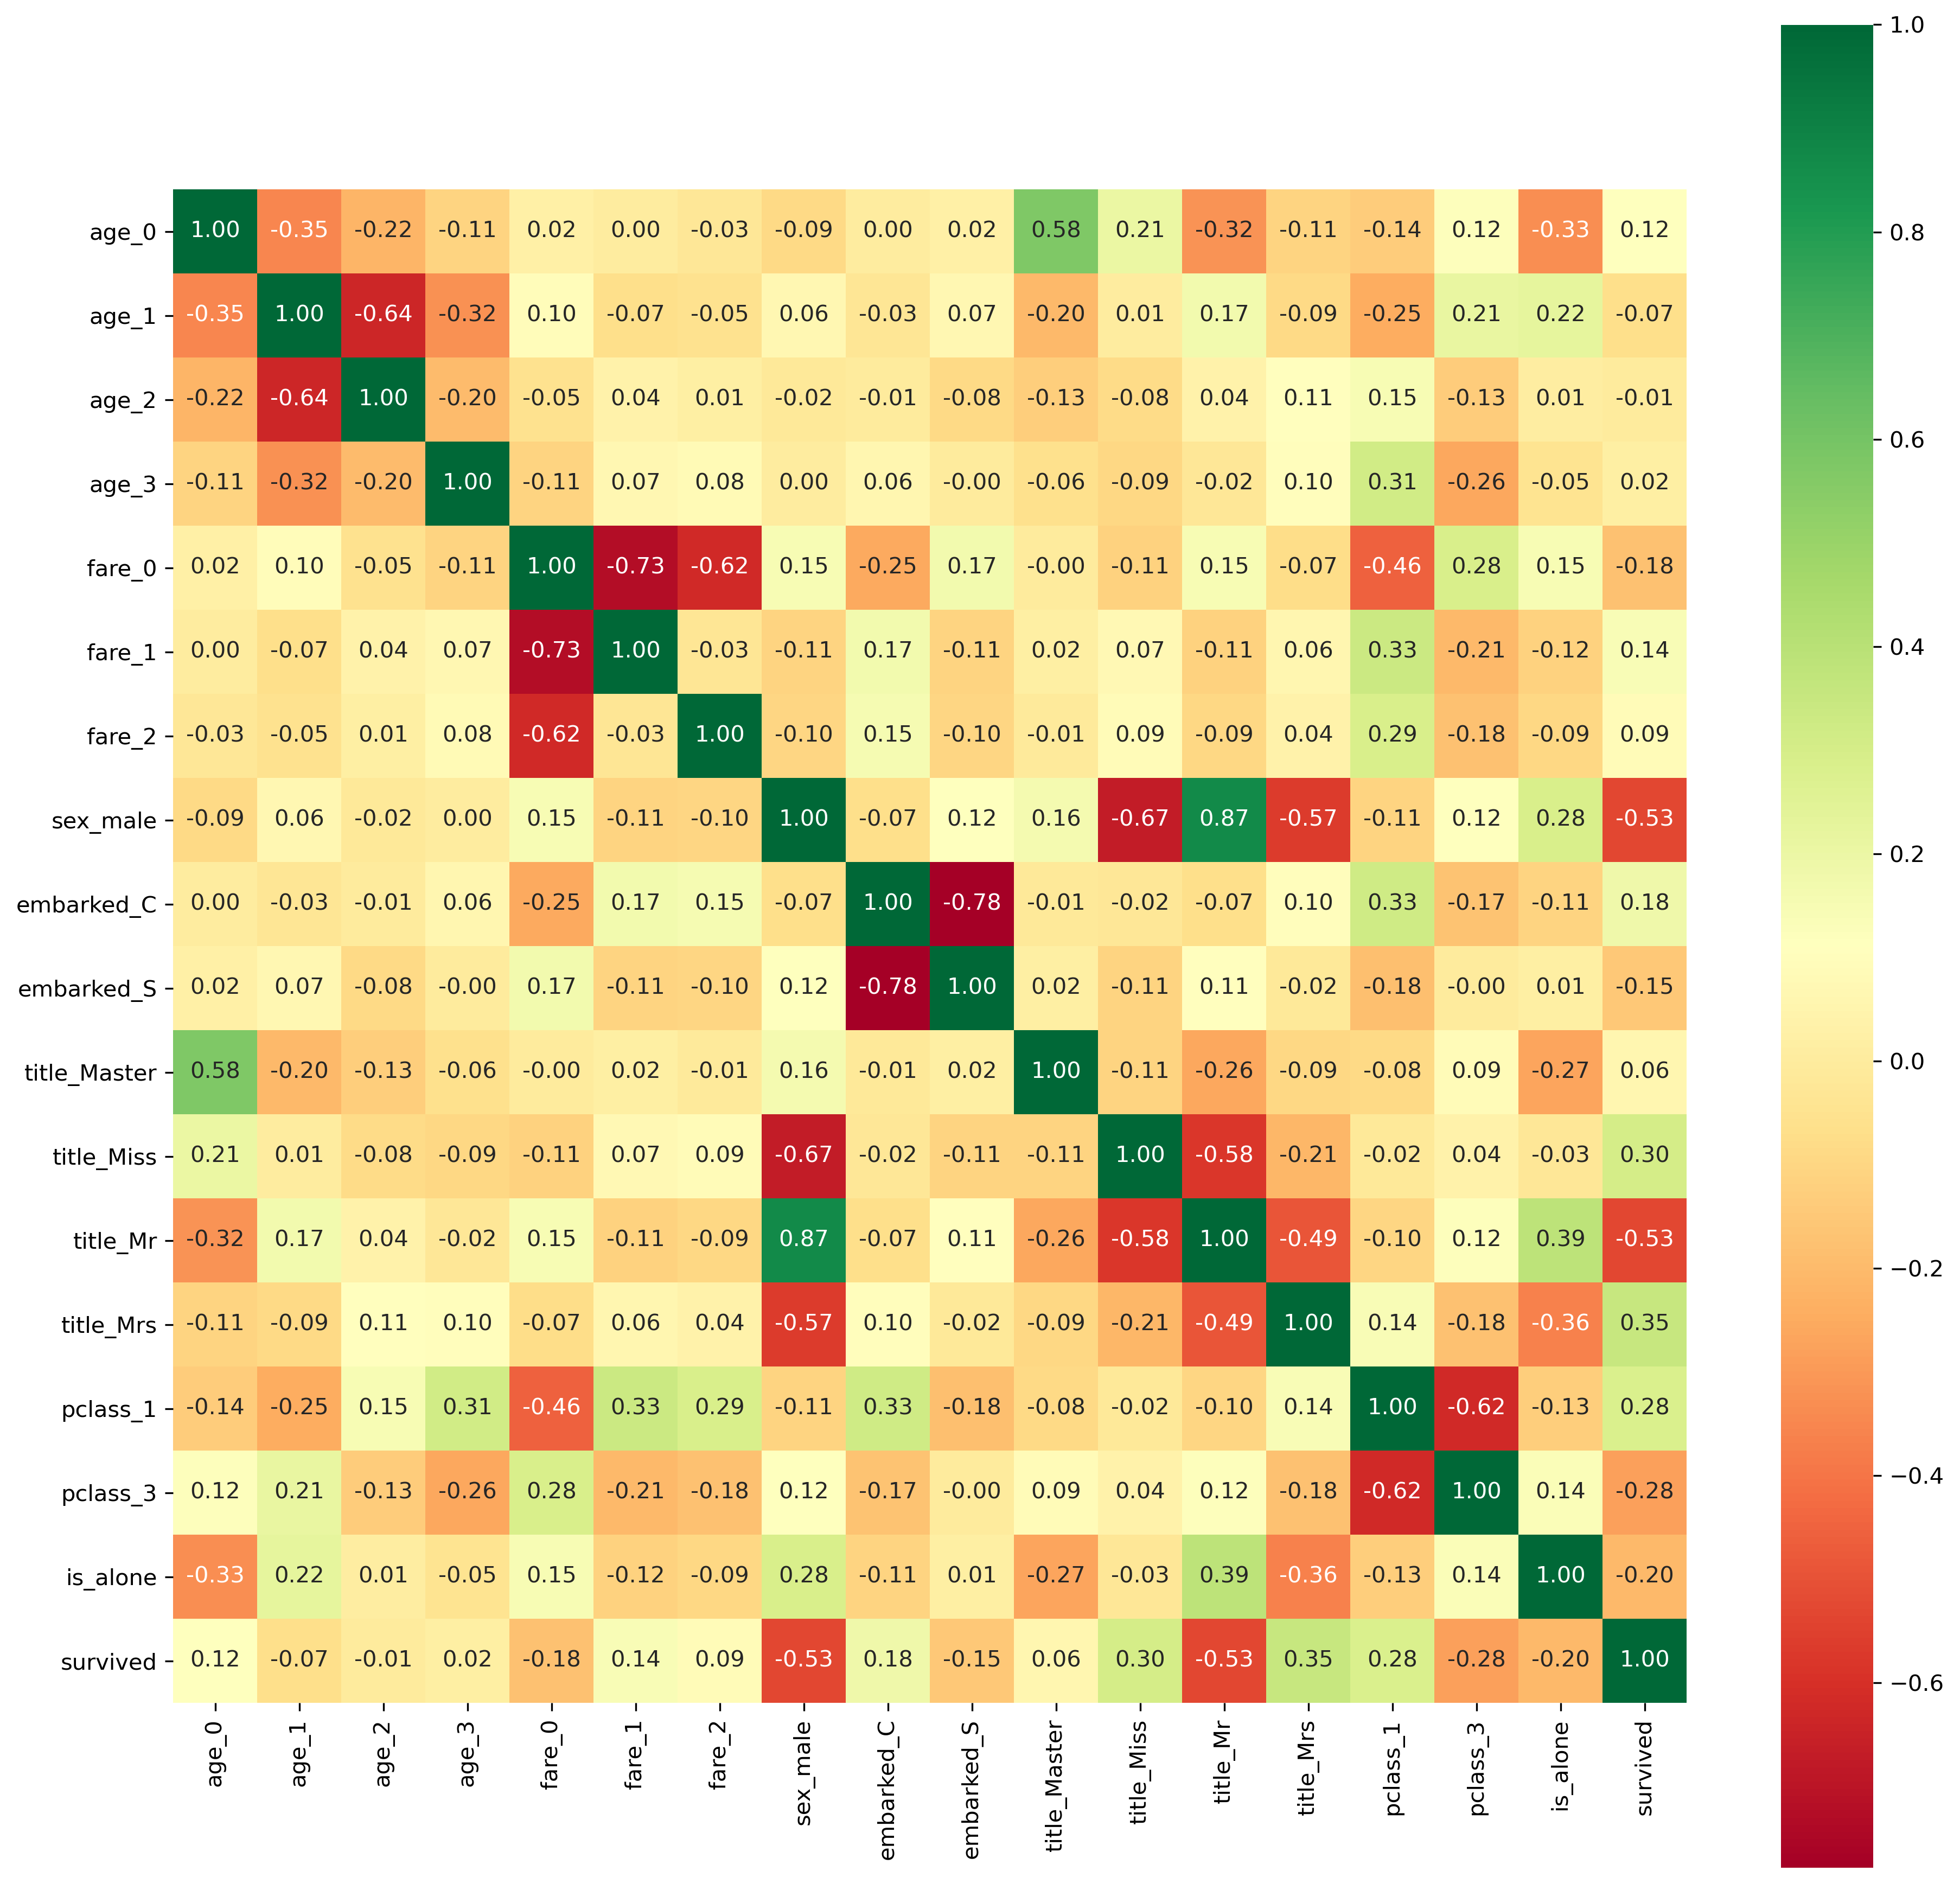

In [77]:
sns.heatmap(df_preprocessed.corr(), annot=True, cmap='RdYlGn', square=True, fmt='.2f');

We notice that some feature are not correlated enough with our target 'survived' to be kept, like 'age_1', 'age_2', 'age_'3 or 'fare_1' and 'fare_2' or even 'title_Master'.

We can also see that the best features are 'sex_male' and 'title_Mr' with a strong negative correlation: being a male and/or having 'Mr' in his name is a strong indication that death is coming.
The 'age' and 'fare' correlations with our target also inform us that is not very pertinent to know a passenger's exact age or exact fair, but only if he is very young or not, or if he paid very little or not.

We also notice colinearity: for example, 'sex_male' is strongly correlated with our title-related features, which makes sense as a gender implies the titles a passenger has access to. This a a bad thing as this features share information, making them partially redundant.

Another way to select our features is to use RFECV, Recursive Feature Eliminatino with Cross-Validation. 

Without going into too much details, RFECV will allow us to test most combinations of features and see the configuration that performs best with a given model, here it's a RandomForestClassifier.

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_features(X_train, y_train, target):
    all_cols = X_train.columns
    rf = RandomForestClassifier(criterion="gini", max_depth=5, random_state=1)
    selector = RFECV(rf, cv=10, step=1)
    selector.fit(X_train, y_train)
    
    best_columns = list(X_train.columns[selector.support_])
    removed_cols = [col for col in all_cols if col not in best_columns]
    if len(removed_cols) > 0:
        print("removed:")
        print(removed_cols)
    else:
        print("kept everything")
    return best_columns


features = select_features(X_train, y_train, target="survived")
features

removed:
['age_1', 'age_2', 'age_3', 'fare_1', 'fare_2']


['age_0',
 'fare_0',
 'sex_male',
 'embarked_C',
 'embarked_S',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'pclass_1',
 'pclass_3',
 'is_alone']

For the 'age' and 'fare' features, RFECV decided to only keep 'age_0' and 'fare_0', which is what we would choose to do using only the correlations.

More interestingly, it decided to keep 'title_Master' even though it has almost no correlation with our target. We will drop this feature has, even though it might have made this exact model better, intuitively it should not happen on average. We expect better results on most models by dropping it.

In [79]:
features = [f for f in features if f not in ["title_Master"]]

In [80]:
features

['age_0',
 'fare_0',
 'sex_male',
 'embarked_C',
 'embarked_S',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'pclass_1',
 'pclass_3',
 'is_alone']

In [81]:
X_train, X_test = X_train[features], X_test[features]

<a id="hyperparameterOptimization"><a/>

## Hyperparameter Optimization
Let's now train models.

In this section, we will train many different models following 9 different algorithms. For each one, we will use GridSearch to try many combinations of hyperparameters to find the best one.

In [82]:
from sklearn.model_selection import GridSearchCV

def get_best_model(X_train, y_train, models): 
    for model in models:
        print(model['name'])
        print('-' * len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(X_train, y_train)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

models = [
    {
        "name": "K Nearest Neighbors",
        "estimator": KNeighborsClassifier(),
        "hyperparameters":
            {
                "n_neighbors": [2, 3, 4, 5, 7, 10, 15, 20],
                "weights": ["uniform", "distance"],
                "p": [1, 2]
            }
    },
    {
        "name": "Linear Support Vector Machines Classifier",
        "estimator": svm.LinearSVC(),
        "hyperparameters":
            {
                "loss": ["hinge", "squared_hinge"]
            }
    },
    {
        "name": "Linear Discriminant Analysis",
        "estimator": LinearDiscriminantAnalysis(),
        "hyperparameters":
            {
                "solver": ["svd", "lsqr", "eigen"]
            }
    },
    {
        "name": "Logistic Regressor",
        "estimator": LogisticRegression(),
        "hyperparameters":
            {
                "solver": ["lbfgs", "sag", "saga"],
                "max_iter": [100, 300, 500, 1000]
            }
    },
    {
        "name": "Decision Tree Classifier",
        "estimator": DecisionTreeClassifier(),
        "hyperparameters":
            {
                "criterion": ["gini", "entropy"],
                "splitter": ["best", "random"],
                "max_depth": [5, 7, 10, 15, 25, None]
            }
    },
    {
        "name": "Random Forest Classifier",
        "estimator": RandomForestClassifier(),
        "hyperparameters":
            {
                "criterion": ["gini", "entropy"],
                "max_depth": [5, 7, 10, 15, 25, None]
            }
    },
    {
        "name": "Gradient Boosting Classifier",
        "estimator": GradientBoostingClassifier(),
        "hyperparameters":
            {
                "loss": ["deviance", "exponential"],
                "learning_rate": [.1, .2, .5],
                "max_depth": [5, 7, 10, 15, 25, None]
            }
    },
    {
        "name": "Ada Boost Classifier",
        "estimator": AdaBoostClassifier(),
        "hyperparameters":
            {
            }
    }
]

In [84]:
# Prevents warning messages from appearing
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
best_models = get_best_model(X_train, y_train, models)

K Nearest Neighbors
-------------------
Best Score: 0.806996336996337
Best Parameters: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

Linear Support Vector Machines Classifier
-----------------------------------------
Best Score: 0.7859706959706959
Best Parameters: {'loss': 'squared_hinge'}

Linear Discriminant Analysis
----------------------------
Best Score: 0.7878937728937727
Best Parameters: {'solver': 'svd'}

Logistic Regressor
------------------
Best Score: 0.7859798534798536
Best Parameters: {'max_iter': 100, 'solver': 'lbfgs'}

Decision Tree Classifier
------------------------
Best Score: 0.8117673992673993
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}

Random Forest Classifier
------------------------
Best Score: 0.8136813186813188
Best Parameters: {'criterion': 'entropy', 'max_depth': 15}

Gradient Boosting Classifier
----------------------------


## Decision Tree Classifier Visualization
To better understand how the feature are exploited by our models, we can visualize our best iteration of the Decision Tree Classifier.

### Reading the Plot
* Each node is a decision point
* value = [n, n2] means that on that node, n people died and n2 survived
* class value is the class that would be predicted for passengers getting to that node (depending on if n>n2 or n<n2)
* colors translate the proportion of passengers in that node who survived or died: blue means they all survived, orange means they all died, white means the split evenly

#### Beginning of the Tree

In [ ]:
from sklearn import tree

mpl.rcParams['figure.figsize'] = 8, 8
best_tree = [model for model in best_models if model["name"] == "Decision Tree Classifier"][0]["best_model"]
tree.plot_tree(best_tree, max_depth=2, feature_names=X_train.columns, filled=True, class_names=["Died", "Survived"]);

#plt.savefig('decision_tree_small.png', bbox_inches="tight")

#### Full Tree

In [ ]:
mpl.rcParams['figure.figsize'] = 15, 15
mpl.rcParams['figure.dpi'] = 300    # tells matplotlib to display inline plots at 300 DPI
mpl.rc("savefig", dpi = 300)        # tells matplotlib to save plots at 300 DPI

tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True, class_names=["Died", "Survived"]);
#plt.savefig('decision_tree.png', bbox_inches="tight");

(you can right-click and "open image in new tab" to read this plot better)

A passenger having the title "Mr" will always be considered dead by this decision tree classifier. Giving him more information will influence its confidence, but the predicted class will always be "Died". With no more information, this verdict was right 507/605=84% of the time on the training set.

Similarly, telling this decision tree that a class 1 or class 2 female passenger will result in a "Survived" predicted class (by looking at the left branch of the decision tree, not having the 'Mr' title is implied by being a female). This verdict was right 185/200=92.5% on the training set.

### Voting model

The 'Voting' model will combine the prediction power of 5 different models (best iteration of each). For each prediction, it will predict the mode or most common value among the predictions made by these 5 models.

In [ ]:
vault_names = [
    "K Nearest Neighbors", 
    "Linear Support Vector Machines Classifier", 
    "Linear Discriminant Analysis",
    "Logistic Regressor",
    "Decision Tree Classifier"
]
models_to_vault = [(model["name"], model["best_model"]) for model in best_models if model["name"] in vault_names]
models_to_vault

In [ ]:
from sklearn.ensemble import VotingClassifier

vote_model = [
    {
        "name": "Voting Classifier",
        "estimator": VotingClassifier(estimators=models_to_vault),
        "hyperparameters":
            {
                "voting": ["hard"],
                "n_jobs": [-1]
            }
    }
]

In [ ]:
best_voting = get_best_model(X_train, y_train, vote_model)

<a id="modelSelection"><a/>

## Model Selection
Now that we found the 'best' version of each model, we need to evaluate and compare them to select one.

But which metrics should we focus on? It depends on the context. This project did not give us more context other than trying to predict if a passenger survives or dies.

We will imagine a context in which we would do that: we are trying identify what tends to cause a passenger to die in order to educate similar passengers on similar journeys.

In this context:
* false negatives from the point of view of dying (you will likely die but the model misses it) (recall) are way more of a problem than false positives (you will probably survive but the model says you will likely die): we are better of being over-cautious. We will therefore value the recall from the point of view of dying highly.
* the time it takes to predict a passenger's fate is not a concern as long as it's reasonable

The score the model gets on the test set is always a good metric, and, to a lesser extent than for the recall, we will also consider the precision by using the f1-score as having a better precision does still matter. By using the f1-score and the recall, we consider the recall 1.5 times, but that is acceptable as this is in this context the most important metric.
We will also make sure that our selected model is stable, generalizes well, which we will define here as having less than 5% score difference between the train and test scores.

We will therefore compute an equity for each model as 0 if the model is unstable or 'test_score' * 'recall' * 'f1_score'.
We will sort the DataFrame by descending equity.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time

def get_metrics_of_model(model, X_test, y_test, X_train, y_train):
    start_time = time.time()
    predictions = model.predict(X_test)
    delay = time.time() - start_time
    predict_time_per_row_ms = delay / len(X_test) * 1000000
    
    train_score, test_score = model.score(X_train, y_train), model.score(X_test, y_test)
    is_stable = train_score-test_score < 5
    
    labels = ["Died", "Survived"]
    classification_report_dict = classification_report(y_test, predictions, output_dict=True, target_names=labels)
    d = classification_report_dict["Died"]
    precision, recall, f1_score = d["precision"], d["recall"], d["f1-score"]
    
    c_m = confusion_matrix(y_test, predictions)
    equity = 0 if not is_stable else test_score * recall * f1_score
    return train_score, test_score, is_stable, precision, recall, f1_score, c_m, predict_time_per_row_ms, equity

def get_all_metrics_df(models, model_names, X_test, y_test, X_train, y_train):
    all_metrics = [get_metrics_of_model(m, X_test, y_test, X_train, y_train) for m in models]
    metric_names = ["train_score", "test_score", "is_stable", "precision", "recall", "f1_score", "confusion_matrix", "predict_time_µs", "equity"]
    metrics = [[metrics_tuple[i] for metrics_tuple in all_metrics] for i in range(len(metric_names))]
    
    data = [model_names] + metrics
    columns = ["model"] + metric_names
    metrics_dict = {metric_names[i]: metrics[i] for i in range(len(metric_names))}
    df_dict = {"model": model_names}
    df_dict.update(metrics_dict)
    df = pd.DataFrame(df_dict)
    return df.sort_values("equity", ascending=False)

In [ ]:
all_ms = [m["best_model"] for m in best_models + best_voting]
all_names = [m["name"] for m in best_models + best_voting]
get_all_metrics_df(all_ms, all_names, X_test, y_test, X_train, y_train)

We note that:
* Even though Linear Support Vector Machines and Linear Discriminant Analysis have a significantly better test score, the most popular metric, in this context we would exclude them as they have a significantly worse recall.
* The first 4 models have a very similar equity between 0.666866 and 0.666908, so we will pick one among them
* The first 2 models have the exact same equity, test_score, recall and f1_score. In fact, they would be identical if it was not for the train_score and the predict_time_ms. It makes sense as a Random Forest Classifier is made out of Decision Tree Classifiers. Between this two models, the winner is the Decision Tree Classifier as it offers the exact same prediction performance but takes 7.5 times less time to do so. In a second with my hardware, this model could predict the fate of about 130 000 passengers. Another reason to select this algorithm is that it is one of the clearest, easiest one to explain and analyze.

The model we select in our context is therefore the Decision Tree Classifier.

In a more general context, we would select the Linear Discriminant Analysis.